## COVID-19 policy responses: An exploratory data analysis

### Importing libraries

In [1053]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

### Cleaning the raw data

In [1054]:
url1 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ADBCovid19-export-2020-08-07.csv'

In [1055]:
df1 = pd.read_csv(url1)

In [1056]:
df1.head()

Region      Country Measure Code  \
0  Central and West Asia  Afghanistan            1   
1  Central and West Asia  Afghanistan          01A   
2  Central and West Asia  Afghanistan          01B   
3  Central and West Asia  Afghanistan          01C   
4  Central and West Asia  Afghanistan            2   

                                         Measure Currency Code  \
0                         01 - Liquidity Support           AFN   
1                       01A - Short-term lending           AFN   
2  01B - Support policies for short-term lending           AFN   
3                         01C - Forex operations           AFN   
4                           02 - Credit creation           AFN   

   Amount (Local)  Amount USD  \
0             NaN         NaN   
1             NaN         NaN   
2             NaN         NaN   
3             NaN         NaN   
4             NaN         NaN   

                                              Source  Post Date  \
0                                                NaN  7/27/2020   
1                                                NaN  7/27/2020   
2  IMF. https://www.imf.org/en/Topics/imf-and-cov...  7/27/2020   
3  IMF. https://www.imf.org/en/Topics/imf-and-cov...  7/27/2020   
4                                                NaN  7/27/2020   

                                             Details  
0                                                NaN  
1                                                NaN  
2  No estimate/amount: The Financial Stability Co...  
3  No amount/estimate: (i) DAB is in discussions ...  
4                                                NaN

In [1057]:
df1.tail()

Region   Country Measure Code                           Measure  \
2365  Southeast Asia  Viet Nam          09A                       09A - Swaps   
2366  Southeast Asia  Viet Nam          09B  09B - International loans/grants   
2367  Southeast Asia  Viet Nam           10                 10 - No breakdown   
2368  Southeast Asia  Viet Nam           11      11 - Other Economic Measures   
2369  Southeast Asia  Viet Nam           12        12 - Non-Economic Measures   

     Currency Code  Amount (Local)  Amount USD  \
2365           VND             NaN         NaN   
2366           VND             NaN         NaN   
2367           VND             NaN         NaN   
2368           VND             NaN         NaN   
2369           VND             NaN         NaN   

                                                 Source  Post Date  \
2365                                                NaN  7/27/2020   
2366                                                NaN  7/27/2020   
2367                                                NaN  7/27/2020   
2368  IMF,MOF, SBV. https://www.imf.org/en/Topics/im...  7/27/2020   
2369  OECD. http://www.oecd.org/coronavirus/en/ (acc...  7/27/2020   

                                                Details  
2365                                                NaN  
2366                                                NaN  
2367                                                NaN  
2368  (i) On March 31, the State Bank of Vietnam ins...  
2369  (i) On March 9, the government tightened entry...

In [1058]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          2370 non-null   object 
 1   Country         2370 non-null   object 
 2   Measure Code    2370 non-null   object 
 3   Measure         2370 non-null   object 
 4   Currency Code   2370 non-null   object 
 5   Amount (Local)  806 non-null    float64
 6   Amount USD      806 non-null    float64
 7   Source          870 non-null    object 
 8   Post Date       2370 non-null   object 
 9   Details         870 non-null    object 
dtypes: float64(2), object(8)
memory usage: 185.3+ KB


In [1059]:
df1.drop(columns=['Source', 'Post Date', 'Details'], inplace=True)

In [1060]:
df1.columns

Index(['Region', 'Country', 'Measure Code', 'Measure', 'Currency Code',
       'Amount (Local)', 'Amount USD'],
      dtype='object')

In [1061]:
df1.columns = ['region', 'country', 'measure_id', 'measure_name', 'currency', 'amount_lcy', 'amount_usd']

In [1062]:
df1

region      country measure_id  \
0     Central and West Asia  Afghanistan          1   
1     Central and West Asia  Afghanistan        01A   
2     Central and West Asia  Afghanistan        01B   
3     Central and West Asia  Afghanistan        01C   
4     Central and West Asia  Afghanistan          2   
...                     ...          ...        ...   
2365         Southeast Asia     Viet Nam        09A   
2366         Southeast Asia     Viet Nam        09B   
2367         Southeast Asia     Viet Nam         10   
2368         Southeast Asia     Viet Nam         11   
2369         Southeast Asia     Viet Nam         12   

                                       measure_name currency  amount_lcy  \
0                            01 - Liquidity Support      AFN         NaN   
1                          01A - Short-term lending      AFN         NaN   
2     01B - Support policies for short-term lending      AFN         NaN   
3                            01C - Forex operations      AFN         NaN   
4                              02 - Credit creation      AFN         NaN   
...                                             ...      ...         ...   
2365                                    09A - Swaps      VND         NaN   
2366               09B - International loans/grants      VND         NaN   
2367                              10 - No breakdown      VND         NaN   
2368                   11 - Other Economic Measures      VND         NaN   
2369                     12 - Non-Economic Measures      VND         NaN   

      amount_usd  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2365         NaN  
2366         NaN  
2367         NaN  
2368         NaN  
2369         NaN  

[2370 rows x 7 columns]

In [1063]:
df1.set_index(['region', 'country'], inplace=True)

In [1064]:
df1

measure_id  \
region                country                  
Central and West Asia Afghanistan          1   
                      Afghanistan        01A   
                      Afghanistan        01B   
                      Afghanistan        01C   
                      Afghanistan          2   
...                                      ...   
Southeast Asia        Viet Nam           09A   
                      Viet Nam           09B   
                      Viet Nam            10   
                      Viet Nam            11   
                      Viet Nam            12   

                                                                    measure_name  \
region                country                                                      
Central and West Asia Afghanistan                         01 - Liquidity Support   
                      Afghanistan                       01A - Short-term lending   
                      Afghanistan  01B - Support policies for short-term lending   
                      Afghanistan                         01C - Forex operations   
                      Afghanistan                           02 - Credit creation   
...                                                                          ...   
Southeast Asia        Viet Nam                                       09A - Swaps   
                      Viet Nam                  09B - International loans/grants   
                      Viet Nam                                 10 - No breakdown   
                      Viet Nam                      11 - Other Economic Measures   
                      Viet Nam                        12 - Non-Economic Measures   

                                  currency  amount_lcy  amount_usd  
region                country                                       
Central and West Asia Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
...                                    ...         ...         ...  
Southeast Asia        Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  

[2370 rows x 5 columns]

In [1065]:
df1.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

In [1066]:
len(df1.index.levels[0])

8

In [1067]:
df1.index.levels[1]

Index(['Afghanistan', 'Arab Republic of Egypt', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bhutan',
       'Brazil', 'Brunei Darussalam', 'Cambodia', 'Canada', 'Cook Islands',
       'Denmark', 'European Central Bank', 'European Union',
       'Federated States of Micronesia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Hong Kong, China', 'India', 'Indonesia',
       'Ireland', 'Islamic Republic of Iran', 'Italy', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kyrgyz Republic', 'Lao PDR', 'Luxembourg', 'Malaysia',
       'Maldives', 'Marshall Islands', 'Mexico', 'Mongolia', 'Myanmar',
       'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Niue',
       'Norway', 'Pakistan', 'Palau', 'Papua New Guinea',
       'People's Republic of China', 'Philippines', 'Portugal',
       'Republic of Korea', 'Russian Federation', 'Samoa', 'Saudi Arabia',
       'Singapore', 'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka

In [1068]:
len(df1.index.levels[1])

79

In [1069]:
df1.measure_id.unique()

array(['1', '01A', '01B', '01C', '2', '02A', '02B', '02C', '3', '03A',
       '03B', '4', '5', '05A', '05B', '6', '7', '07A', '07B', '8', '08A',
       '08B', '08B1', '08B2', '9', '09A', '09B', '10', '11', '12'],
      dtype=object)

In [1070]:
z1 = df1.measure_id.unique()
z2 = [1, 1.1, 1.2, 1.3, 2, 2.1, 2.2, 2.3, 3, 3.1, 3.2, 4, 5, 5.1, 5.2,
      6, 7, 7.1, 7.2, 8, 8.1, 8.2, 8.21, 8.22, 9, 9.1, 9.2, 10, 11, 12]
z2 = [float(i) for i in z2]
z = zip(z1, z2)
df1.measure_id.replace(dict(z), inplace=True)

In [1071]:
df1

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         1.1   
                      Afghanistan         1.2   
                      Afghanistan         1.3   
                      Afghanistan         2.0   
...                                       ...   
Southeast Asia        Viet Nam            9.1   
                      Viet Nam            9.2   
                      Viet Nam           10.0   
                      Viet Nam           11.0   
                      Viet Nam           12.0   

                                                                    measure_name  \
region                country                                                      
Central and West Asia Afghanistan                         01 - Liquidity Support   
                      Afghanistan                       01A - Short-term lending   
                      Afghanistan  01B - Support policies for short-term lending   
                      Afghanistan                         01C - Forex operations   
                      Afghanistan                           02 - Credit creation   
...                                                                          ...   
Southeast Asia        Viet Nam                                       09A - Swaps   
                      Viet Nam                  09B - International loans/grants   
                      Viet Nam                                 10 - No breakdown   
                      Viet Nam                      11 - Other Economic Measures   
                      Viet Nam                        12 - Non-Economic Measures   

                                  currency  amount_lcy  amount_usd  
region                country                                       
Central and West Asia Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
...                                    ...         ...         ...  
Southeast Asia        Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  

[2370 rows x 5 columns]

In [1072]:
df1.measure_name.unique()

array(['01 - Liquidity Support', '01A - Short-term lending',
       '01B - Support policies for short-term lending',
       '01C - Forex operations', '02 - Credit creation',
       '02A - Financial sector lending/funding',
       '02B - Support policies for long-term lending',
       '02C - Loan guarantees', '03 - Direct long-term lending',
       '03A - Long-term lending', '03B - Forbearance',
       '04 - Equity support', '05 - Government support to income/revenue',
       '05A - Health', '05B - Non-health', '06 - Budget reallocation',
       '07 - Central bank financing government',
       '07A - Direct lending & reserve drawdown',
       '07B - Secondary purchase: government securities',
       '08 - International Assistance Received', '08A - Swaps',
       '08B - International loans/grants',
       '08B1 - Asian Development Bank', '08B2 - Other',
       '09 - International Assistance Provided', '09A - Swaps',
       '09B - International loans/grants', '10 - No breakdown',
       '

In [1073]:
df1[df1.measure_id.isin(list(range(13)))]

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         2.0   
                      Afghanistan         3.0   
                      Afghanistan         4.0   
                      Afghanistan         5.0   
...                                       ...   
Southeast Asia        Viet Nam            8.0   
                      Viet Nam            9.0   
                      Viet Nam           10.0   
                      Viet Nam           11.0   
                      Viet Nam           12.0   

                                                                measure_name  \
region                country                                                  
Central and West Asia Afghanistan                     01 - Liquidity Support   
                      Afghanistan                       02 - Credit creation   
                      Afghanistan              03 - Direct long-term lending   
                      Afghanistan                        04 - Equity support   
                      Afghanistan  05 - Government support to income/revenue   
...                                                                      ...   
Southeast Asia        Viet Nam        08 - International Assistance Received   
                      Viet Nam        09 - International Assistance Provided   
                      Viet Nam                             10 - No breakdown   
                      Viet Nam                  11 - Other Economic Measures   
                      Viet Nam                    12 - Non-Economic Measures   

                                  currency    amount_lcy   amount_usd  
region                country                                          
Central and West Asia Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN  8.000000e+09  101662492.0  
...                                    ...           ...          ...  
Southeast Asia        Viet Nam         VND  7.715180e+12  332050000.0  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  

[948 rows x 5 columns]

In [1074]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])]

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         2.0   
                      Afghanistan         3.0   
                      Afghanistan         4.0   
                      Afghanistan         5.0   
...                                       ...   
Southeast Asia        Viet Nam            3.0   
                      Viet Nam            4.0   
                      Viet Nam            5.0   
                      Viet Nam            9.0   
                      Viet Nam           10.0   

                                                                measure_name  \
region                country                                                  
Central and West Asia Afghanistan                     01 - Liquidity Support   
                      Afghanistan                       02 - Credit creation   
                      Afghanistan              03 - Direct long-term lending   
                      Afghanistan                        04 - Equity support   
                      Afghanistan  05 - Government support to income/revenue   
...                                                                      ...   
Southeast Asia        Viet Nam                 03 - Direct long-term lending   
                      Viet Nam                           04 - Equity support   
                      Viet Nam     05 - Government support to income/revenue   
                      Viet Nam        09 - International Assistance Provided   
                      Viet Nam                             10 - No breakdown   

                                  currency    amount_lcy    amount_usd  
region                country                                           
Central and West Asia Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN  8.000000e+09  1.016625e+08  
...                                    ...           ...           ...  
Southeast Asia        Viet Nam         VND  3.160000e+14  1.360017e+10  
                      Viet Nam         VND           NaN           NaN  
                      Viet Nam         VND  2.998000e+14  1.290295e+10  
                      Viet Nam         VND           NaN           NaN  
                      Viet Nam         VND           NaN           NaN  

[553 rows x 5 columns]

In [1075]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']

country
Afghanistan               8.000000e+09
Arab Republic of Egypt    3.334800e+11
Argentina                 6.932740e+11
Armenia                   3.000000e+11
Australia                 4.399310e+11
                              ...     
United Kingdom            6.304668e+11
United States             6.885716e+12
Uzbekistan                3.070000e+11
Vanuatu                   5.900000e+09
Viet Nam                  6.158000e+14
Name: amount_lcy, Length: 79, dtype: float64

In [1076]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']

country
Afghanistan               1.016625e+08
Arab Republic of Egypt    2.122053e+10
Argentina                 1.104819e+10
Armenia                   6.134861e+08
Australia                 2.735491e+11
                              ...     
United Kingdom            7.805823e+11
United States             6.885716e+12
Uzbekistan                3.213240e+07
Vanuatu                   5.014022e+07
Viet Nam                  2.650312e+10
Name: amount_usd, Length: 79, dtype: float64

In [1077]:
total_pkg_lcy = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']
total_pkg_usd = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']
frames = [total_pkg_lcy, total_pkg_usd]
df2 = pd.concat(frames, axis=1)

In [1078]:
df2

amount_lcy    amount_usd
country                                           
Afghanistan             8.000000e+09  1.016625e+08
Arab Republic of Egypt  3.334800e+11  2.122053e+10
Argentina               6.932740e+11  1.104819e+10
Armenia                 3.000000e+11  6.134861e+08
Australia               4.399310e+11  2.735491e+11
...                              ...           ...
United Kingdom          6.304668e+11  7.805823e+11
United States           6.885716e+12  6.885716e+12
Uzbekistan              3.070000e+11  3.213240e+07
Vanuatu                 5.900000e+09  5.014022e+07
Viet Nam                6.158000e+14  2.650312e+10

[79 rows x 2 columns]

In [1079]:
df2.index

Index(['Afghanistan', 'Arab Republic of Egypt', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bhutan',
       'Brazil', 'Brunei Darussalam', 'Cambodia', 'Canada', 'Cook Islands',
       'Denmark', 'European Central Bank', 'European Union',
       'Federated States of Micronesia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Hong Kong, China', 'India', 'Indonesia',
       'Ireland', 'Islamic Republic of Iran', 'Italy', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kyrgyz Republic', 'Lao PDR', 'Luxembourg', 'Malaysia',
       'Maldives', 'Marshall Islands', 'Mexico', 'Mongolia', 'Myanmar',
       'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Niue',
       'Norway', 'Pakistan', 'Palau', 'Papua New Guinea',
       'People's Republic of China', 'Philippines', 'Portugal',
       'Republic of Korea', 'Russian Federation', 'Samoa', 'Saudi Arabia',
       'Singapore', 'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka

In [1080]:
df1.index.unique()

MultiIndex([('Central and West Asia',                    'Afghanistan'),
            (      'Other Economies',         'Arab Republic of Egypt'),
            (      'Other Economies',                      'Argentina'),
            ('Central and West Asia',                        'Armenia'),
            (    'Other ADB Members',                      'Australia'),
            (    'Other ADB Members',                        'Austria'),
            ('Central and West Asia',                     'Azerbaijan'),
            (           'South Asia',                     'Bangladesh'),
            (    'Other ADB Members',                        'Belgium'),
            (           'South Asia',                         'Bhutan'),
            (      'Other Economies',                         'Brazil'),
            (       'Southeast Asia',              'Brunei Darussalam'),
            (       'Southeast Asia',                       'Cambodia'),
            (    'Other ADB Members',              

In [1081]:
len(df1.index.unique())

79

In [1082]:
df2.set_index(df1.index.unique(), inplace=True)

In [1083]:
df2

amount_lcy    amount_usd
region                country                                           
Central and West Asia Afghanistan             8.000000e+09  1.016625e+08
Other Economies       Arab Republic of Egypt  3.334800e+11  2.122053e+10
                      Argentina               6.932740e+11  1.104819e+10
Central and West Asia Armenia                 3.000000e+11  6.134861e+08
Other ADB Members     Australia               4.399310e+11  2.735491e+11
...                                                    ...           ...
                      United Kingdom          6.304668e+11  7.805823e+11
                      United States           6.885716e+12  6.885716e+12
Central and West Asia Uzbekistan              3.070000e+11  3.213240e+07
Pacific               Vanuatu                 5.900000e+09  5.014022e+07
Southeast Asia        Viet Nam                6.158000e+14  2.650312e+10

[79 rows x 2 columns]

In [1084]:
df2.sort_index(level=0, inplace=True)

In [1085]:
df2.index

MultiIndex([('Central and West Asia',                    'Afghanistan'),
            ('Central and West Asia',                        'Armenia'),
            ('Central and West Asia',                     'Azerbaijan'),
            ('Central and West Asia',                        'Georgia'),
            ('Central and West Asia',                     'Kazakhstan'),
            ('Central and West Asia',                'Kyrgyz Republic'),
            ('Central and West Asia',                       'Pakistan'),
            ('Central and West Asia',                     'Tajikistan'),
            ('Central and West Asia',                   'Turkmenistan'),
            ('Central and West Asia',                     'Uzbekistan'),
            (            'East Asia',               'Hong Kong, China'),
            (            'East Asia',                       'Mongolia'),
            (            'East Asia',     'People's Republic of China'),
            (            'East Asia',              

In [1086]:
df2

amount_lcy    amount_usd
region                country                                
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08
                      Armenia      3.000000e+11  6.134861e+08
                      Azerbaijan   2.593500e+09  1.525588e+09
                      Georgia      5.545956e+09  1.823888e+09
                      Kazakhstan   9.810000e+12  2.379624e+10
...                                         ...           ...
Southeast Asia        Philippines  1.071298e+12  2.104562e+10
                      Singapore    1.304905e+11  9.212178e+10
                      Thailand     2.700000e+12  8.409179e+10
                      Timor-Leste  2.540000e+08  2.540000e+08
                      Viet Nam     6.158000e+14  2.650312e+10

[79 rows x 2 columns]

In [1087]:
df2.groupby(level=0).sum().loc[:, 'amount_usd'].sort_values(ascending=False)

region
Other ADB Members        1.660591e+13
Others                   5.829794e+12
East Asia                2.631514e+12
Other Economies          9.686523e+11
South Asia               3.781328e+11
Southeast Asia           3.685405e+11
Central and West Asia    4.171278e+10
Pacific                  2.479101e+09
Name: amount_usd, dtype: float64

In [1088]:
url2 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/IMF-WEO_2019-GDP-2018-Popn.csv'

In [1089]:
df3 = pd.read_csv(url2)

In [1090]:
df3.set_index('country', inplace=True)

In [1091]:
df3.columns = ['gdp_lcy', 'gdp_usd', 'popn']

In [1092]:
df3

gdp_lcy       gdp_usd        popn
country                                                        
Afghanistan              1.502470e+12  1.873400e+10  37172386.0
Albania                  1.705380e+12  1.541800e+10   2866376.0
Algeria                  2.044740e+13  1.727810e+11  42228429.0
Angola                   3.147410e+13  9.152700e+10  30809762.0
Argentina                2.160310e+13  4.454690e+11  44494502.0
...                               ...           ...         ...
Virgin Islands, British           NaN           NaN         NaN
Virgin Islands, U.S.              NaN           NaN         NaN
Wallis and Futuna                 NaN           NaN         NaN
Western Sahara                    NaN           NaN         NaN
Åland Islands                     NaN           NaN         NaN

[250 rows x 3 columns]

In [1093]:
df2 = df2.join(df3, on='country')

In [1094]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn  
region                country                                 
Central and West Asia Afghanistan  1.873400e+10   37172386.0  
                      Armenia      1.344400e+10    2951776.0  
                      Azerbaijan   4.717100e+10    9942334.0  
                      Georgia      1.592500e+10    3731000.0  
                      Kazakhstan   1.703260e+11   18276499.0  
...                                         ...          ...  
Southeast Asia        Philippines  3.568140e+11  106651922.0  
                      Singapore    3.628180e+11    5638676.0  
                      Thailand     5.291770e+11   69428524.0  
                      Timor-Leste  2.938000e+09    1267972.0  
                      Viet Nam     2.616370e+11   95540395.0  

[79 rows x 5 columns]

In [1095]:
df2.dtypes

amount_lcy    float64
amount_usd    float64
gdp_lcy       float64
gdp_usd       float64
popn          float64
dtype: object

In [1096]:
df2 = df2.assign(pkg_gdp = lambda x: 100 * x.amount_usd / x.gdp_usd)
df2 = df2.assign(pkg_pc_usd = lambda x: x.amount_usd / x.popn)

In [1097]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     153.443672  
                      Georgia        488.847057  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    197.329997  
                      Singapore    16337.484018  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

### Descriptive analysis

East Asia has the biggest COVID-19 policy response package, amounting to USD 2.6 trillion. Average share of policy responses in GDP is also highest in East Asia at 20.8%.

In [1108]:
asia_region = ['East Asia', 'South Asia', 'Southeast Asia', 'Central and West Asia', 'Pacific']

df2.groupby(level=0).sum().loc[asia_region, 'amount_usd'].sort_values(ascending=False)

region
East Asia                2.631514e+12
South Asia               3.781328e+11
Southeast Asia           3.685405e+11
Central and West Asia    4.171278e+10
Pacific                  2.479101e+09
Name: amount_usd, dtype: float64

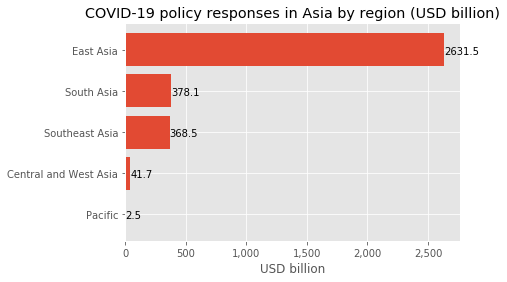

In [1109]:
width = df2.groupby(level=0).sum().loc[asia_region, 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(width.index, width, align='center')
ax.invert_yaxis()
ax.set_title('COVID-19 policy responses in Asia by region (USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))

for key, value in enumerate(width):
    ax.text(value + 3, key + .1, str(round(value/1e9, 1)))


plt.show()

In [1110]:
df2.groupby(level=0).mean().loc[asia_region, 'pkg_gdp'].sort_values(ascending=False)

region
East Asia                20.822297
Southeast Asia            9.468107
South Asia                6.867060
Pacific                   6.699671
Central and West Asia     4.172693
Name: pkg_gdp, dtype: float64

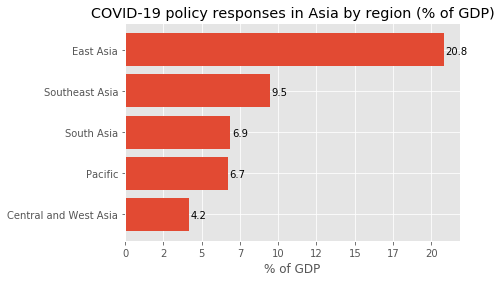

In [1112]:
width = df2.groupby(level=0).mean().loc[asia_region, 'pkg_gdp'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(width.index, width, align='center')
ax.invert_yaxis()
ax.set_title('COVID-19 policy responses in Asia by region (% of GDP)')
ax.set_xlabel('% of GDP')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

for key, value in enumerate(width):
    ax.text(value + .1, key + .1, str(round(value, 1)))


plt.show()

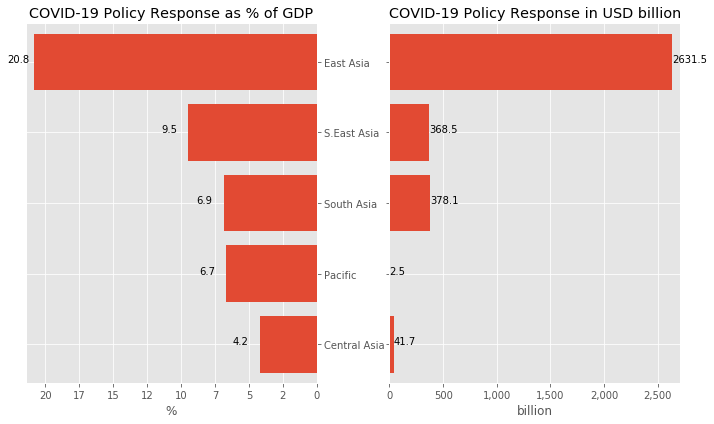

In [1193]:
y0 = df2.groupby(level=0).mean().loc[asia_region].sort_values(by='pkg_gdp')['pkg_gdp']
y1 = df2.groupby(level=0).sum().loc[y0.index, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 6), sharey=True)

axs[0].barh(y0.index, y0, align='center')
axs[0].invert_yaxis()
axs[0].set_title('COVID-19 Policy Response as % of GDP')
axs[0].set_xlabel('%')
axs[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


axs[1].barh(y1.index, y1, align='center')
axs[1].invert_yaxis()
axs[1].set_title('COVID-19 Policy Response in USD billion')
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))


axs[0].invert_xaxis()
axs[0].set(yticks=y0.index, yticklabels=['East Asia', 'S.East Asia', 'South Asia', 
                                         'Pacific', 'Central Asia'][::-1])
axs[0].yaxis.tick_right()

for key, value in enumerate(y0):
    axs[0].text(value + 2, key, str(round(value, 1)))
    
for key, value in enumerate(y1):
    axs[1].text(value + 2, key, str(round(value/1e9, 1)))

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
plt.show()

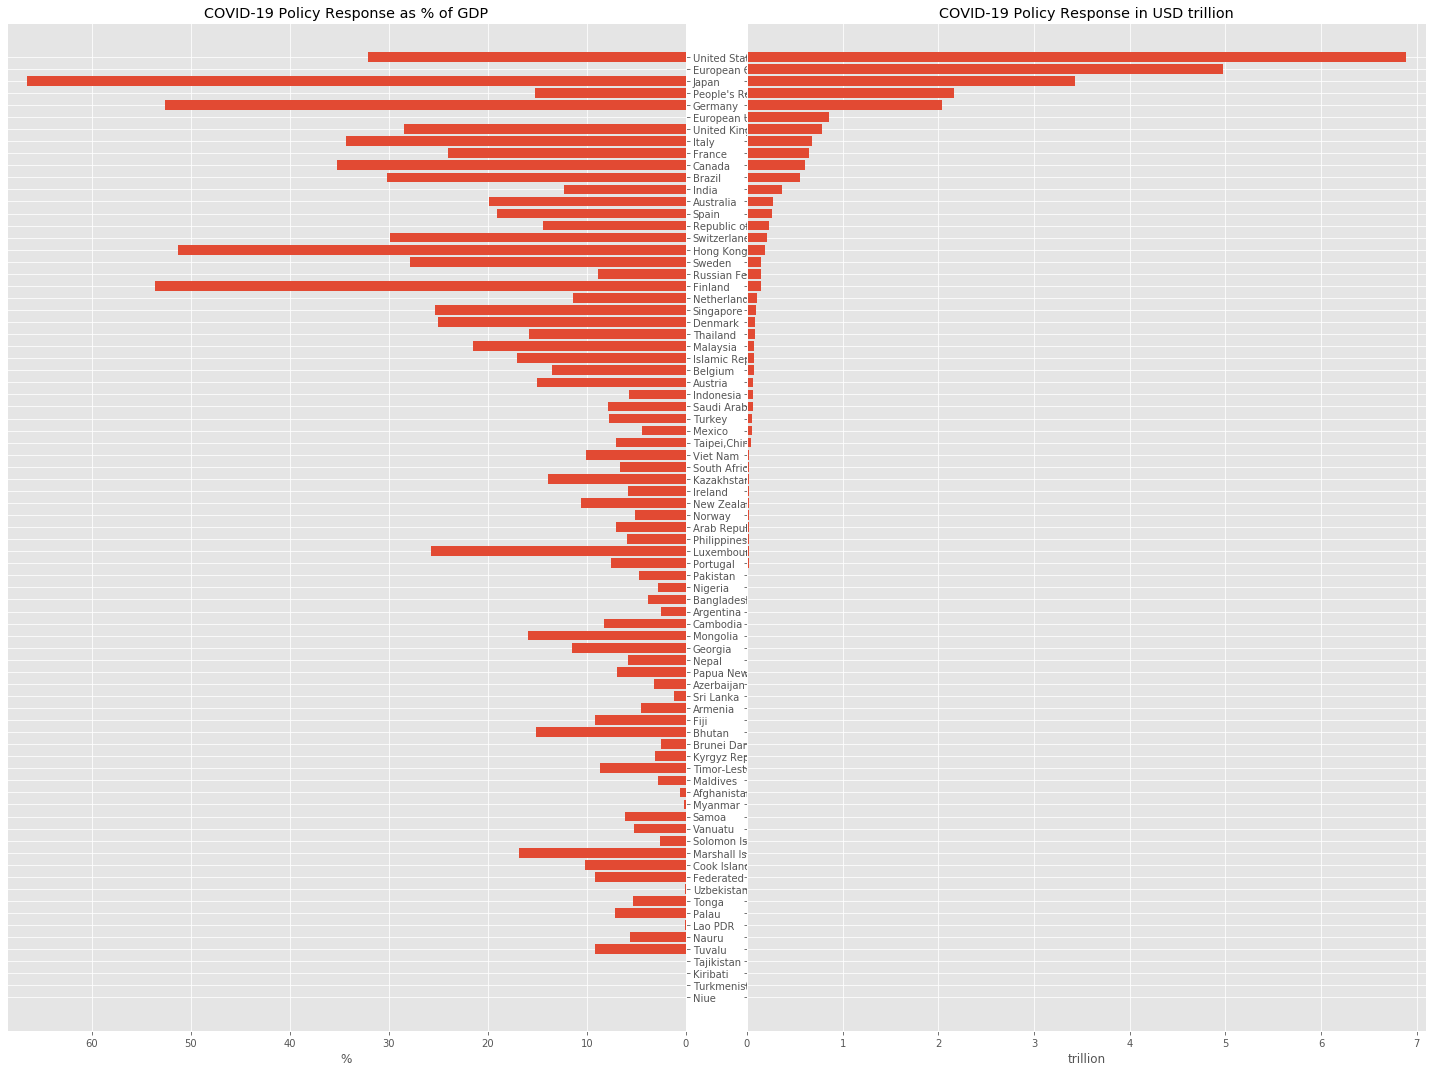

In [1051]:
y0 = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(20, 15), sharey=True)

axs[0].barh(y0.index, y0, align='center')
axs[0].invert_yaxis()
axs[0].set_title('COVID-19 Policy Response as % of GDP')
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center')
axs[1].invert_yaxis()
axs[1].set_title('COVID-19 Policy Response in USD trillion')
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e12))))
axs[1].set_xlabel('trillion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.index, yticklabels=y1.index)
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

In [767]:
df2.groupby(level=1).max().sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp'].head(10)

country
Japan               66.559742
Finland             53.617710
Germany             52.652813
Hong Kong, China    51.316261
Canada              35.278587
Italy               34.328565
United States       32.116962
Brazil              30.183539
Switzerland         29.877012
United Kingdom      28.451127
Name: pkg_gdp, dtype: float64

Rank region/countries according to policy package

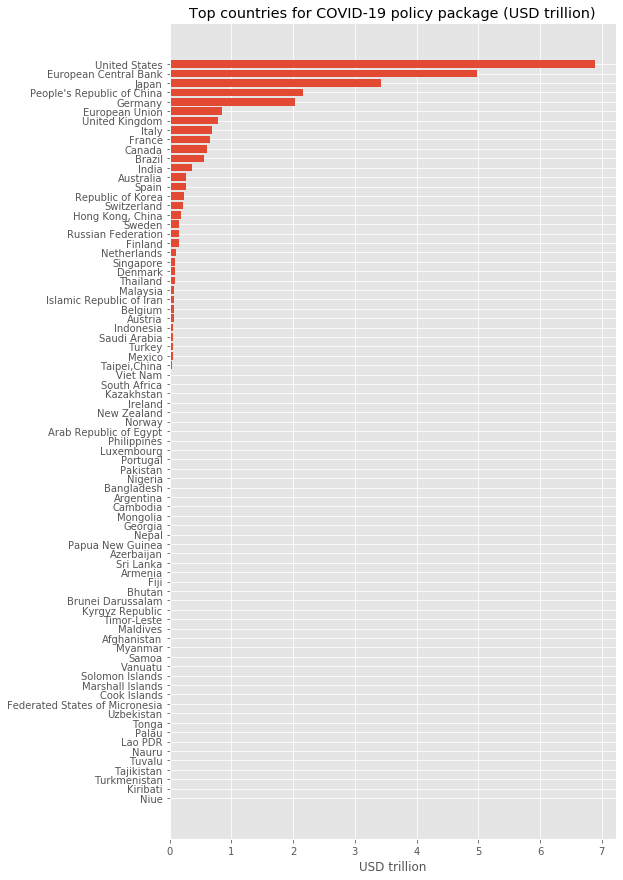

In [768]:
y = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=False).loc[:, 'amount_usd']

fig, ax = plt.subplots(figsize=(8, 15))

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries for COVID-19 policy package (USD trillion)')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e12))))
ax.set_xlabel('USD trillion')

plt.show()


In [769]:
mask = df2.reset_index(level=0)['region'].isin(['Other ADB Members', 'Other Economies', 'Others'])

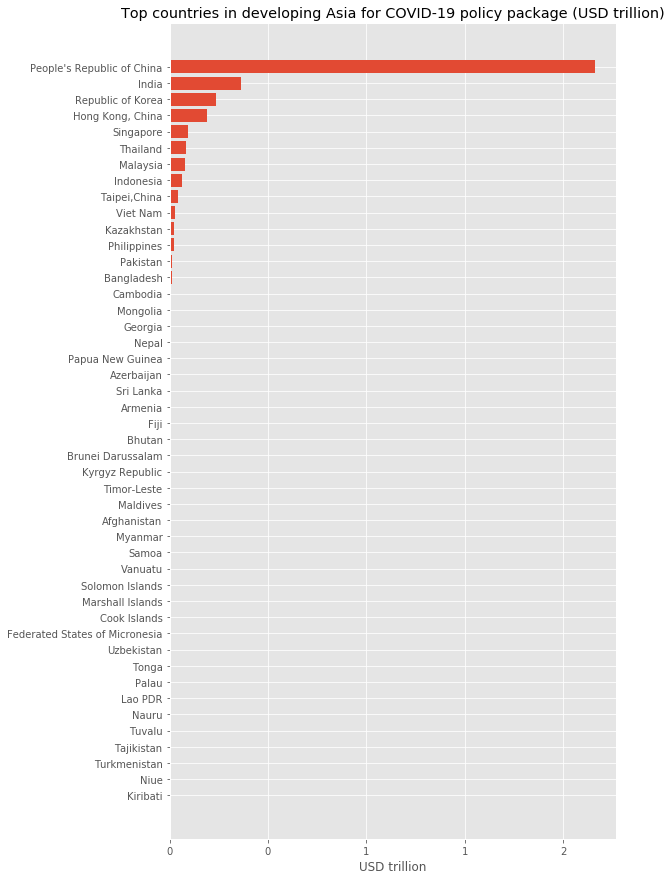

In [770]:
y = df2.reset_index(level=0)[~mask].sort_values(by='amount_usd', ascending=False).loc[:, 'amount_usd']

fig, ax = plt.subplots(figsize=(8, 15))

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in developing Asia for COVID-19 policy package (USD trillion)')
ax.set_xlabel('USD trillion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e12))))


plt.show()

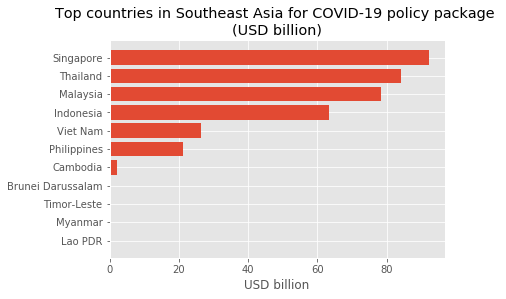

In [771]:
y = df2.loc['Southeast Asia', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in Southeast Asia for COVID-19 policy package \n(USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))

plt.show()

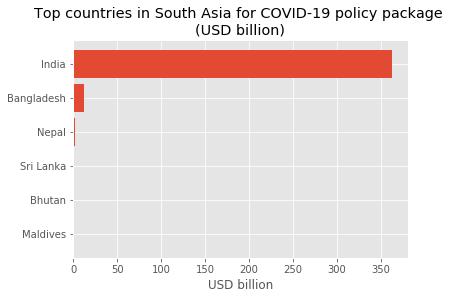

In [772]:
y = df2.loc['South Asia', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in South Asia for COVID-19 policy package \n(USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))


plt.show()

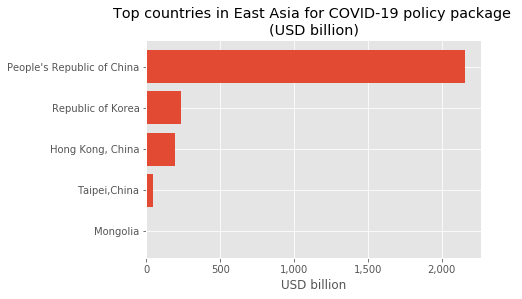

In [773]:
y = df2.loc['East Asia', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in East Asia for COVID-19 policy package \n(USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))


plt.show()

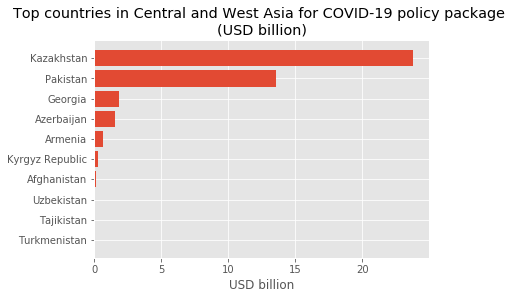

In [774]:
y = df2.loc['Central and West Asia', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in Central and West Asia for COVID-19 policy package \n(USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))


plt.show()

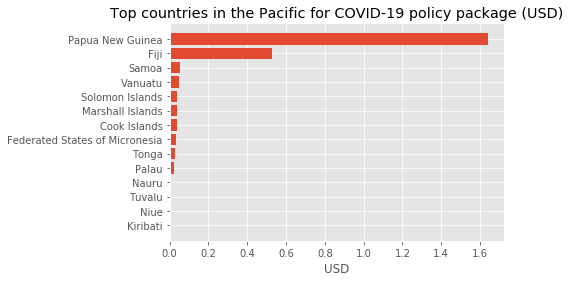

In [775]:
y = df2.loc['Pacific', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in the Pacific for COVID-19 policy package (USD)')
ax.set_xlabel('USD')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)/1e9)))

plt.show()

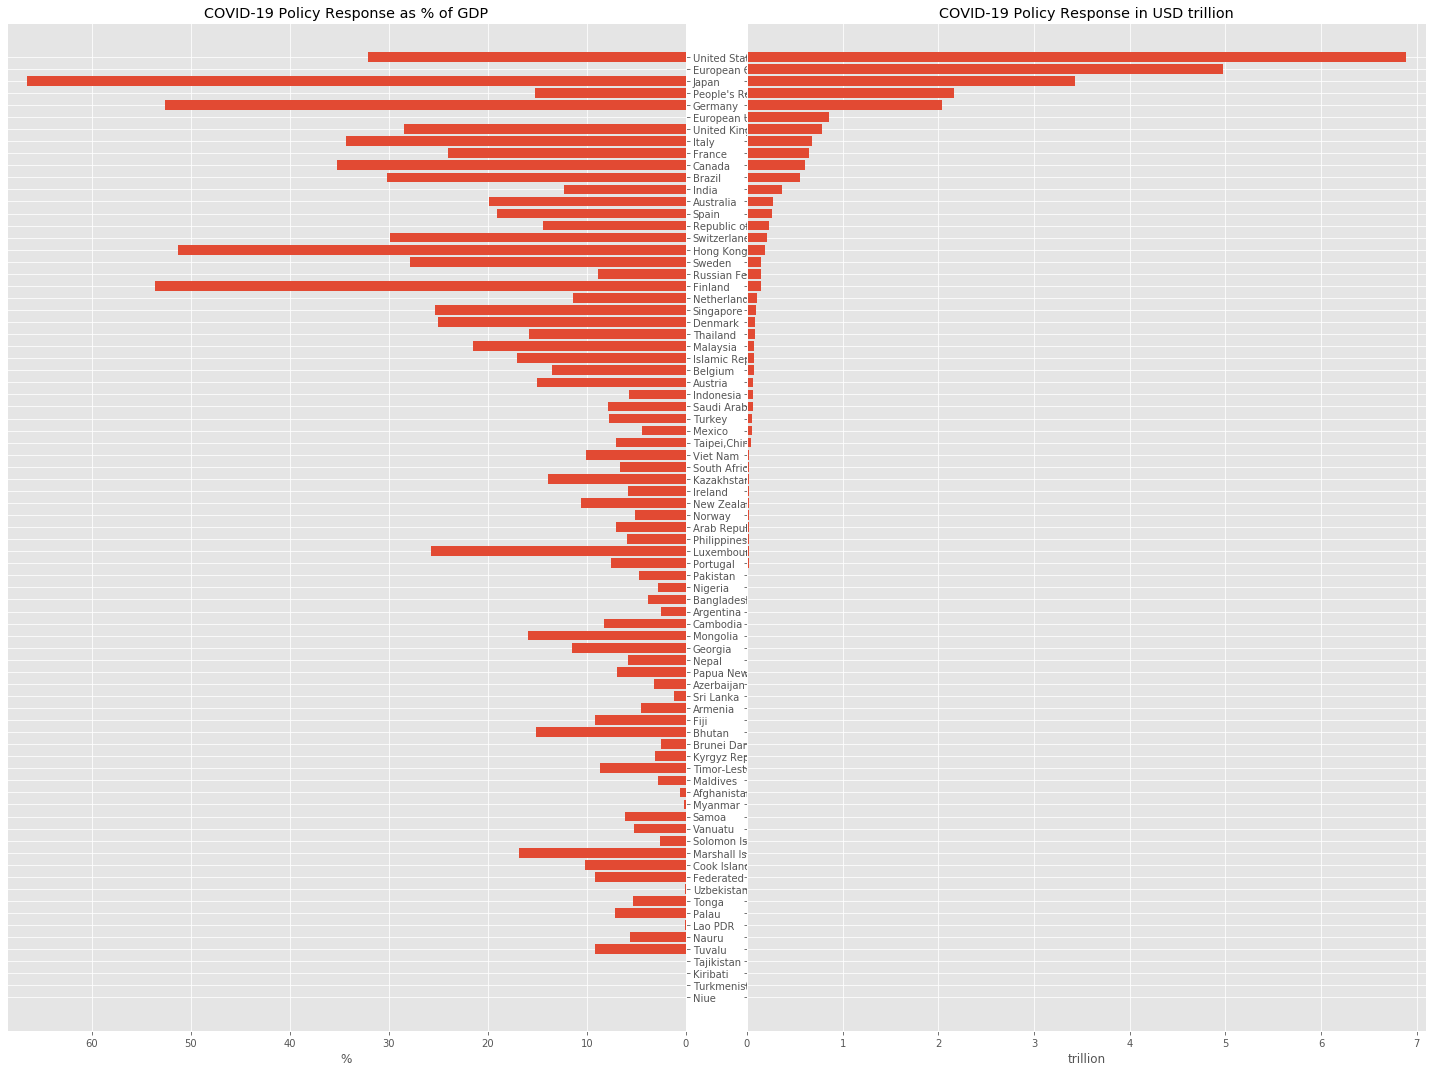

In [776]:
y0 = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(20, 15), sharey=True)

axs[0].barh(y0.index, y0, align='center')
axs[0].invert_yaxis()
axs[0].set_title('COVID-19 Policy Response as % of GDP')
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center')
axs[1].invert_yaxis()
axs[1].set_title('COVID-19 Policy Response in USD trillion')
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e12))))
axs[1].set_xlabel('trillion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.index, yticklabels=y1.index)
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


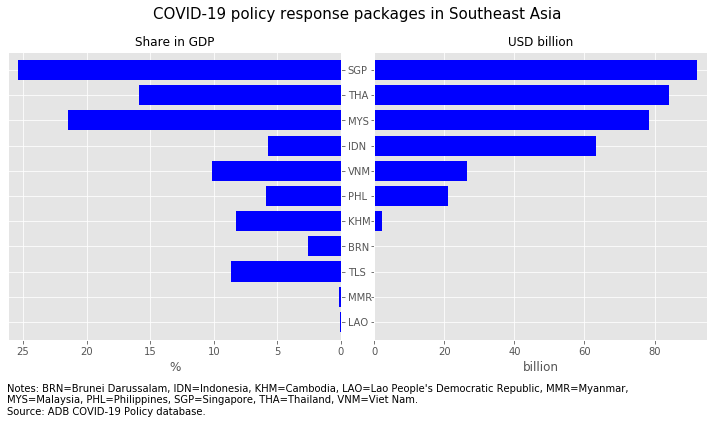

In [777]:
y0 = df2.loc['Southeast Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['Southeast Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.index, y0, align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.index, yticklabels=['SGP', 'THA', 'MYS', 'IDN', 'VNM', 'PHL', 
                                         'KHM', 'BRN', 'TLS', 'MMR', 'LAO'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in Southeast Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: BRN=Brunei Darussalam, IDN=Indonesia, KHM=Cambodia, LAO=Lao People\'s Democratic Republic, \
MMR=Myanmar, \nMYS=Malaysia, PHL=Philippines, SGP=Singapore, THA=Thailand, VNM=Viet Nam. \nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


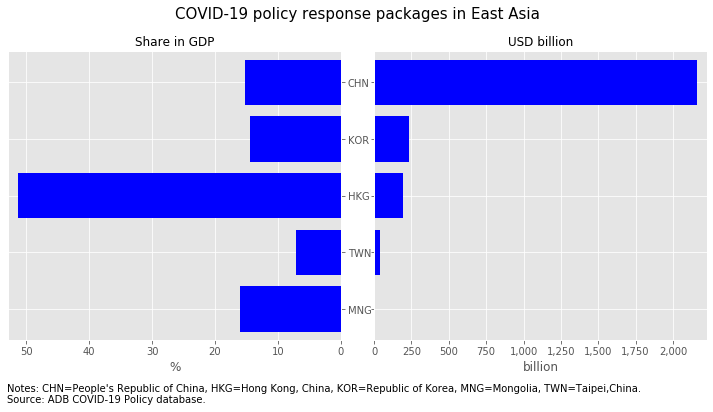

In [778]:
y0 = df2.loc['East Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['East Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.index, y0, align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.index, yticklabels=['CHN', 'KOR', 'HKG', 'TWN', 'MNG'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in East Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: CHN=People\'s Republic of China, HKG=Hong Kong, China, KOR=Republic of Korea, \
MNG=Mongolia, TWN=Taipei,China. \nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


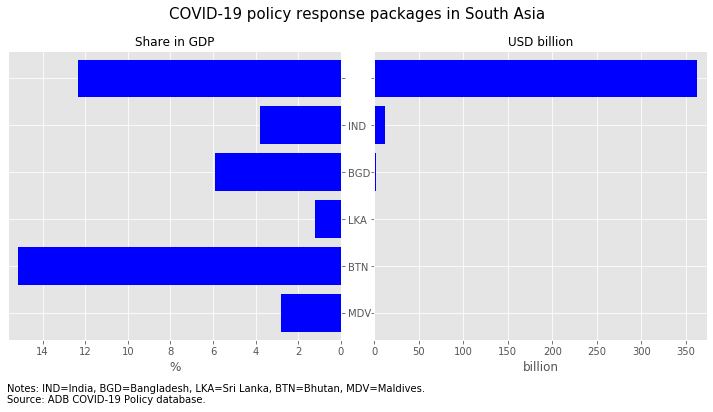

In [779]:
y0 = df2.loc['South Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['South Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.loc['Maldives':].index, y0.loc['Maldives':], align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Maldives':].index, y1.loc['Maldives':], align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.loc['Maldives':].index, yticklabels=['IND', 'BGD', 'LKA', 'BTN', 'MDV'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in South Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: IND=India, BGD=Bangladesh, LKA=Sri Lanka, BTN=Bhutan, MDV=Maldives.\nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [780]:
y1.loc['Maldives':]

country
Maldives      1.626655e+08
Bhutan        4.305926e+08
Sri Lanka     1.034677e+09
Nepal         1.754694e+09
Bangladesh    1.207846e+10
India         3.626717e+11
Name: amount_usd, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


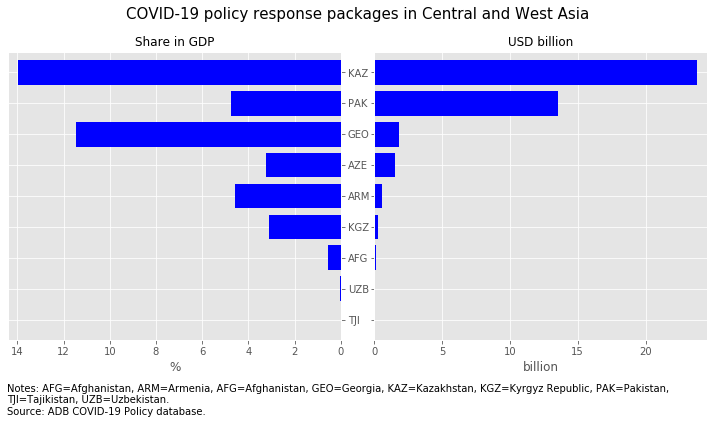

In [781]:
y0 = df2.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.loc['Tajikistan':].index, y0.loc['Tajikistan':], align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Tajikistan':].index, y1.loc['Tajikistan':], align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.loc['Tajikistan':].index, yticklabels=['KAZ', 'PAK', 'GEO', 'AZE', 'ARM',
                                         'KGZ', 'AFG', 'UZB', 'TJI'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in Central and West Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: AFG=Afghanistan, ARM=Armenia, AFG=Afghanistan, GEO=Georgia, \
KAZ=Kazakhstan, KGZ=Kyrgyz Republic, PAK=Pakistan, \nTJI=Tajikistan, UZB=Uzbekistan. \nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [782]:
y1.loc['Tajikistan':]

country
Tajikistan         1.253464e+06
Uzbekistan         3.213240e+07
Afghanistan        1.016625e+08
Kyrgyz Republic    2.580000e+08
Armenia            6.134861e+08
Azerbaijan         1.525588e+09
Georgia            1.823888e+09
Pakistan           1.356053e+10
Kazakhstan         2.379624e+10
Name: amount_usd, dtype: float64

In [783]:
y0.loc['Tajikistan':]

country
Tajikistan          0.015376
Uzbekistan          0.053120
Afghanistan         0.542663
Kyrgyz Republic     3.123109
Armenia             4.563271
Azerbaijan          3.234166
Georgia            11.452988
Pakistan            4.771239
Kazakhstan         13.970997
Name: pkg_gdp, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:34: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


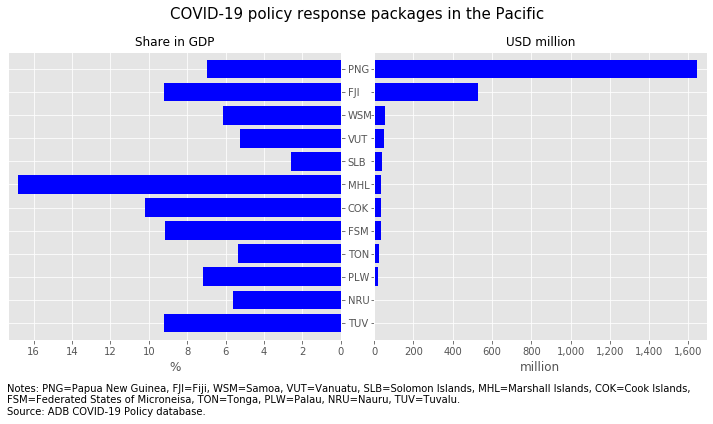

In [784]:
y0 = df2.loc['Pacific'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['Pacific'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.loc['Tuvalu':].index, y0.loc['Tuvalu':], align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Tuvalu':].index, y1.loc['Tuvalu':], align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('USD million', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))
axs[1].set_xlabel('million')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.loc['Tuvalu':].index, yticklabels=['PNG', 'FJI', 'WSM', 'VUT', 'SLB',
                                                        'MHL', 'COK', 'FSM', 'TON', 'PLW',
                                                        'NRU', 'TUV'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in the Pacific',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: PNG=Papua New Guinea, FJI=Fiji, WSM=Samoa, VUT=Vanuatu, SLB=Solomon Islands, \
MHL=Marshall Islands, COK=Cook Islands, \nFSM=Federated States of Microneisa, TON=Tonga, PLW=Palau, \
NRU=Nauru, TUV=Tuvalu. \nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [785]:
y0

country
Kiribati                           0.000000
Niue                               0.000000
Tuvalu                             9.198376
Nauru                              5.623084
Palau                              7.187907
Tonga                              5.352384
Federated States of Micronesia     9.186352
Cook Islands                      10.225808
Marshall Islands                  16.818182
Solomon Islands                    2.615866
Vanuatu                            5.272368
Samoa                              6.124575
Fiji                               9.222343
Papua New Guinea                   6.968153
Name: pkg_gdp, dtype: float64

In [786]:
y1

country
Kiribati                          0.000000e+00
Niue                              0.000000e+00
Tuvalu                            3.863318e+06
Nauru                             6.072931e+06
Palau                             2.091681e+07
Tonga                             2.611964e+07
Federated States of Micronesia    3.500000e+07
Cook Islands                      3.690260e+07
Marshall Islands                  3.700000e+07
Solomon Islands                   3.766847e+07
Vanuatu                           5.014022e+07
Samoa                             5.542740e+07
Fiji                              5.264113e+08
Papua New Guinea                  1.643578e+09
Name: amount_usd, dtype: float64

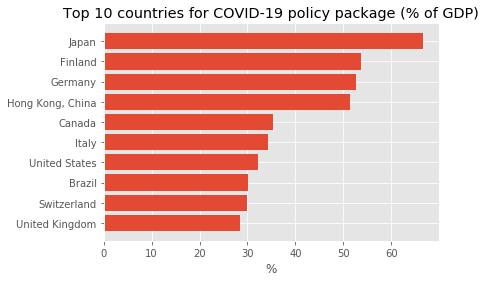

In [787]:
y = df2.groupby(level=1).max().sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp'].head(10)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top 10 countries for COVID-19 policy package (% of GDP)')
ax.set_xlabel('%')

plt.show()


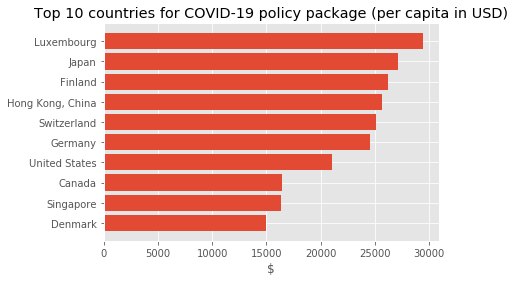

In [788]:
y = df2.groupby(level=1).max().sort_values(by='pkg_pc_usd', ascending=False).loc[:, 'pkg_pc_usd'].head(10)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top 10 countries for COVID-19 policy package (per capita in USD)')
ax.set_xlabel('$')

plt.show()

In [789]:
df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

country
Singapore            25.390631
Malaysia             21.474972
Thailand             15.891051
Viet Nam             10.129729
Timor-Leste           8.645337
Cambodia              8.267864
Philippines           5.898206
Indonesia             5.706596
Brunei Darussalam     2.554178
Myanmar               0.149475
Lao PDR               0.041141
Name: pkg_gdp, dtype: float64

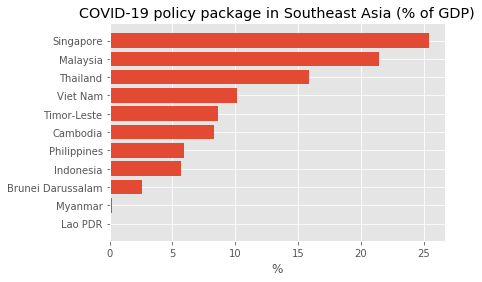

In [790]:
y = df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in Southeast Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

In [791]:
df2.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

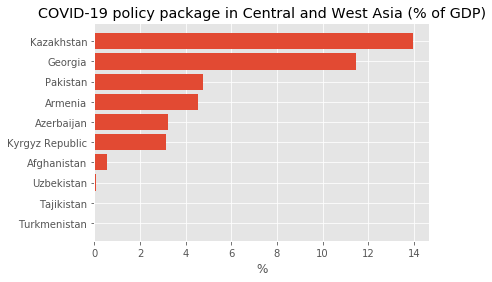

In [792]:
y = df2.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in Central and West Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

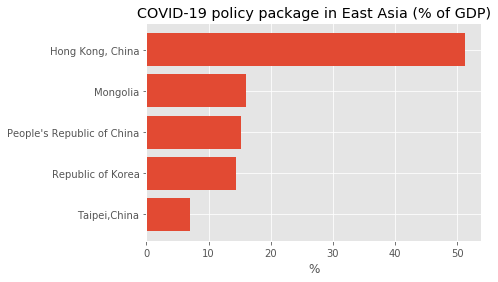

In [793]:
y = df2.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in East Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

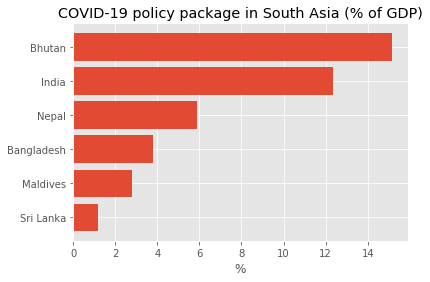

In [794]:
y = df2.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in South Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

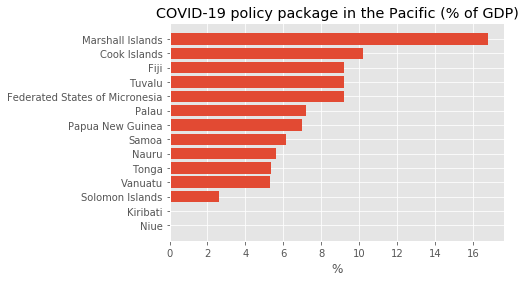

In [795]:
y = df2.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in the Pacific (% of GDP)')
ax.set_xlabel('%')

plt.show()

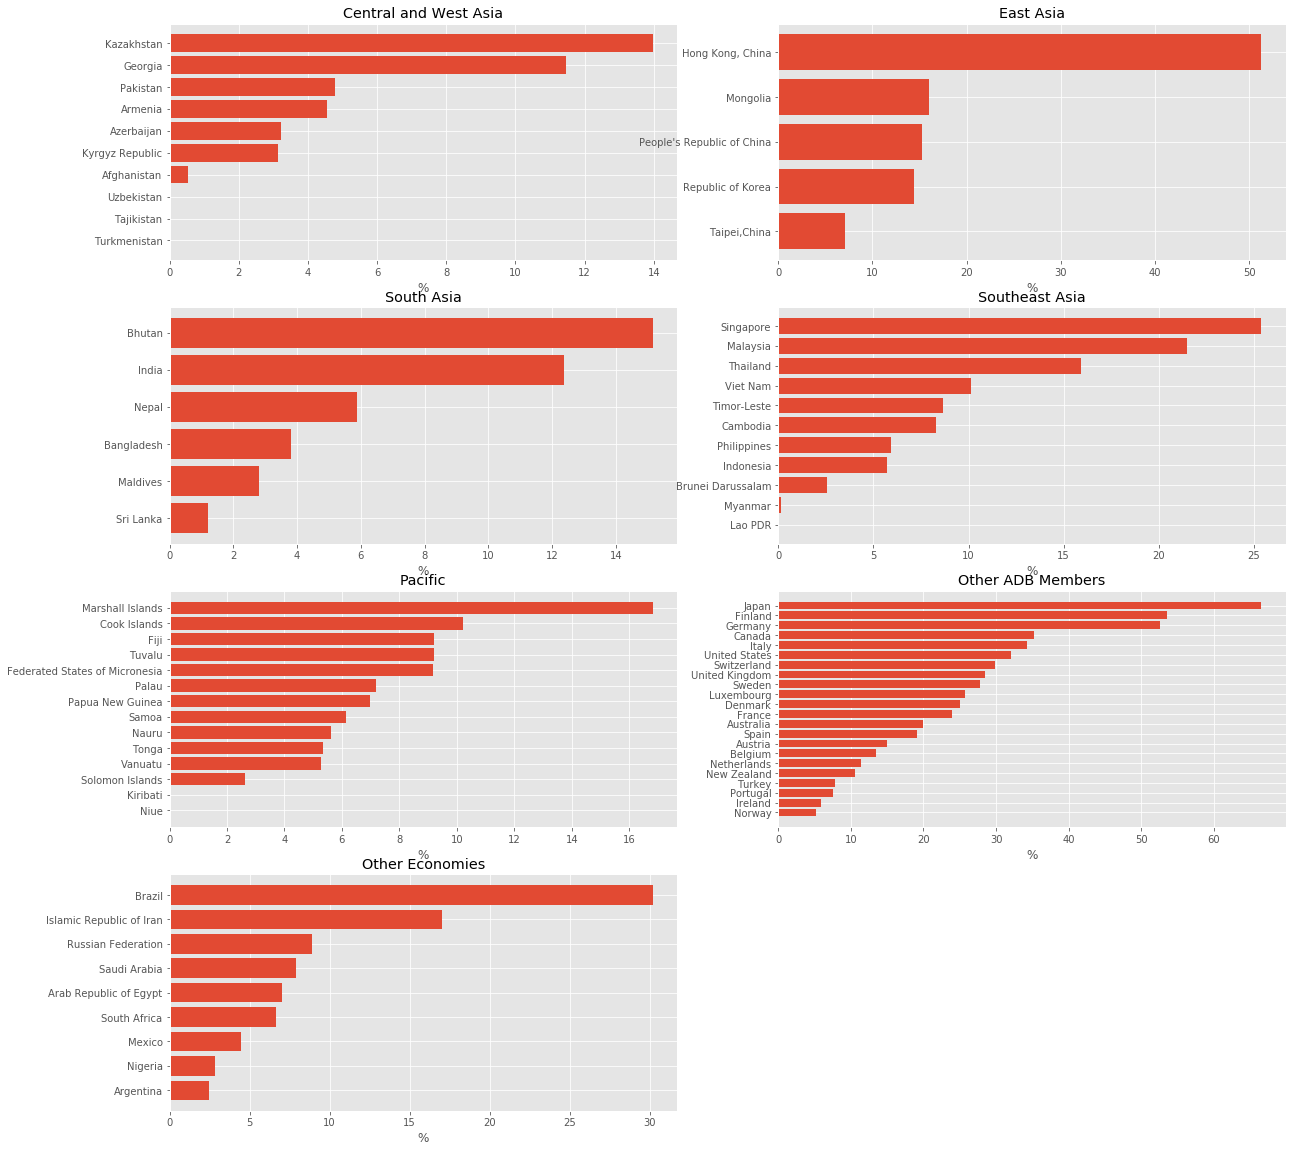

In [796]:
fig, axs= plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

y = df2.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[0, 0].barh(y.index, y, )
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('Central and West Asia')
axs[0, 0].set_xlabel('%')

y = df2.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[0, 1].barh(y.index, y, )
axs[0, 1].invert_yaxis()
axs[0, 1].set_title('East Asia')
axs[0, 1].set_xlabel('%')

y = df2.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[1, 0].barh(y.index, y, )
axs[1, 0].invert_yaxis()
axs[1, 0].set_title('South Asia')
axs[1, 0].set_xlabel('%')

y = df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[1, 1].barh(y.index, y, )
axs[1, 1].invert_yaxis()
axs[1, 1].set_title('Southeast Asia')
axs[1, 1].set_xlabel('%')

y = df2.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[2, 0].barh(y.index, y, )
axs[2, 0].invert_yaxis()
axs[2, 0].set_title('Pacific')
axs[2, 0].set_xlabel('%')

y = df2.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[2, 1].barh(y.index, y, )
axs[2, 1].invert_yaxis()
axs[2, 1].set_title('Other ADB Members')
axs[2, 1].set_xlabel('%')

y = df2.loc['Other Economies'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[3, 0].barh(y.index, y, )
axs[3, 0].invert_yaxis()
axs[3, 0].set_title('Other Economies')
axs[3, 0].set_xlabel('%')

axs[3, 1].axis('off')

plt.show()

In [797]:
df2.reset_index(level=0)

region    amount_lcy    amount_usd       gdp_lcy  \
country                                                                        
Afghanistan  Central and West Asia  8.000000e+09  1.016625e+08  1.502470e+12   
Armenia      Central and West Asia  3.000000e+11  6.134861e+08  6.541000e+12   
Azerbaijan   Central and West Asia  2.593500e+09  1.525588e+09  8.019100e+10   
Georgia      Central and West Asia  5.545956e+09  1.823888e+09  4.474900e+10   
Kazakhstan   Central and West Asia  9.810000e+12  2.379624e+10  6.543920e+13   
...                            ...           ...           ...           ...   
Philippines         Southeast Asia  1.071298e+12  2.104562e+10  1.873280e+13   
Singapore           Southeast Asia  1.304905e+11  9.212178e+10  4.980840e+11   
Thailand            Southeast Asia  2.700000e+12  8.409179e+10  1.692200e+13   
Timor-Leste         Southeast Asia  2.540000e+08  2.540000e+08  2.938000e+09   
Viet Nam            Southeast Asia  6.158000e+14  2.650312e+10  6.085060e+15   

                  gdp_usd         popn    pkg_gdp    pkg_pc_usd  
country                                                          
Afghanistan  1.873400e+10   37172386.0   0.542663      2.734893  
Armenia      1.344400e+10    2951776.0   4.563271    207.836264  
Azerbaijan   4.717100e+10    9942334.0   3.234166    153.443672  
Georgia      1.592500e+10    3731000.0  11.452988    488.847057  
Kazakhstan   1.703260e+11   18276499.0  13.970997   1302.013047  
...                   ...          ...        ...           ...  
Philippines  3.568140e+11  106651922.0   5.898206    197.329997  
Singapore    3.628180e+11    5638676.0  25.390631  16337.484018  
Thailand     5.291770e+11   69428524.0  15.891051   1211.199412  
Timor-Leste  2.938000e+09    1267972.0   8.645337    200.319881  
Viet Nam     2.616370e+11   95540395.0  10.129729    277.402247  

[79 rows x 8 columns]

In [798]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     153.443672  
                      Georgia        488.847057  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    197.329997  
                      Singapore    16337.484018  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

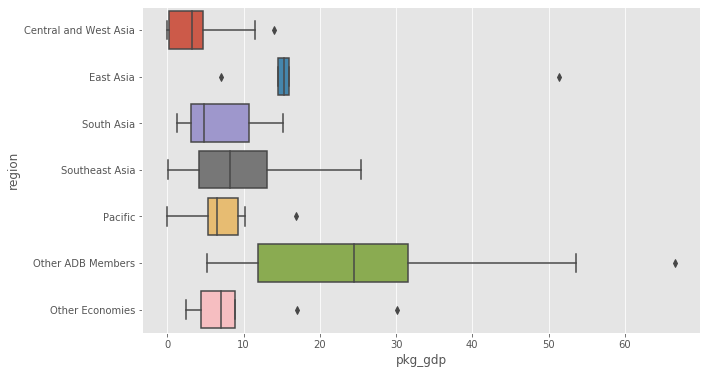

In [799]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['Central and West Asia', 'East Asia', 'South Asia', 'Southeast Asia', 'Pacific', 
                   'Other ADB Members', 'Other Economies'])

plt.show()

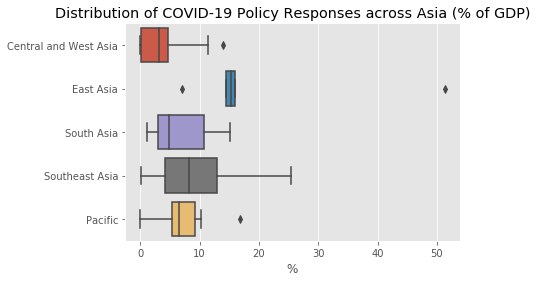

In [800]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['Central and West Asia', 'East Asia', 'South Asia', 'Southeast Asia', 'Pacific'])

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

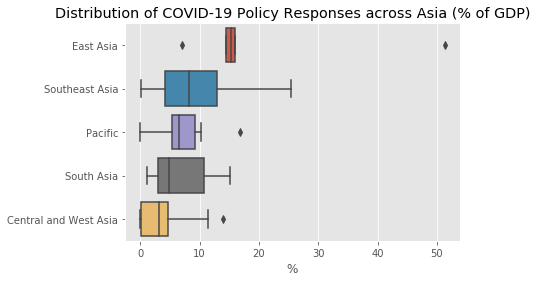

In [801]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
            )
# sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
#               y=df2.reset_index(level=0)['region'],
#               order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
#               color=".25")

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

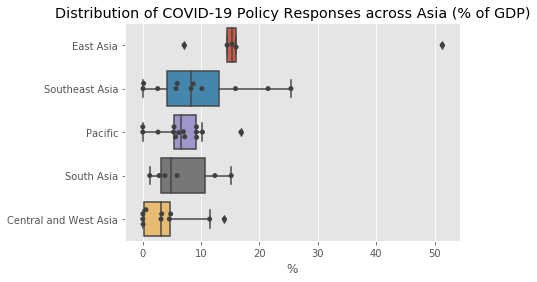

In [802]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'])
sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
              y=df2.reset_index(level=0)['region'],
              order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
              color=".25")

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

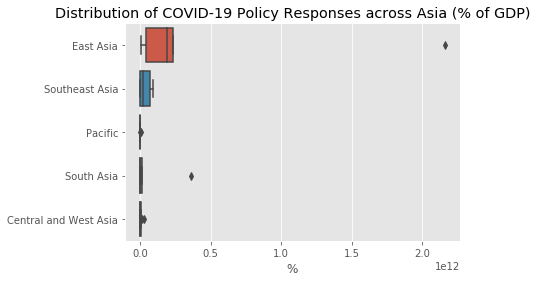

In [803]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['amount_usd'], 
            y=df2.reset_index(level=0)['region'],
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
            )
# sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
#               y=df2.reset_index(level=0)['region'],
#               order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
#               color=".25")

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

In [804]:
measures = [1, 2, 3, 4, 5, 9, 10]

m1 = df1[df1.measure_id.isin([measures[0]])].groupby(level=1).sum().loc[:, 'amount_usd']
m2 = df1[df1.measure_id.isin([measures[1]])].groupby(level=1).sum().loc[:, 'amount_usd']
m3 = df1[df1.measure_id.isin([measures[2]])].groupby(level=1).sum().loc[:, 'amount_usd']
m4 = df1[df1.measure_id.isin([measures[3]])].groupby(level=1).sum().loc[:, 'amount_usd']
m5 = df1[df1.measure_id.isin([measures[4]])].groupby(level=1).sum().loc[:, 'amount_usd']
m9 = df1[df1.measure_id.isin([measures[5]])].groupby(level=1).sum().loc[:, 'amount_usd']
m10 = df1[df1.measure_id.isin([measures[6]])].groupby(level=1).sum().loc[:, 'amount_usd']


In [805]:
pd.concat([m1, m2, m3, m4, m5, m9, m10], axis=1)

amount_usd    amount_usd    amount_usd  \
country                                                            
Afghanistan             0.000000e+00  0.000000e+00  0.000000e+00   
Arab Republic of Egypt  0.000000e+00  6.745160e+09  6.363358e+09   
Argentina               5.466135e+09  4.940239e+08  5.596813e+08   
Armenia                 0.000000e+00  5.112384e+07  0.000000e+00   
Australia               0.000000e+00  9.016100e+10  0.000000e+00   
...                              ...           ...           ...   
United Kingdom          2.971175e+10  1.238100e+11  6.438132e+08   
United States           4.401370e+11  3.202760e+12  6.050000e+11   
Uzbekistan              0.000000e+00  0.000000e+00  0.000000e+00   
Vanuatu                 0.000000e+00  0.000000e+00  1.274751e+07   
Viet Nam                0.000000e+00  0.000000e+00  1.360017e+10   

                          amount_usd    amount_usd    amount_usd    amount_usd  
country                                                                         
Afghanistan             0.000000e+00  1.016625e+08  0.000000e+00  0.000000e+00  
Arab Republic of Egypt  1.272672e+09  6.839337e+09  0.000000e+00  0.000000e+00  
Argentina               0.000000e+00  2.367076e+09  0.000000e+00  2.161275e+09  
Armenia                 0.000000e+00  6.134861e+07  0.000000e+00  5.010136e+08  
Australia               0.000000e+00  1.832140e+11  1.741040e+08  0.000000e+00  
...                              ...           ...           ...           ...  
United Kingdom          0.000000e+00  2.169760e+11  1.857153e+08  4.092550e+11  
United States           0.000000e+00  1.696040e+12  9.417790e+11  0.000000e+00  
Uzbekistan              0.000000e+00  3.213240e+07  0.000000e+00  0.000000e+00  
Vanuatu                 0.000000e+00  3.739271e+07  0.000000e+00  0.000000e+00  
Viet Nam                0.000000e+00  1.290295e+10  0.000000e+00  0.000000e+00  

[79 rows x 7 columns]

In [806]:
df3 = pd.concat([m1, m2, m3, m4, m5, m9, m10], axis=1)

In [807]:
df3.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm9', 'm10']

In [808]:
df3

m1            m2            m3  \
country                                                            
Afghanistan             0.000000e+00  0.000000e+00  0.000000e+00   
Arab Republic of Egypt  0.000000e+00  6.745160e+09  6.363358e+09   
Argentina               5.466135e+09  4.940239e+08  5.596813e+08   
Armenia                 0.000000e+00  5.112384e+07  0.000000e+00   
Australia               0.000000e+00  9.016100e+10  0.000000e+00   
...                              ...           ...           ...   
United Kingdom          2.971175e+10  1.238100e+11  6.438132e+08   
United States           4.401370e+11  3.202760e+12  6.050000e+11   
Uzbekistan              0.000000e+00  0.000000e+00  0.000000e+00   
Vanuatu                 0.000000e+00  0.000000e+00  1.274751e+07   
Viet Nam                0.000000e+00  0.000000e+00  1.360017e+10   

                                  m4            m5            m9           m10  
country                                                                         
Afghanistan             0.000000e+00  1.016625e+08  0.000000e+00  0.000000e+00  
Arab Republic of Egypt  1.272672e+09  6.839337e+09  0.000000e+00  0.000000e+00  
Argentina               0.000000e+00  2.367076e+09  0.000000e+00  2.161275e+09  
Armenia                 0.000000e+00  6.134861e+07  0.000000e+00  5.010136e+08  
Australia               0.000000e+00  1.832140e+11  1.741040e+08  0.000000e+00  
...                              ...           ...           ...           ...  
United Kingdom          0.000000e+00  2.169760e+11  1.857153e+08  4.092550e+11  
United States           0.000000e+00  1.696040e+12  9.417790e+11  0.000000e+00  
Uzbekistan              0.000000e+00  3.213240e+07  0.000000e+00  0.000000e+00  
Vanuatu                 0.000000e+00  3.739271e+07  0.000000e+00  0.000000e+00  
Viet Nam                0.000000e+00  1.290295e+10  0.000000e+00  0.000000e+00  

[79 rows x 7 columns]

In [809]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     153.443672  
                      Georgia        488.847057  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    197.329997  
                      Singapore    16337.484018  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

In [810]:
df3 = df2.reset_index(level=0).join(df3)

In [811]:
df3

region    amount_lcy    amount_usd       gdp_lcy  \
country                                                                        
Afghanistan  Central and West Asia  8.000000e+09  1.016625e+08  1.502470e+12   
Armenia      Central and West Asia  3.000000e+11  6.134861e+08  6.541000e+12   
Azerbaijan   Central and West Asia  2.593500e+09  1.525588e+09  8.019100e+10   
Georgia      Central and West Asia  5.545956e+09  1.823888e+09  4.474900e+10   
Kazakhstan   Central and West Asia  9.810000e+12  2.379624e+10  6.543920e+13   
...                            ...           ...           ...           ...   
Philippines         Southeast Asia  1.071298e+12  2.104562e+10  1.873280e+13   
Singapore           Southeast Asia  1.304905e+11  9.212178e+10  4.980840e+11   
Thailand            Southeast Asia  2.700000e+12  8.409179e+10  1.692200e+13   
Timor-Leste         Southeast Asia  2.540000e+08  2.540000e+08  2.938000e+09   
Viet Nam            Southeast Asia  6.158000e+14  2.650312e+10  6.085060e+15   

                  gdp_usd         popn    pkg_gdp    pkg_pc_usd            m1  \
country                                                                         
Afghanistan  1.873400e+10   37172386.0   0.542663      2.734893  0.000000e+00   
Armenia      1.344400e+10    2951776.0   4.563271    207.836264  0.000000e+00   
Azerbaijan   4.717100e+10    9942334.0   3.234166    153.443672  0.000000e+00   
Georgia      1.592500e+10    3731000.0  11.452988    488.847057  2.297000e+08   
Kazakhstan   1.703260e+11   18276499.0  13.970997   1302.013047  4.244997e+09   
...                   ...          ...        ...           ...           ...   
Philippines  3.568140e+11  106651922.0   5.898206    197.329997  5.200693e+09   
Singapore    3.628180e+11    5638676.0  25.390631  16337.484018  2.823862e+09   
Thailand     5.291770e+11   69428524.0  15.891051   1211.199412  0.000000e+00   
Timor-Leste  2.938000e+09    1267972.0   8.645337    200.319881  0.000000e+00   
Viet Nam     2.616370e+11   95540395.0  10.129729    277.402247  0.000000e+00   

                       m2            m3            m4            m5  \
country                                                               
Afghanistan  0.000000e+00  0.000000e+00  0.000000e+00  1.016625e+08   
Armenia      5.112384e+07  0.000000e+00  0.000000e+00  6.134861e+07   
Azerbaijan   2.941176e+08  0.000000e+00  0.000000e+00  6.382353e+08   
Georgia      3.058474e+08  0.000000e+00  0.000000e+00  1.123907e+09   
Kazakhstan   0.000000e+00  8.732565e+08  0.000000e+00  1.867799e+10   
...                   ...           ...           ...           ...   
Philippines  2.357397e+09  3.637857e+08  0.000000e+00  1.027523e+10   
Singapore    0.000000e+00  2.096717e+10  3.741617e+09  5.158913e+10   
Thailand     2.647334e+10  1.401530e+10  0.000000e+00  4.360315e+10   
Timor-Leste  4.000000e+06  0.000000e+00  0.000000e+00  1.500000e+08   
Viet Nam     0.000000e+00  1.360017e+10  0.000000e+00  1.290295e+10   

                       m9           m10  
country                                  
Afghanistan  0.000000e+00  0.000000e+00  
Armenia      0.000000e+00  5.010136e+08  
Azerbaijan   5.000000e+06  5.882353e+08  
Georgia      0.000000e+00  1.644341e+08  
Kazakhstan   0.000000e+00  0.000000e+00  
...                   ...           ...  
Philippines  0.000000e+00  2.848522e+09  
Singapore    1.300000e+10  0.000000e+00  
Thailand     0.000000e+00  0.000000e+00  
Timor-Leste  0.000000e+00  1.000000e+08  
Viet Nam     0.000000e+00  0.000000e+00  

[79 rows x 15 columns]

In [812]:
df3 = df3.assign(m1_pkg = lambda x: 100 * x.m1 / x.amount_usd)
df3 = df3.assign(m2_pkg = lambda x: 100 * x.m2 / x.amount_usd)
df3 = df3.assign(m3_pkg = lambda x: 100 * x.m3 / x.amount_usd)
df3 = df3.assign(m4_pkg = lambda x: 100 * x.m4 / x.amount_usd)
df3 = df3.assign(m5_pkg = lambda x: 100 * x.m5 / x.amount_usd)
df3 = df3.assign(m9_pkg = lambda x: 100 * x.m9 / x.amount_usd)
df3 = df3.assign(m10_pkg = lambda x: 100 * x.m10 / x.amount_usd)

df3 = df3.assign(m1_gdp = lambda x: 100 * x.m1 / x.gdp_usd)
df3 = df3.assign(m2_gdp = lambda x: 100 * x.m2 / x.gdp_usd)
df3 = df3.assign(m3_gdp = lambda x: 100 * x.m3 / x.gdp_usd)
df3 = df3.assign(m4_gdp = lambda x: 100 * x.m4 / x.gdp_usd)
df3 = df3.assign(m5_gdp = lambda x: 100 * x.m5 / x.gdp_usd)
df3 = df3.assign(m9_gdp = lambda x: 100 * x.m9 / x.gdp_usd)
df3 = df3.assign(m10_gdp = lambda x: 100 * x.m10 / x.gdp_usd)

In [813]:
df3

region    amount_lcy    amount_usd       gdp_lcy  \
country                                                                        
Afghanistan  Central and West Asia  8.000000e+09  1.016625e+08  1.502470e+12   
Armenia      Central and West Asia  3.000000e+11  6.134861e+08  6.541000e+12   
Azerbaijan   Central and West Asia  2.593500e+09  1.525588e+09  8.019100e+10   
Georgia      Central and West Asia  5.545956e+09  1.823888e+09  4.474900e+10   
Kazakhstan   Central and West Asia  9.810000e+12  2.379624e+10  6.543920e+13   
...                            ...           ...           ...           ...   
Philippines         Southeast Asia  1.071298e+12  2.104562e+10  1.873280e+13   
Singapore           Southeast Asia  1.304905e+11  9.212178e+10  4.980840e+11   
Thailand            Southeast Asia  2.700000e+12  8.409179e+10  1.692200e+13   
Timor-Leste         Southeast Asia  2.540000e+08  2.540000e+08  2.938000e+09   
Viet Nam            Southeast Asia  6.158000e+14  2.650312e+10  6.085060e+15   

                  gdp_usd         popn    pkg_gdp    pkg_pc_usd            m1  \
country                                                                         
Afghanistan  1.873400e+10   37172386.0   0.542663      2.734893  0.000000e+00   
Armenia      1.344400e+10    2951776.0   4.563271    207.836264  0.000000e+00   
Azerbaijan   4.717100e+10    9942334.0   3.234166    153.443672  0.000000e+00   
Georgia      1.592500e+10    3731000.0  11.452988    488.847057  2.297000e+08   
Kazakhstan   1.703260e+11   18276499.0  13.970997   1302.013047  4.244997e+09   
...                   ...          ...        ...           ...           ...   
Philippines  3.568140e+11  106651922.0   5.898206    197.329997  5.200693e+09   
Singapore    3.628180e+11    5638676.0  25.390631  16337.484018  2.823862e+09   
Thailand     5.291770e+11   69428524.0  15.891051   1211.199412  0.000000e+00   
Timor-Leste  2.938000e+09    1267972.0   8.645337    200.319881  0.000000e+00   
Viet Nam     2.616370e+11   95540395.0  10.129729    277.402247  0.000000e+00   

                       m2  ...      m5_pkg     m9_pkg    m10_pkg    m1_gdp  \
country                    ...                                               
Afghanistan  0.000000e+00  ...  100.000000   0.000000   0.000000  0.000000   
Armenia      5.112384e+07  ...   10.000000   0.000000  81.666667  0.000000   
Azerbaijan   2.941176e+08  ...   41.835358   0.327742  38.557933  0.000000   
Georgia      3.058474e+08  ...   61.621475   0.000000   9.015578  1.442386   
Kazakhstan   0.000000e+00  ...   78.491335   0.000000   0.000000  2.492278   
...                   ...  ...         ...        ...        ...       ...   
Philippines  2.357397e+09  ...   48.823577   0.000000  13.534983  1.457536   
Singapore    0.000000e+00  ...   56.001012  14.111755   0.000000  0.778314   
Thailand     2.647334e+10  ...   51.851852   0.000000   0.000000  0.000000   
Timor-Leste  4.000000e+06  ...   59.055118   0.000000  39.370079  0.000000   
Viet Nam     0.000000e+00  ...   48.684638   0.000000   0.000000  0.000000   

               m2_gdp    m3_gdp    m4_gdp     m5_gdp    m9_gdp   m10_gdp  
country                                                                   
Afghanistan  0.000000  0.000000  0.000000   0.542663  0.000000  0.000000  
Armenia      0.380273  0.000000  0.000000   0.456327  0.000000  3.726671  
Azerbaijan   0.623514  0.000000  0.000000   1.353025  0.010600  1.247027  
Georgia      1.920549  0.000000  0.000000   7.057500  0.000000  1.032553  
Kazakhstan   0.000000  0.512697  0.000000  10.966022  0.000000  0.000000  
...               ...       ...       ...        ...       ...       ...  
Philippines  0.660680  0.101954  0.000000   2.879715  0.000000  0.798321  
Singapore    0.000000  5.778978  1.031265  14.219010  3.583064  0.000000  
Thailand     5.002738  2.648509  0.000000   8.239804  0.000000  0.000000  
Timor-Leste  0.136147  0.000000  0.000000   5.105514  0.000000  3.403676  
Viet Nam     0.000

In [814]:
df3 = df3.set_index('region', append=True).swaplevel()

In [815]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        488.847057  2.297000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...      m5_pkg     m9_pkg  \
region                country                    ...                          
Central and West Asia Afghanistan  0.000000e+00  ...  100.000000   0.000000   
                      Armenia      0.000000e+00  ...   10.000000   0.000000   
                      Azerbaijan   0.000000e+00  ...   41.835358   0.327742   
                      Georgia      0.000000e+00  ...   61.621475   0.000000   
                      Kazakhstan   8.732565e+08  ...   78.491335   0.000000   
...                                         ...  ...         ...        ...   
Southeast Asia        Philippines  3.637857e+08  ...   48.823577   0.000000   
                      Singapore    2.096717e+10  ...   56.001012  14.111755   
                      Thailand     1.401530e+10  ...   51.851852   0.000000   
                      Timor-Leste  0.000000e+00  ...   59.055118   0.000000   
                      Viet Nam     1.360017e+10  ...   48

In [816]:
df3 = df3.assign(m_others_gdp = lambda x: x.m9_gdp + x.m10_gdp)

In [817]:
df3 = df3.assign(m_others_pkg = lambda x: x.m9_pkg + x.m10_pkg)

In [818]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        488.847057  2.297000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.015578  1.442386   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  3.637857e+08  ...  13.534983  1.457536   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [819]:
y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 

In [820]:
y.sum(axis=1)

country
Kazakhstan         100.0
Georgia            100.0
Pakistan           100.0
Armenia            100.0
Azerbaijan         100.0
Kyrgyz Republic    100.0
Afghanistan        100.0
Uzbekistan         100.0
Tajikistan         100.0
Turkmenistan         0.0
dtype: float64

In [821]:
y

m1_pkg     m2_pkg     m3_pkg  m4_pkg      m5_pkg  \
country                                                                
Kazakhstan       17.838940   0.000000   3.669725     0.0   78.491335   
Georgia          12.593973  16.768975   0.000000     0.0   61.621475   
Pakistan          0.000000  11.662189  35.007677     0.0   53.330134   
Armenia           0.000000   8.333333   0.000000     0.0   10.000000   
Azerbaijan        0.000000  19.278967   0.000000     0.0   41.835358   
Kyrgyz Republic  87.984496   0.000000   0.000000     0.0   12.015504   
Afghanistan       0.000000   0.000000   0.000000     0.0  100.000000   
Uzbekistan        0.000000   0.000000   0.000000     0.0  100.000000   
Tajikistan        0.000000   0.000000   0.000000     0.0  100.000000   
Turkmenistan           NaN        NaN        NaN     NaN         NaN   

                 m_others_pkg  
country                        
Kazakhstan           0.000000  
Georgia              9.015578  
Pakistan             0.000000  
Armenia             81.666667  
Azerbaijan          38.885676  
Kyrgyz Republic      0.000000  
Afghanistan          0.000000  
Uzbekistan           0.000000  
Tajikistan           0.000000  
Turkmenistan              NaN

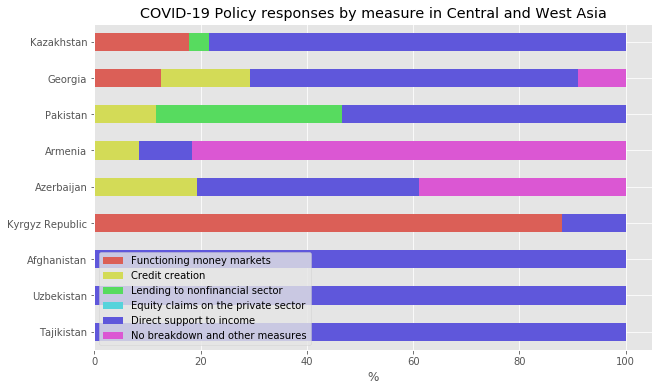

In [822]:
y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.iloc[:-1, :].plot(kind='barh', stacked=True, figsize=(10, 6), 
                         colormap=ListedColormap(sns.color_palette("hls")))
ax.set_title('COVID-19 Policy responses by measure in Central and West Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')
ax.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'])

plt.show()

In [823]:
y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 

In [824]:
y

m1_pkg     m2_pkg     m3_pkg    m4_pkg  \
country                                                                 
Hong Kong, China            67.807357   3.391036   0.000000  1.312008   
Mongolia                     5.390748   5.781814   8.319056  0.000000   
People's Republic of China  19.780505  20.528842   2.307724  1.318700   
Republic of Korea            7.538523   0.104460  45.022176  3.725737   
Taipei,China                16.000000   0.000000   0.000000  0.000000   

                               m5_pkg  m_others_pkg  
country                                              
Hong Kong, China            19.819397      7.670201  
Mongolia                    80.508382      0.000000  
People's Republic of China  55.970294      0.093936  
Republic of Korea           26.149797     17.459307  
Taipei,China                16.800000     67.200000

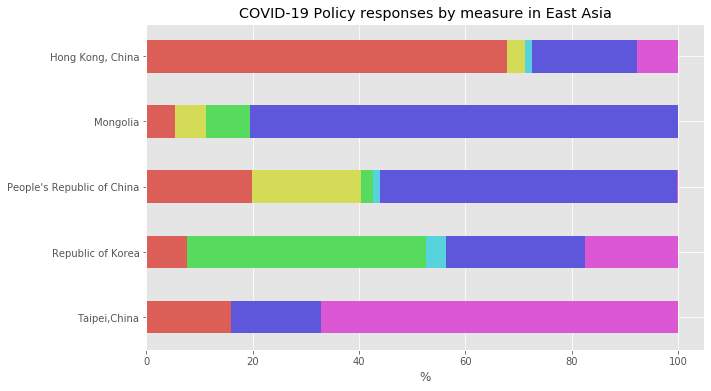

In [825]:
y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in East Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

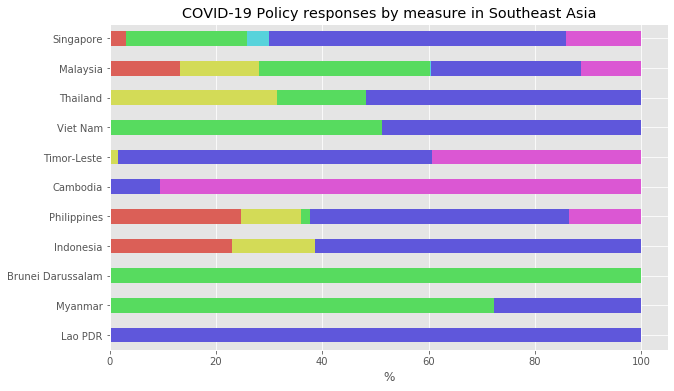

In [826]:
y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in Southeast Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

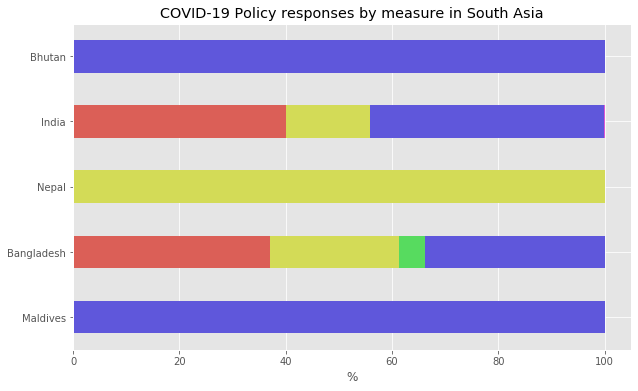

In [827]:
y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in South Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

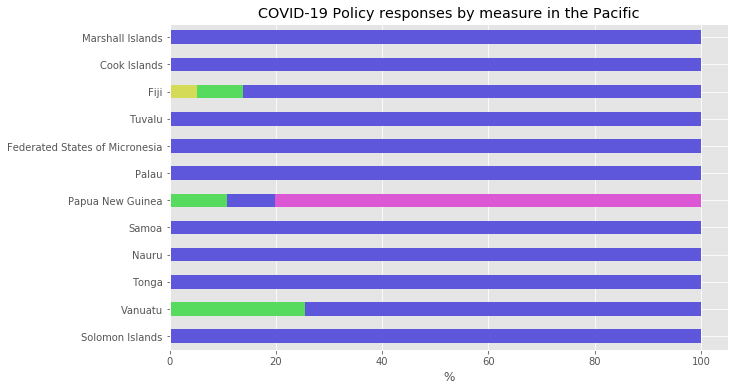

In [828]:
y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in the Pacific')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

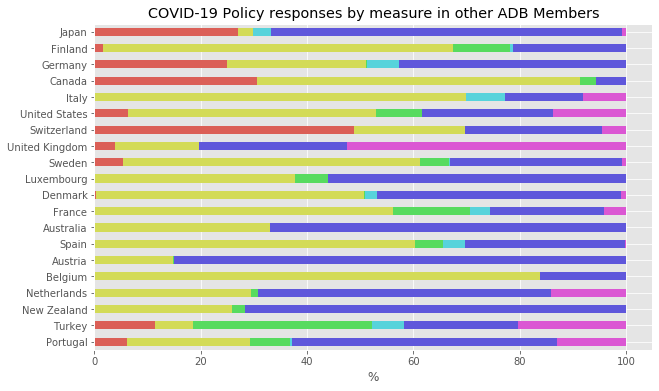

In [829]:
y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in other ADB Members')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

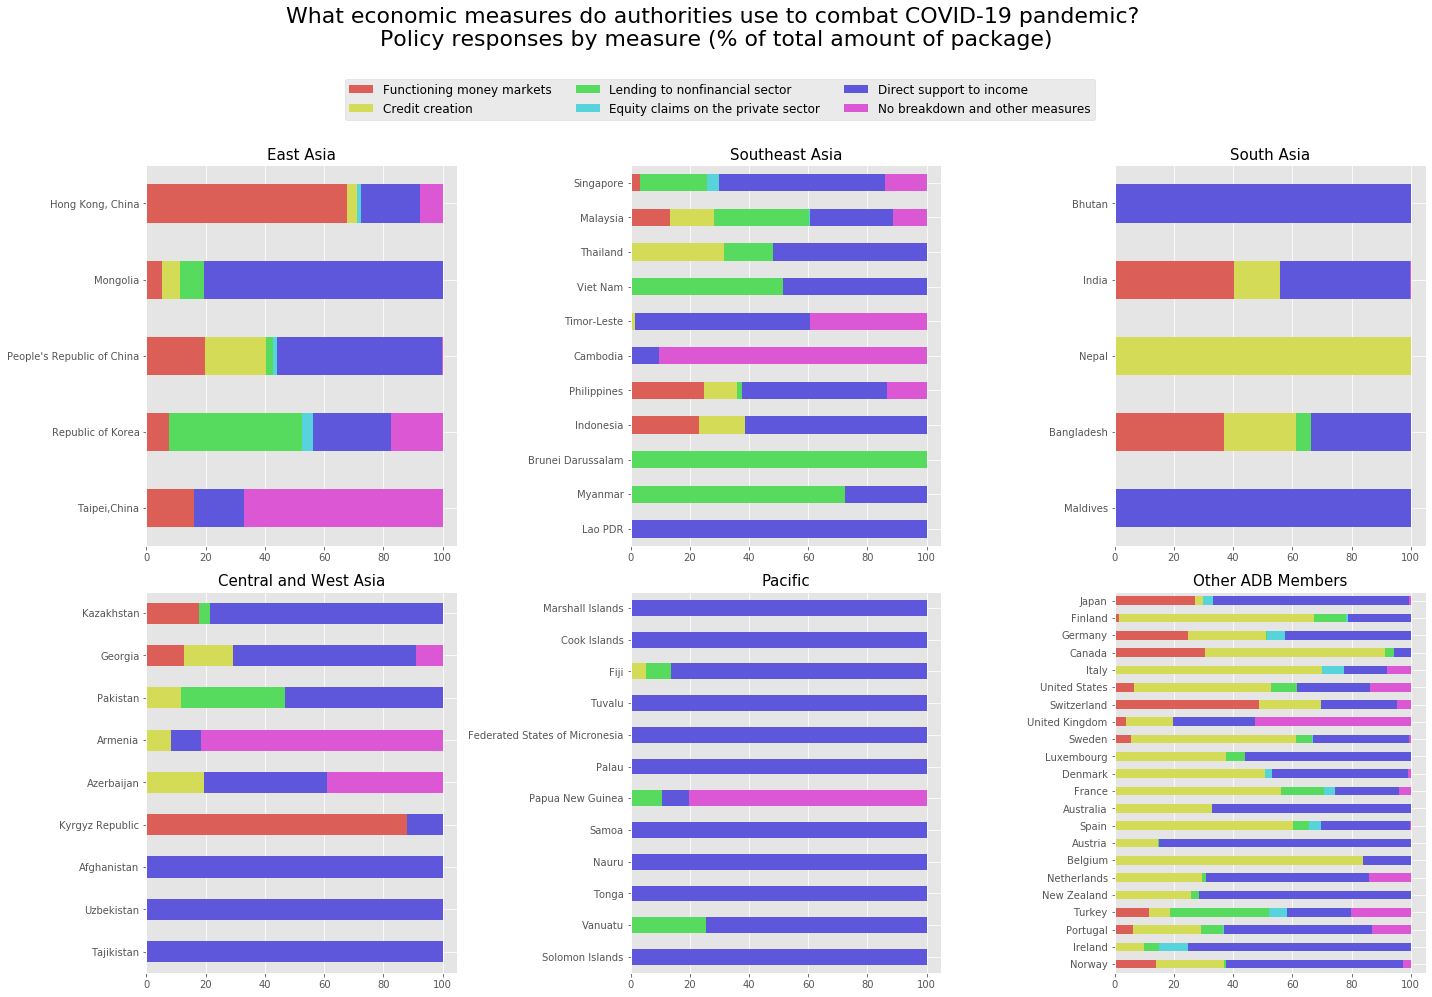

In [830]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 2], legend=None)
axs[0, 2].set_title('South Asia', fontsize=15)
axs[0, 2].invert_yaxis()
axs[0, 2].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('Central and West Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Pacific', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 2], legend=None)
axs[1, 2].set_title('Other ADB Members', fontsize=15)
axs[1, 2].invert_yaxis()
axs[1, 2].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

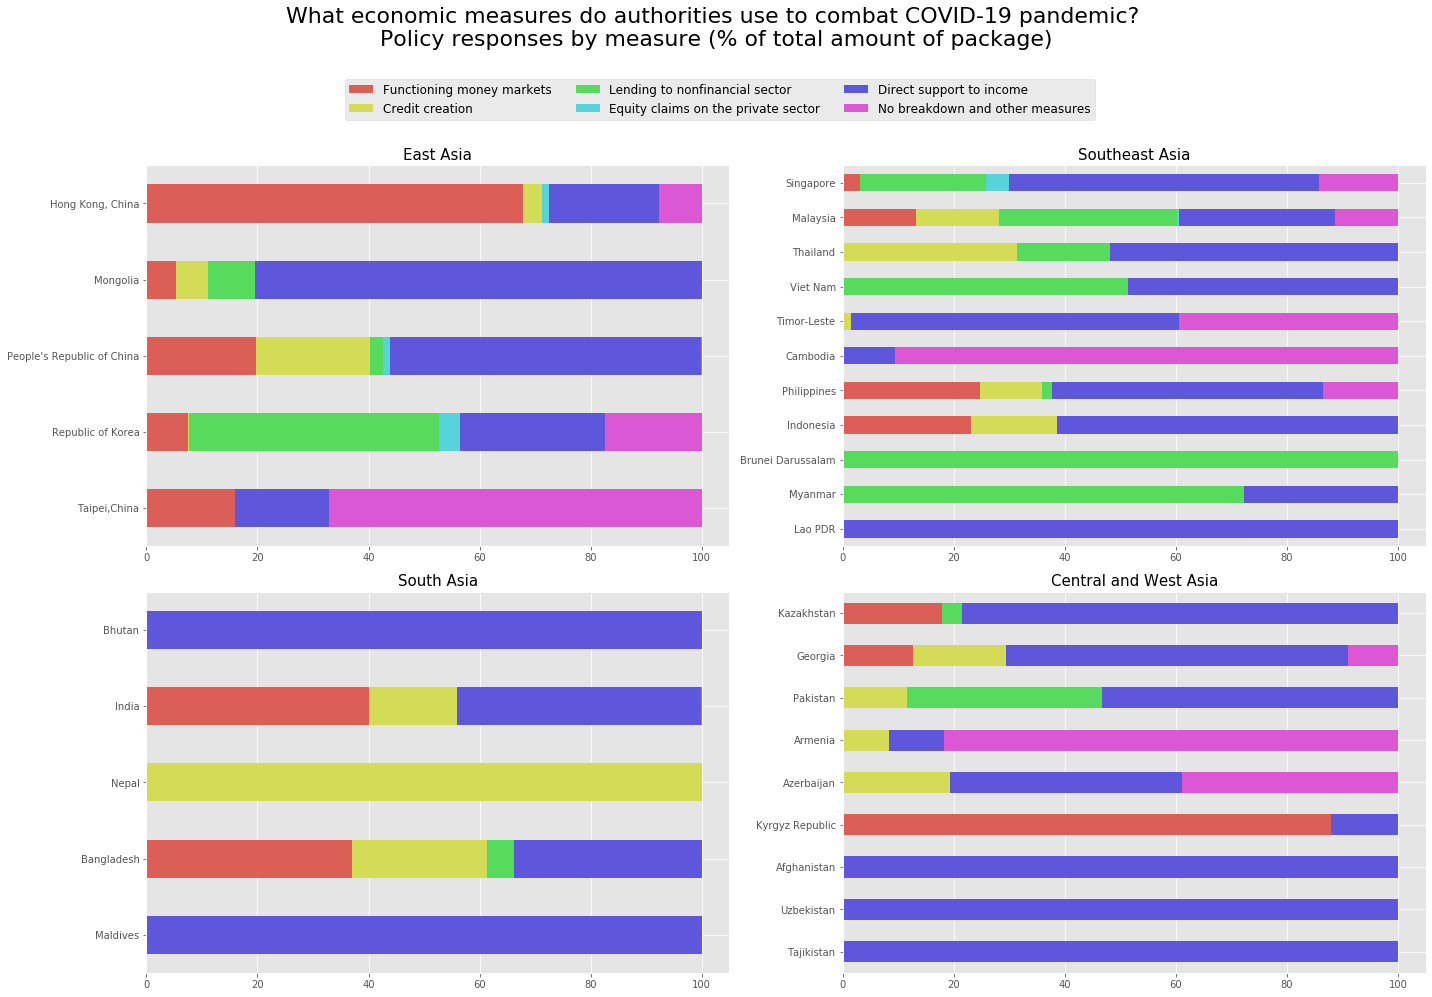

In [831]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

# y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[1, 1], legend=None)
# axs[1, 1].set_title('Pacific', fontsize=15)
# axs[1, 1].invert_yaxis()
# axs[1, 1].set_ylabel('')

# y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[1, 2], legend=None)
# axs[1, 2].set_title('Other ADB Members', fontsize=15)
# axs[1, 2].invert_yaxis()
# axs[1, 2].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

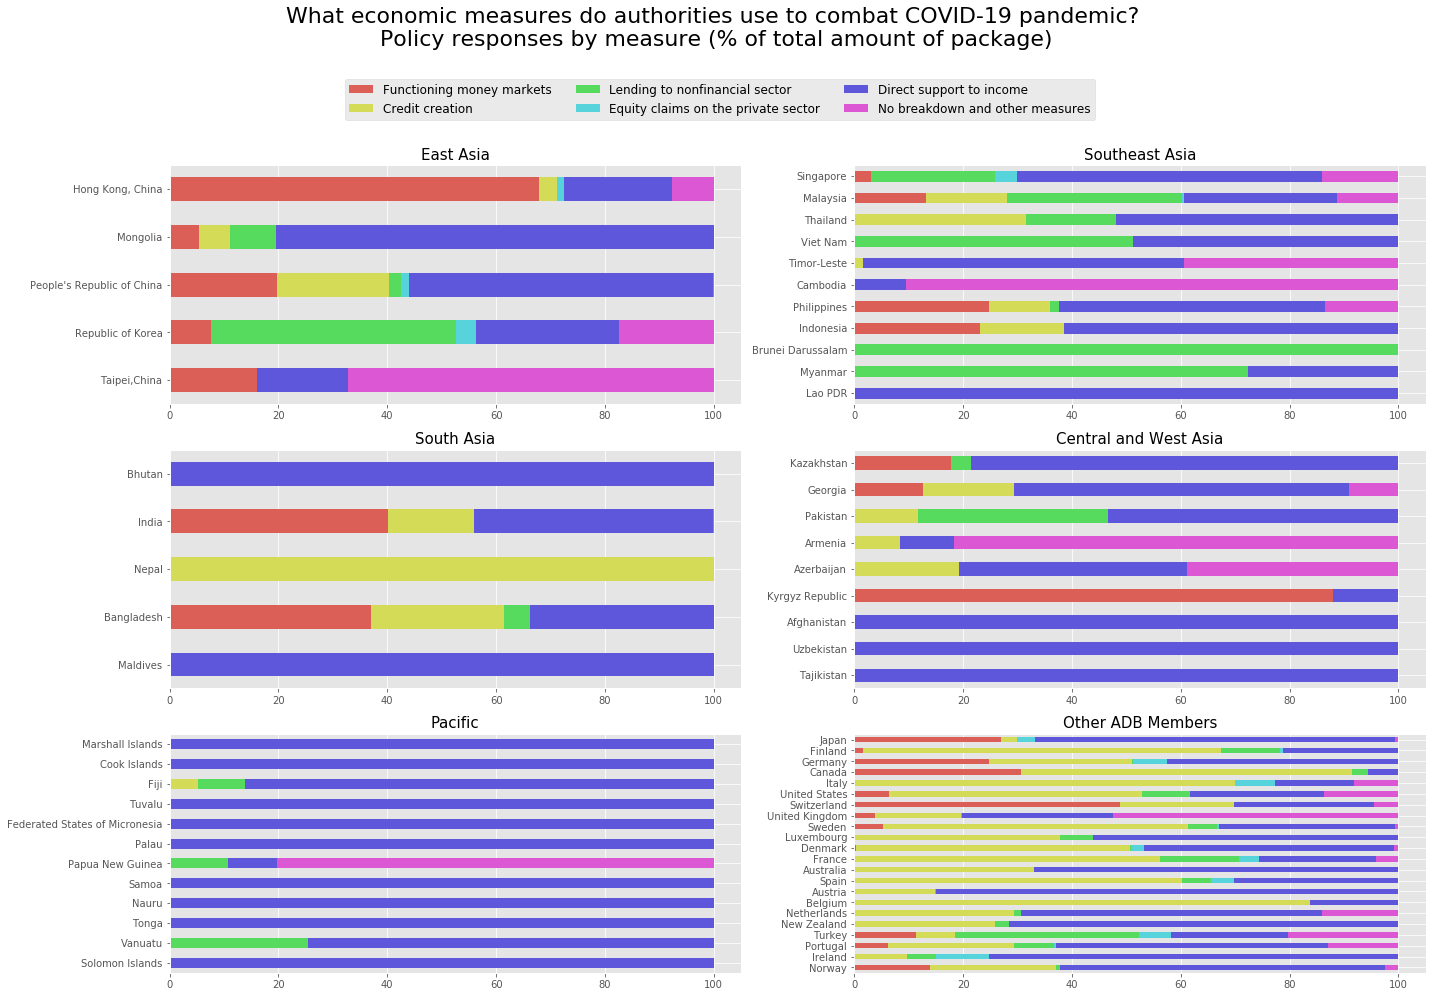

In [832]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 0], legend=None)
axs[2, 0].set_title('Pacific', fontsize=15)
axs[2, 0].invert_yaxis()
axs[2, 0].set_ylabel('')

y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 1], legend=None)
axs[2, 1].set_title('Other ADB Members', fontsize=15)
axs[2, 1].invert_yaxis()
axs[2, 1].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

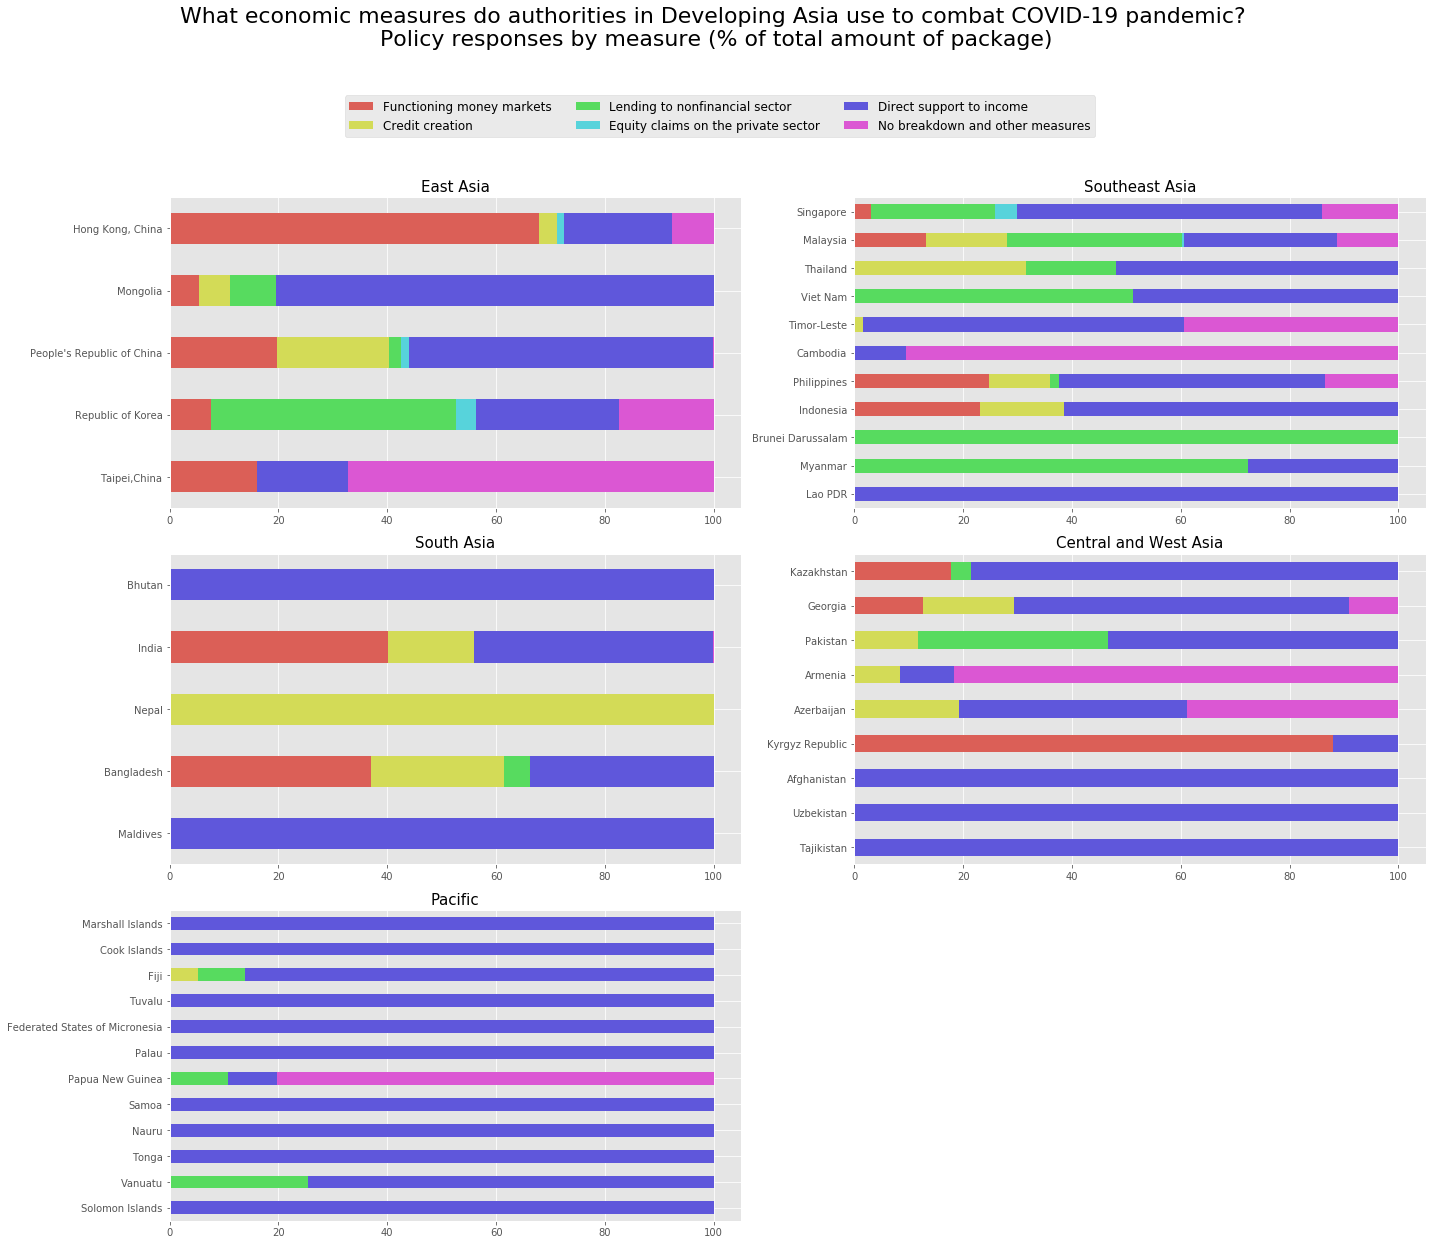

In [833]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 0], legend=None)
axs[2, 0].set_title('Pacific', fontsize=15)
axs[2, 0].invert_yaxis()
axs[2, 0].set_ylabel('')

axs[2,1].axis('off')

# y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[2, 1], legend=None)
# axs[2, 1].set_title('Other ADB Members', fontsize=15)
# axs[2, 1].invert_yaxis()
# axs[2, 1].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities in Developing Asia use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0, 0), xycoords='figure fraction',
#              xytext=(0, 0), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

In [834]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        488.847057  2.297000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.015578  1.442386   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  3.637857e+08  ...  13.534983  1.457536   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [835]:
df3.groupby(level=1).mean().sort_values(by='pkg_gdp',ascending=False).loc[:, 'pkg_gdp']

country
Japan                    66.559742
Finland                  53.617710
Germany                  52.652813
Hong Kong, China         51.316261
Canada                   35.278587
                           ...    
Turkmenistan              0.000000
Niue                      0.000000
Kiribati                  0.000000
European Central Bank          NaN
European Union                 NaN
Name: pkg_gdp, Length: 79, dtype: float64

In [836]:
pkg_gdp = df3.groupby(level=1).mean().sort_values(by='pkg_gdp',ascending=False).loc[:, 'pkg_gdp']

In [837]:
pkg_gdp = pkg_gdp[pkg_gdp > 0]

In [838]:
pkg_gdp

country
Japan               66.559742
Finland             53.617710
Germany             52.652813
Hong Kong, China    51.316261
Canada              35.278587
                      ...    
Afghanistan          0.542663
Myanmar              0.149475
Uzbekistan           0.053120
Lao PDR              0.041141
Tajikistan           0.015376
Name: pkg_gdp, Length: 74, dtype: float64

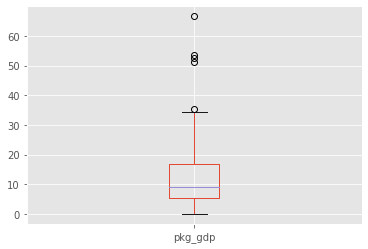

In [839]:
pkg_gdp.plot(kind='box')

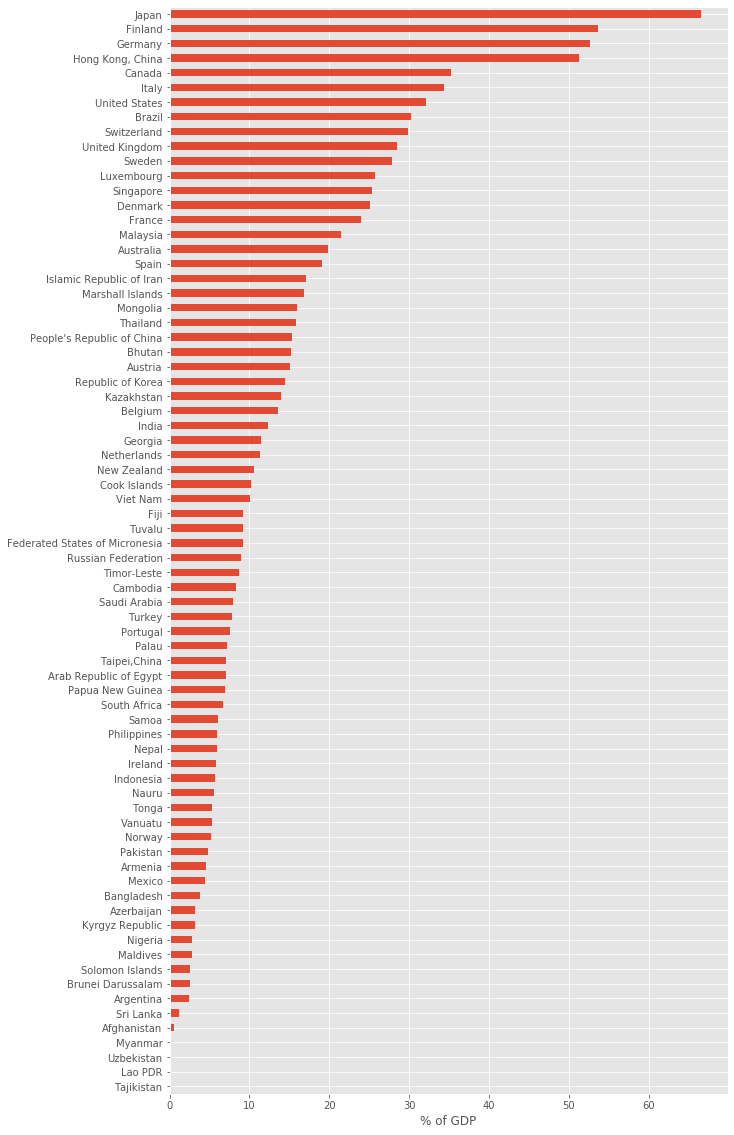

In [840]:
ax = pkg_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

In [841]:
pkg_usd = df3.groupby(level=1).mean().sort_values(by='amount_usd', ascending=False).loc[:, 'amount_usd']

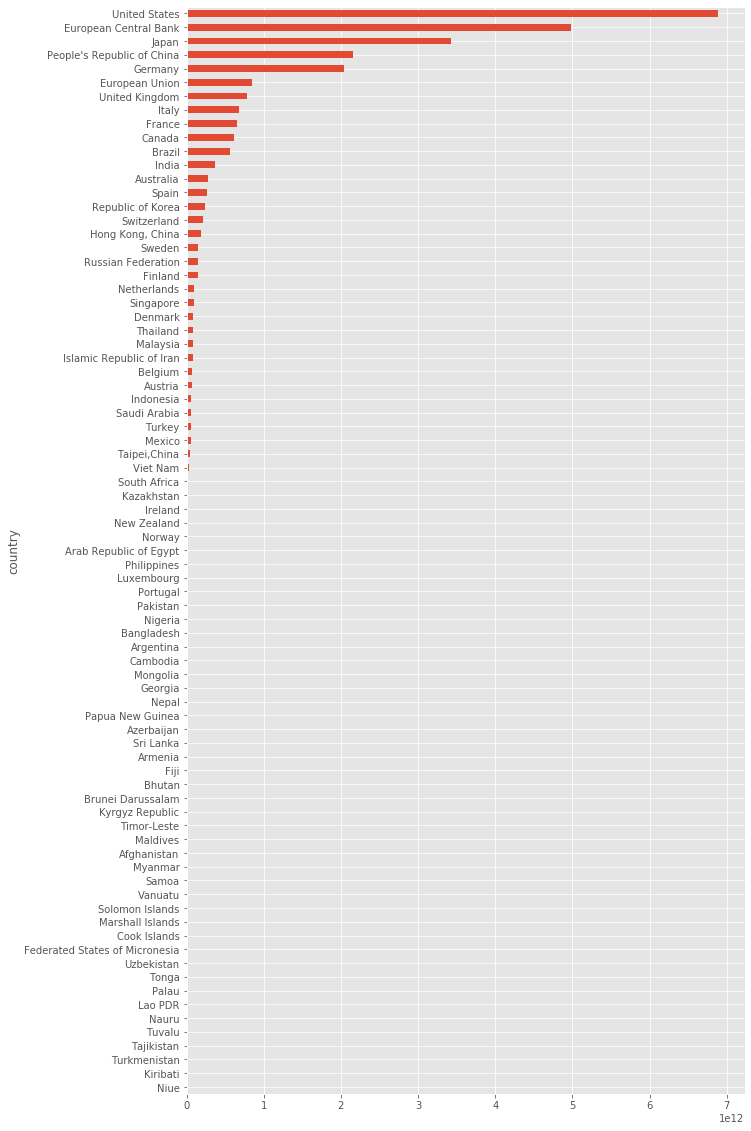

In [842]:
ax = pkg_usd.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()

In [843]:
pkg_gdp.index

Index(['Japan', 'Finland', 'Germany', 'Hong Kong, China', 'Canada', 'Italy',
       'United States', 'Brazil', 'Switzerland', 'United Kingdom', 'Sweden',
       'Luxembourg', 'Singapore', 'Denmark', 'France', 'Malaysia', 'Australia',
       'Spain', 'Islamic Republic of Iran', 'Marshall Islands', 'Mongolia',
       'Thailand', 'People's Republic of China', 'Bhutan', 'Austria',
       'Republic of Korea', 'Kazakhstan', 'Belgium', 'India', 'Georgia',
       'Netherlands', 'New Zealand', 'Cook Islands', 'Viet Nam', 'Fiji',
       'Tuvalu', 'Federated States of Micronesia', 'Russian Federation',
       'Timor-Leste', 'Cambodia', 'Saudi Arabia', 'Turkey', 'Portugal',
       'Palau', 'Taipei,China', 'Arab Republic of Egypt', 'Papua New Guinea',
       'South Africa', 'Samoa', 'Philippines', 'Nepal', 'Ireland', 'Indonesia',
       'Nauru', 'Tonga', 'Vanuatu', 'Norway', 'Pakistan', 'Armenia', 'Mexico',
       'Bangladesh', 'Azerbaijan', 'Kyrgyz Republic', 'Nigeria', 'Maldives',
       'Solomon

In [844]:
pkg_usd.index

Index(['United States', 'European Central Bank', 'Japan',
       'People's Republic of China', 'Germany', 'European Union',
       'United Kingdom', 'Italy', 'France', 'Canada', 'Brazil', 'India',
       'Australia', 'Spain', 'Republic of Korea', 'Switzerland',
       'Hong Kong, China', 'Sweden', 'Russian Federation', 'Finland',
       'Netherlands', 'Singapore', 'Denmark', 'Thailand', 'Malaysia',
       'Islamic Republic of Iran', 'Belgium', 'Austria', 'Indonesia',
       'Saudi Arabia', 'Turkey', 'Mexico', 'Taipei,China', 'Viet Nam',
       'South Africa', 'Kazakhstan', 'Ireland', 'New Zealand', 'Norway',
       'Arab Republic of Egypt', 'Philippines', 'Luxembourg', 'Portugal',
       'Pakistan', 'Nigeria', 'Bangladesh', 'Argentina', 'Cambodia',
       'Mongolia', 'Georgia', 'Nepal', 'Papua New Guinea', 'Azerbaijan',
       'Sri Lanka', 'Armenia', 'Fiji', 'Bhutan', 'Brunei Darussalam',
       'Kyrgyz Republic', 'Timor-Leste', 'Maldives', 'Afghanistan', 'Myanmar',
       'Samoa', 'Va

In [845]:
pkg_usd.index.isin(pkg_gdp.index)

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False])

In [846]:
mask = pkg_usd.index.isin(pkg_gdp.index)

In [847]:
pkg_usd = pkg_usd[mask]

In [848]:
pkg_usd

country
United States                 6.885716e+12
Japan                         3.430809e+12
People's Republic of China    2.161057e+12
Germany                       2.034157e+12
United Kingdom                7.805823e+11
                                  ...     
Palau                         2.091681e+07
Lao PDR                       7.869126e+06
Nauru                         6.072931e+06
Tuvalu                        3.863318e+06
Tajikistan                    1.253464e+06
Name: amount_usd, Length: 74, dtype: float64

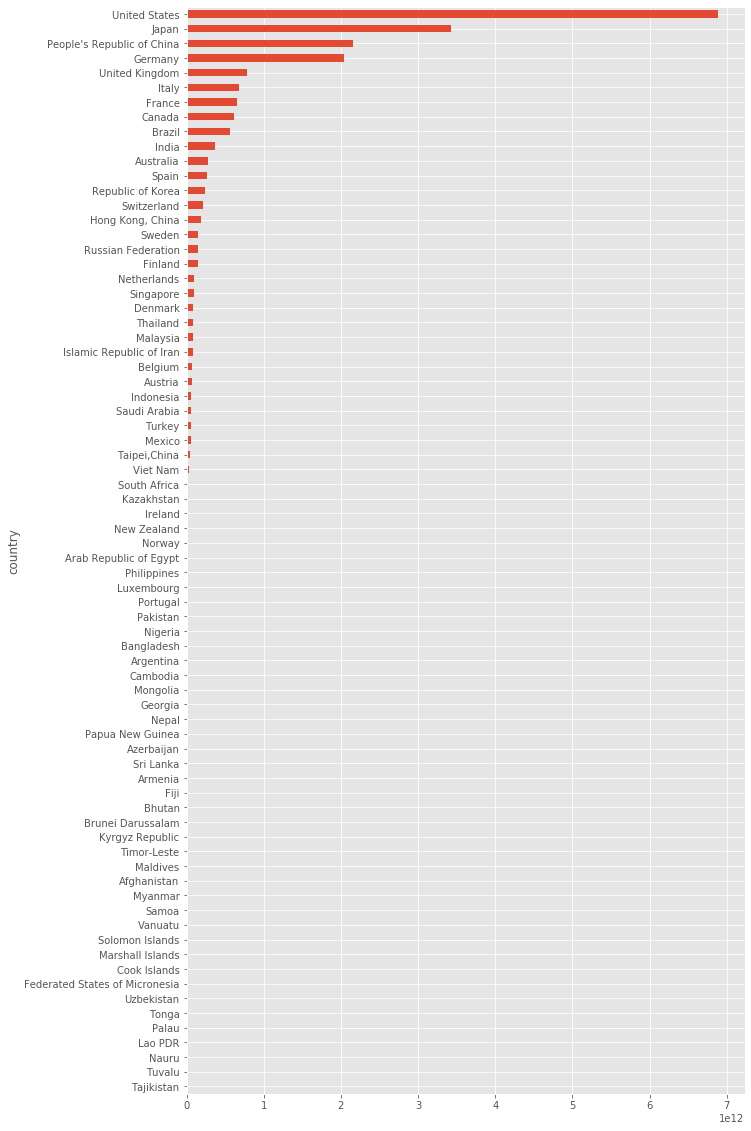

In [849]:
ax = pkg_usd.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()

In [850]:
m1_gdp = df3.groupby(level=1).mean().loc[:, 'm1_gdp'].sort_values(ascending=False)
m1_gdp = m1_gdp[m1_gdp > 0]

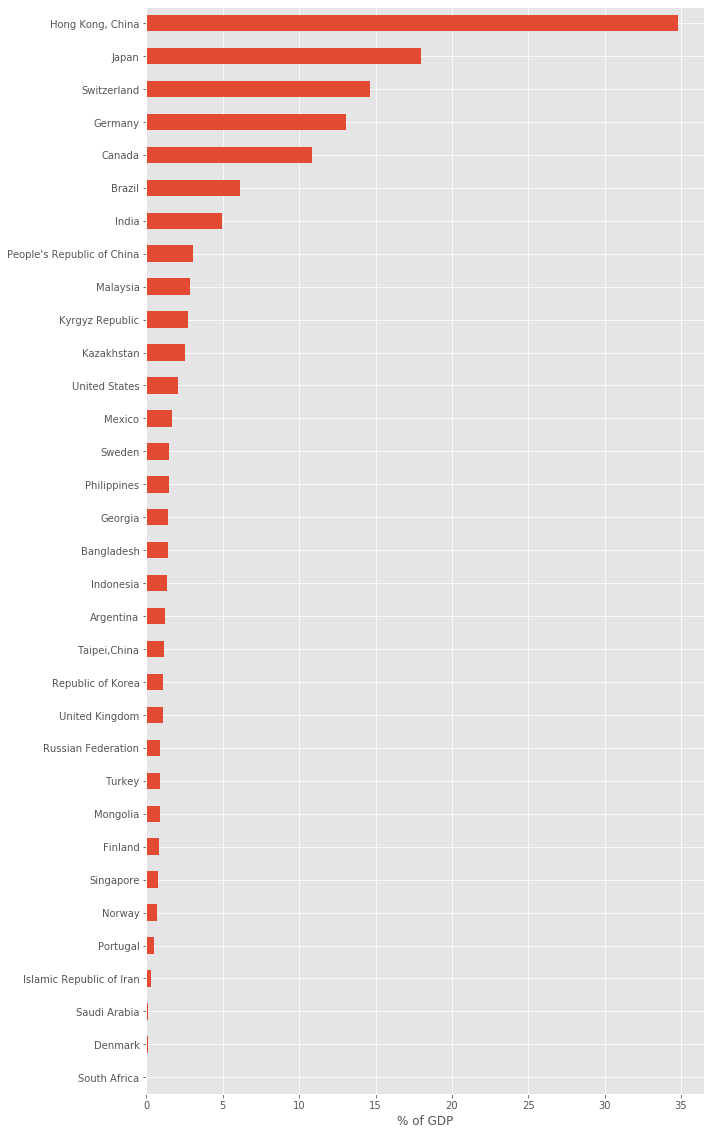

In [851]:
ax = m1_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


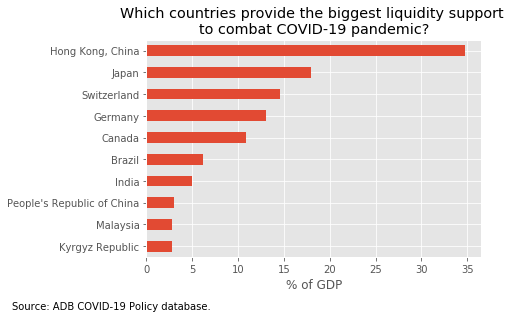

In [852]:
ax = m1_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest liquidity support \nto combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.4, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [853]:
mask = df3.reset_index(level=0)['region'].isin(['Other Economies', 'Other ADB Members', 'Others'])
df3.reset_index(level=0)[~mask]

region    amount_lcy  \
country                                                               
Afghanistan                     Central and West Asia  8.000000e+09   
Armenia                         Central and West Asia  3.000000e+11   
Azerbaijan                      Central and West Asia  2.593500e+09   
Georgia                         Central and West Asia  5.545956e+09   
Kazakhstan                      Central and West Asia  9.810000e+12   
Kyrgyz Republic                 Central and West Asia  1.924826e+10   
Pakistan                        Central and West Asia  2.250135e+12   
Tajikistan                      Central and West Asia  1.240000e+07   
Turkmenistan                    Central and West Asia  0.000000e+00   
Uzbekistan                      Central and West Asia  3.070000e+11   
Hong Kong, China                            East Asia  1.486270e+12   
Mongolia                                    East Asia  6.010294e+12   
People's Republic of China                  East Asia  1.516643e+13   
Republic of Korea                           East Asia  2.871916e+14   
Taipei,China                                East Asia  1.250000e+12   
Cook Islands                                  Pacific  6.100000e+07   
Federated States of Micronesia                Pacific  3.500000e+07   
Fiji                                          Pacific  1.160000e+09   
Kiribati                                      Pacific  0.000000e+00   
Marshall Islands                              Pacific  3.700000e+07   
Nauru                                         Pacific  9.100000e+06   
Niue                                          Pacific  0.000000e+00   
Palau                                         Pacific  2.091681e+07   
Papua New Guinea                              Pacific  5.600000e+09   
Samoa                                         Pacific  1.494000e+08   
Solomon Islands                               Pacific  3.090000e+08   
Tonga                                         Pacific  6.000000e+07   
Tuvalu                                        Pacific  5.789000e+06   
Vanuatu                                       Pacific  5.900000e+09   
Bangladesh                                 South Asia  1.026065e+12   
Bhutan                                     South Asia  3.200000e+10   
India                                      South Asia  2.695238e+13   
Maldives                                   South Asia  2.500000e+09   
Nepal                                      South Asia  2.000000e+11   
Sri Lanka                                  South Asia  1.914739e+11   
Brunei Darussalam                      Southeast Asia  4.500000e+08   
Cambodia                               Southeast Asia  8.963262e+12   
Indonesia                              Southeast Asia  9.639560e+14   
Lao PDR                                Southeast Asia  7.000000e+10   
Malaysia                               Southeast Asia  3.370000e+11   
Myanmar                                Southeast Asia  1.383000e+11   
Philippines                            Southeast Asia  1.071298e+12   
Singapore                              Southeast Asia  1.304905e+11   
Thailand                               Southeast Asia  2.700000e+12   
Timor-Leste                            Southeast Asia  2.540000e+08   
Viet Nam                               Southeast Asia  6.158000e+14   

                                  amount_usd       gdp_lcy       gdp_usd  \
country                                                                    
Afghanistan                     1.016625e+08  1.502470e+12  1.873400e+10   
Armenia                         6.134861e+08  6.541000e+12  1.344400e+10   
Azerbaijan                      1.525588e+09  8.019100e+10  4.717100e+10   
Georgia                         1.823888e+09  4.474900e+10  1.592500e+10   
Kazakhstan                      2.379624e+10  6.543920e+13  1.703260e+11   
Kyrgyz Republic                 2.580000e+08  5.856010e+11  8.261000e+09   
Pakistan                      

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


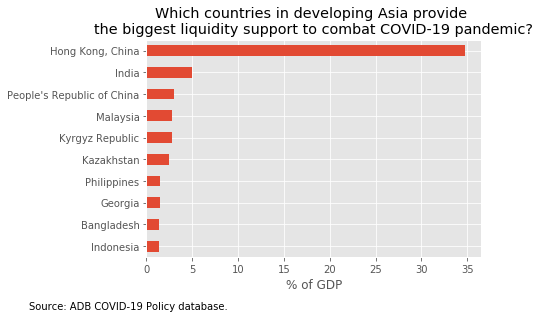

In [854]:
m1_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm1_gdp'].sort_values(ascending=False)
m1_gdp_asia = m1_gdp_asia[m1_gdp_asia > 0]
m1_gdp_asia

ax = m1_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide \nthe biggest liquidity support to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

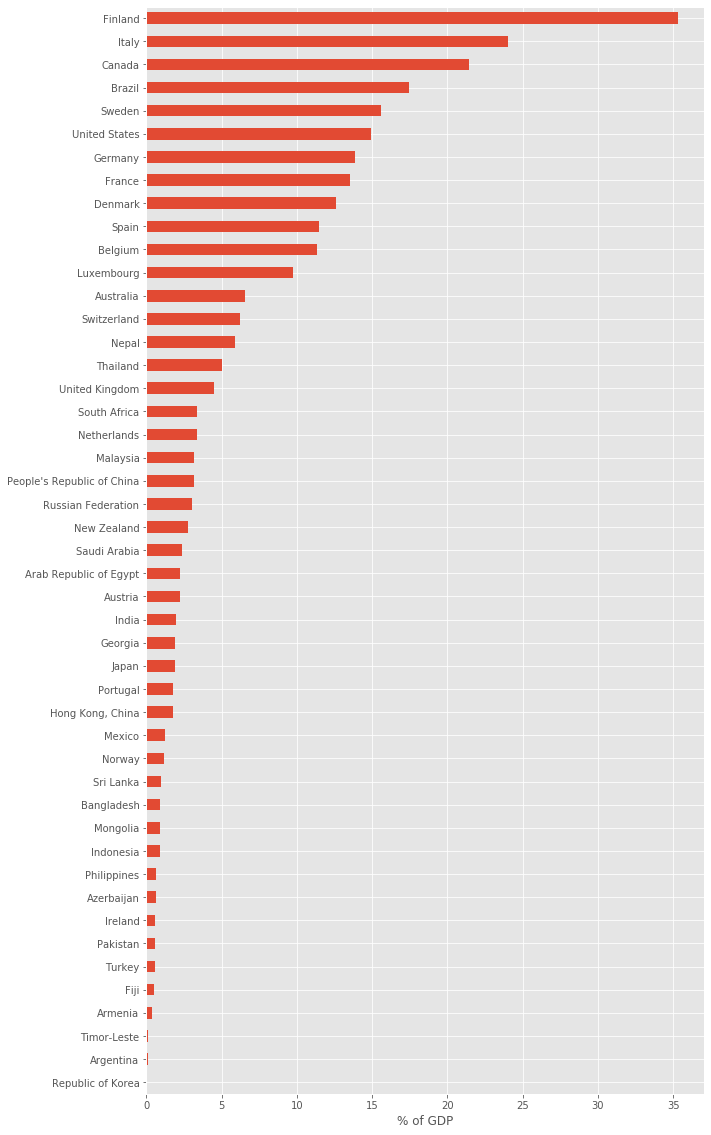

In [855]:
m2_gdp = df3.groupby(level=1).mean().loc[:, 'm2_gdp'].sort_values(ascending=False)
m2_gdp = m2_gdp[m2_gdp > 0]
ax = m2_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


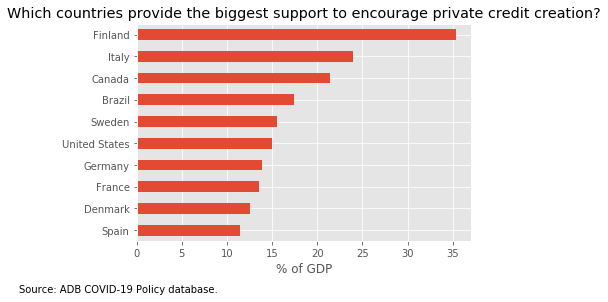

In [856]:
ax = m2_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest support to encourage private credit creation?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


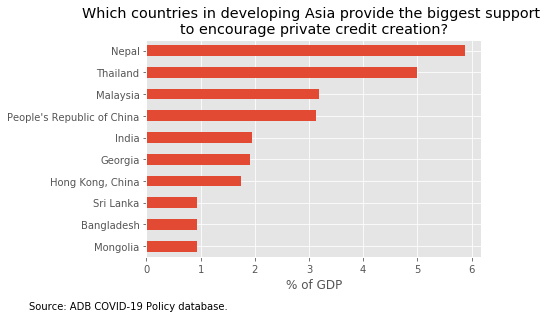

In [857]:
m2_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm2_gdp'].sort_values(ascending=False)
m2_gdp_asia = m2_gdp_asia[m2_gdp_asia > 0]
m2_gdp_asia

ax = m2_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest support \nto encourage private credit creation?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

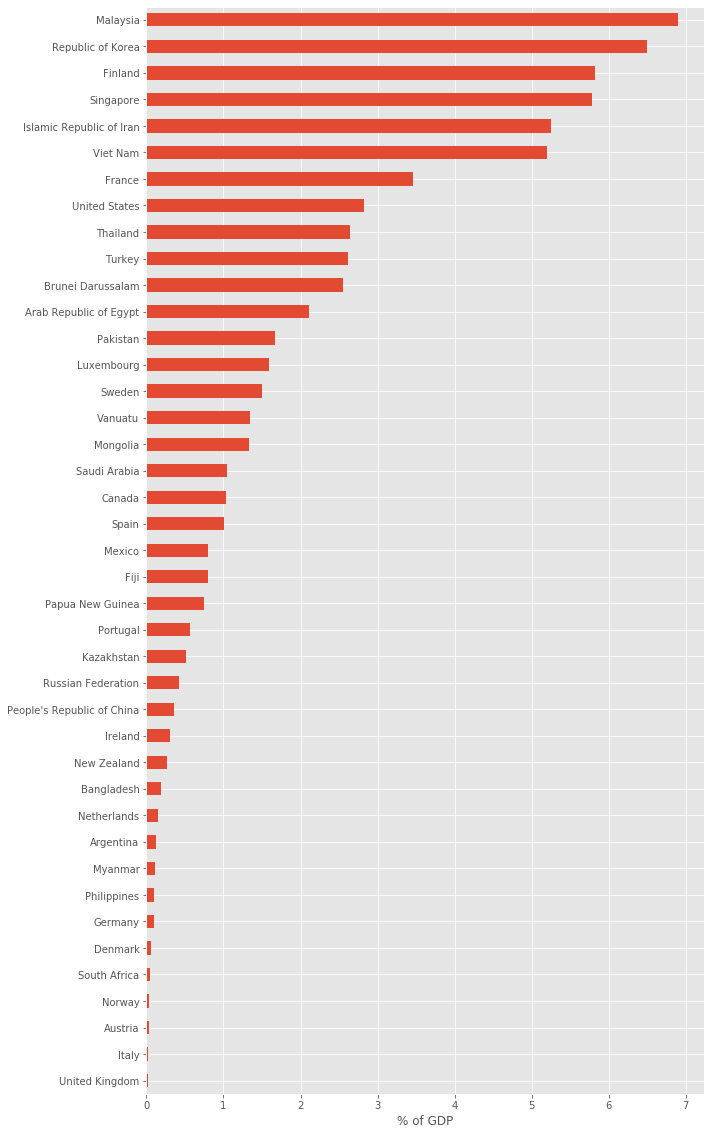

In [858]:
m3_gdp = df3.groupby(level=1).mean().loc[:, 'm3_gdp'].sort_values(ascending=False)
m3_gdp = m3_gdp[m3_gdp > 0]
ax = m3_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


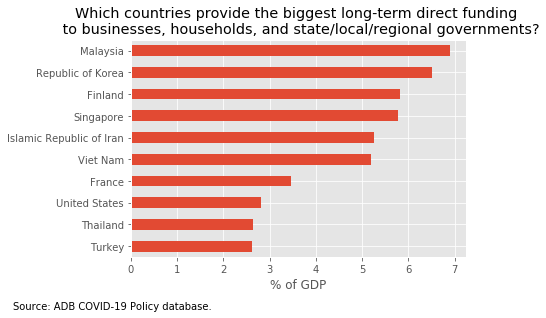

In [859]:
ax = m3_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest long-term direct funding \n to businesses, households, and state/local/regional governments?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
# plt.tight_layout()
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


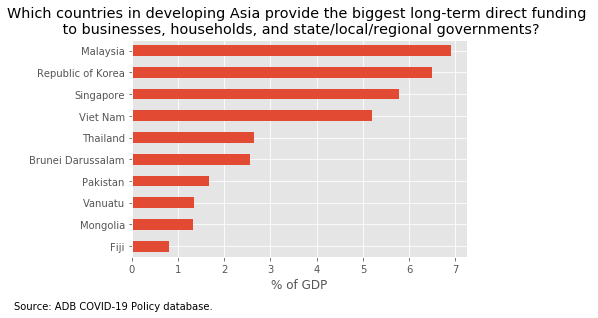

In [860]:
m3_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm3_gdp'].sort_values(ascending=False)
m3_gdp_asia = m3_gdp_asia[m3_gdp_asia > 0]
m3_gdp_asia

ax = m3_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest long-term direct funding \n to businesses, households, and state/local/regional governments?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

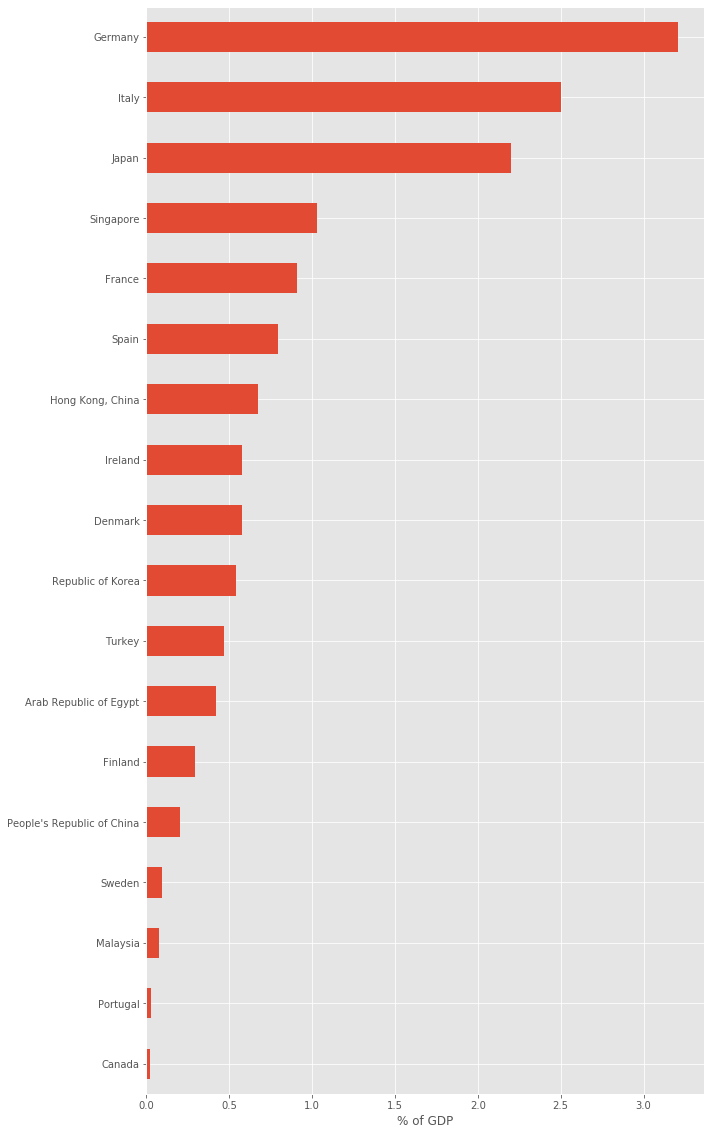

In [861]:
m4_gdp = df3.groupby(level=1).mean().loc[:, 'm4_gdp'].sort_values(ascending=False)
m4_gdp = m4_gdp[m4_gdp > 0]
ax = m4_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


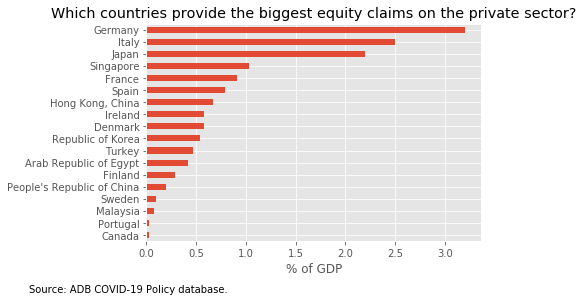

In [862]:
ax = m4_gdp.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest equity claims on the private sector?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
# plt.tight_layout()
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


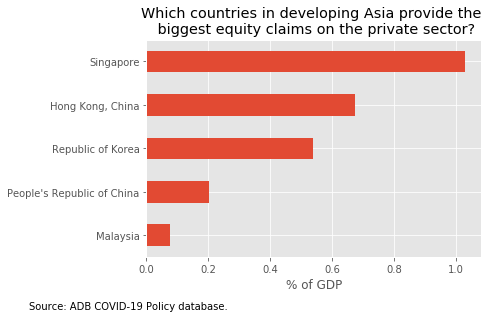

In [863]:
m4_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm4_gdp'].sort_values(ascending=False)
m4_gdp_asia = m4_gdp_asia[m4_gdp_asia > 0]
m4_gdp_asia

ax = m4_gdp_asia.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the \n biggest equity claims on the private sector?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

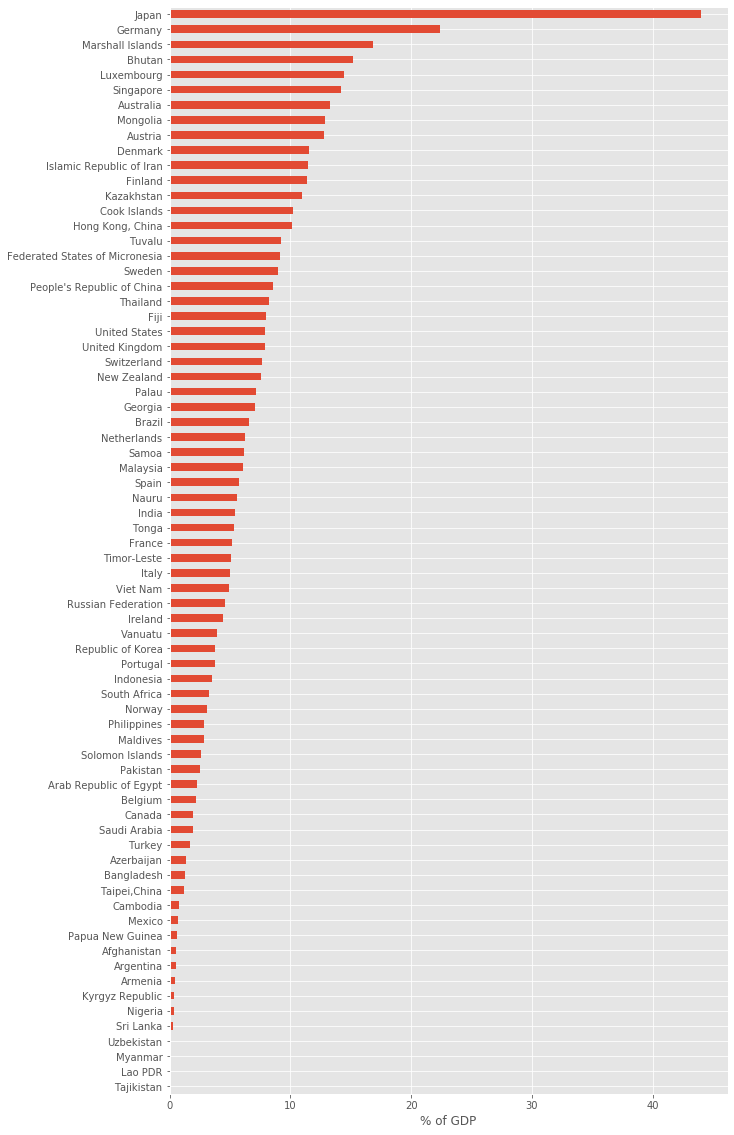

In [864]:
m5_gdp = df3.groupby(level=1).mean().loc[:, 'm5_gdp'].sort_values(ascending=False)
m5_gdp = m5_gdp[m5_gdp > 0]
ax = m5_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


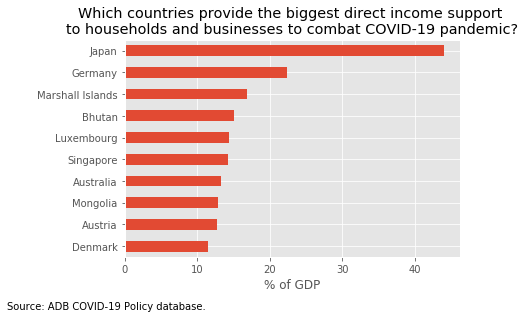

In [865]:
ax = m5_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest direct income support \nto households and businesses to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


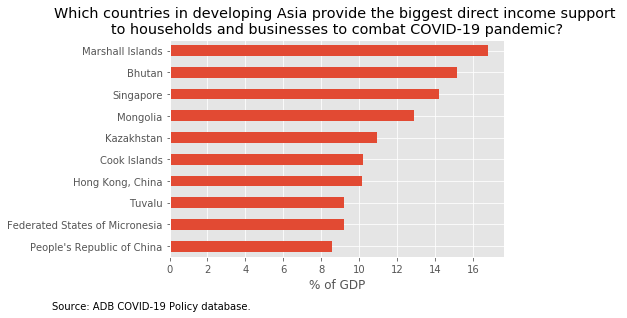

In [866]:
m5_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm5_gdp'].sort_values(ascending=False)
m5_gdp_asia = m5_gdp_asia[m5_gdp_asia > 0]
m5_gdp_asia

ax = m5_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest direct income support \nto households and businesses to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

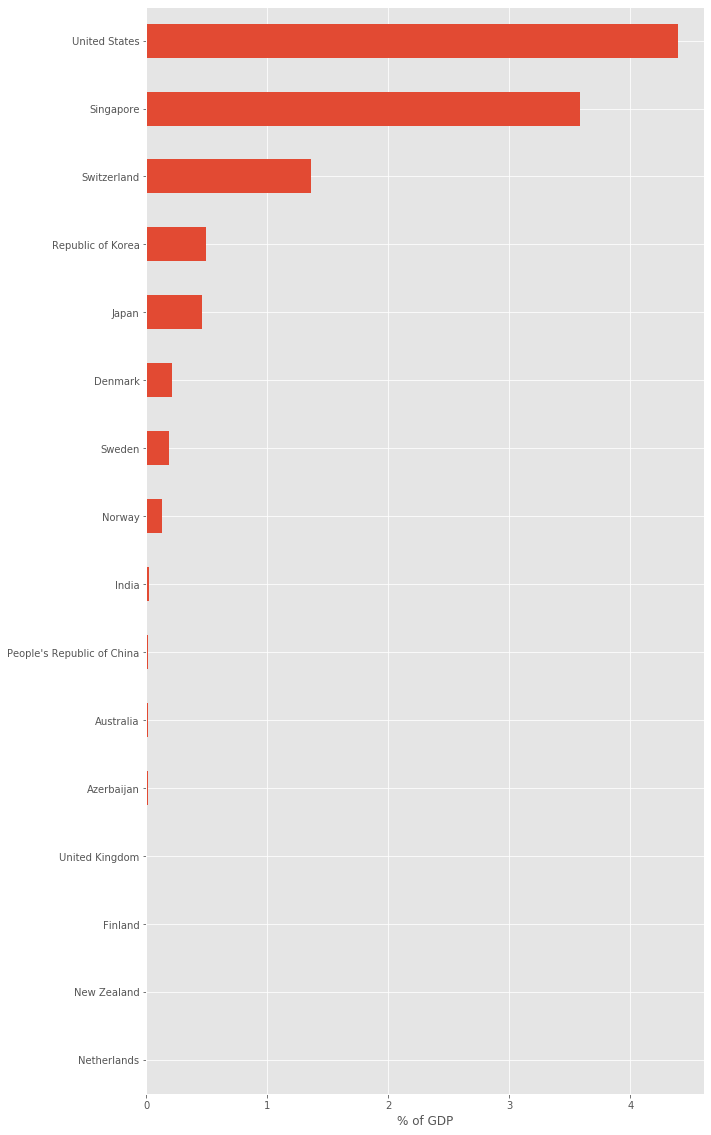

In [867]:
m9_gdp = df3.groupby(level=1).mean().loc[:, 'm9_gdp'].sort_values(ascending=False)
m9_gdp = m9_gdp[m9_gdp > 0]
ax = m9_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


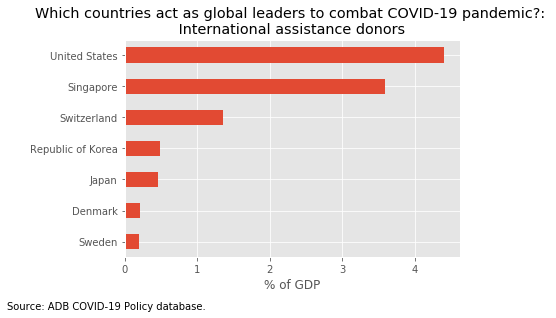

In [868]:
ax = m9_gdp.head(7).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries act as global leaders to combat COVID-19 pandemic?: \n International assistance donors ',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


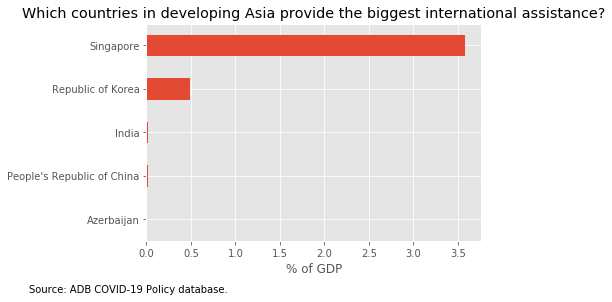

In [869]:
m9_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm9_gdp'].sort_values(ascending=False)
m9_gdp_asia = m9_gdp_asia[m9_gdp_asia > 0]
m9_gdp_asia

ax = m9_gdp_asia.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest international assistance?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

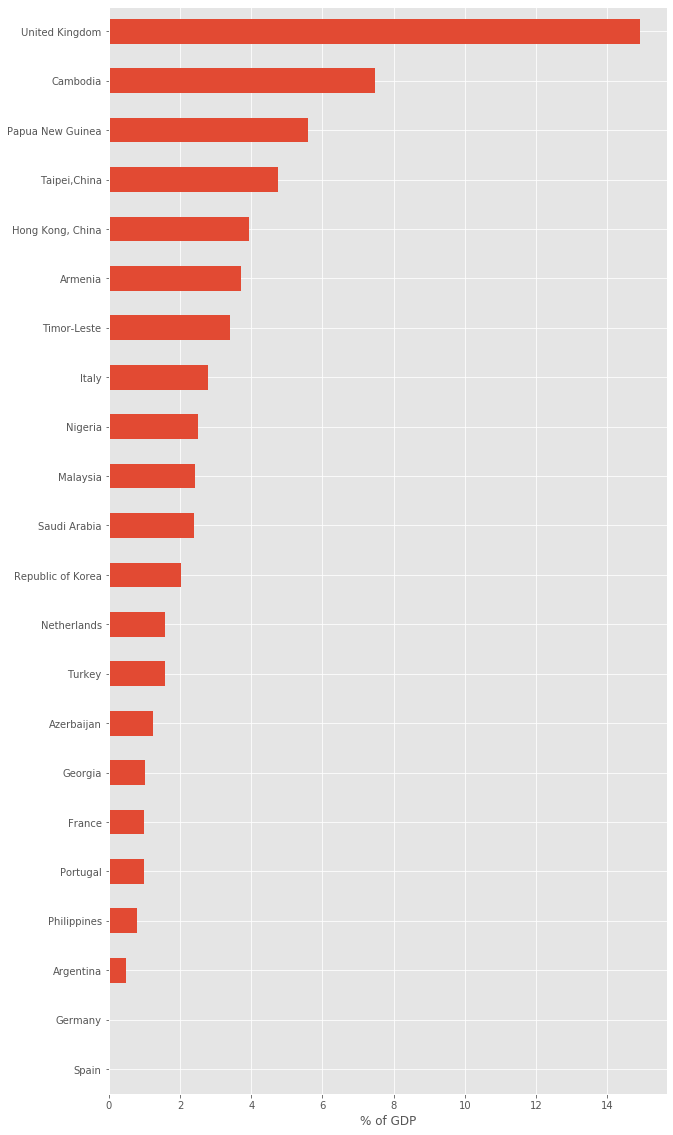

In [870]:
m10_gdp = df3.groupby(level=1).mean().loc[:, 'm10_gdp'].sort_values(ascending=False)
m10_gdp = m10_gdp[m10_gdp > 0]
ax = m10_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  """


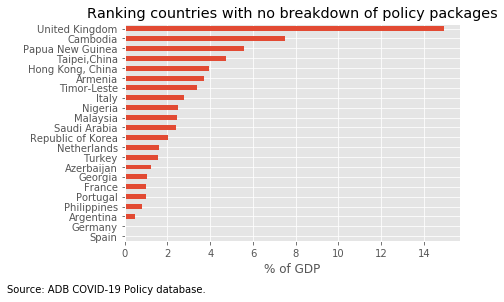

In [871]:
ax = m10_gdp.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Ranking countries with no breakdown of policy packages',  ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [872]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.545956e+09  1.823888e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.452988   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        488.847057  2.297000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.015578  1.442386   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  3.637857e+08  ...  13.534983  1.457536   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [873]:
df3.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

In [874]:
df3.groupby(level=0).sum()

amount_lcy    amount_usd       gdp_lcy       gdp_usd  \
region                                                                          
Central and West Asia  1.270254e+13  4.171278e+10  6.363661e+14  6.733910e+11   
East Asia              3.111046e+14  2.631514e+12  2.067429e+15  1.674246e+13   
Other ADB Members      3.834398e+14  1.660591e+13  6.132379e+14  4.818727e+13   
Other Economies        3.300998e+15  9.686523e+11  2.330315e+16  7.549986e+12   
Others                 5.270135e+12  5.829794e+12  0.000000e+00  0.000000e+00   
Pacific                1.334721e+10  2.479101e+09  2.162848e+11  3.469767e+10   
South Asia             2.840442e+13  3.781328e+11  2.556299e+14  3.378042e+12   
Southeast Asia         1.593167e+15  3.685405e+11  2.257556e+16  3.114703e+12   

                               popn     pkg_gdp     pkg_pc_usd            m1  \
region                                                                         
Central and West Asia  3.385120e+08   41.726928    2260.737563  4.701697e+09   
East Asia              1.478575e+09  104.111483   34245.154750  5.817540e+11   
Other ADB Members      1.015085e+09  551.288835  283977.924382  2.215601e+12   
Other Economies        9.922108e+08   87.482088    7843.369982  1.571946e+11   
Others                 0.000000e+00    0.000000       0.000000  1.106195e+10   
Pacific                1.108472e+07   93.795397    6389.449841  0.000000e+00   
South Asia             1.565001e+09   41.202361    1339.408759  1.500592e+11   
Southeast Asia         6.551682e+08  104.149181   21829.493805  3.304508e+10   

                                 m2            m3  ...     m10_pkg     m1_gdp  \
region                                             ...                          
Central and West Asia  2.232543e+09  5.620482e+09  ...  129.240178   6.682515   
East Asia              4.505025e+11  1.560286e+11  ...   88.944433  40.902657   
Other ADB Members      5.815320e+12  7.849453e+11  ...  112.169260  64.117374   
Other Economies        4.255143e+11  5.642045e+10  ...  137.482904  10.387048   
Others                 4.997054e+12  5.223780e+11  ...    0.000000   0.000000   
Pacific                2.722817e+07  2.342255e+08  ...   80.178571   0.000000   
South Asia             6.274884e+10  5.885815e+08  ...    0.000000   6.368421   
Southeast Asia         5.034596e+10  7.453491e+10  ...  154.692918   6.394675   

                           m2_gdp     m3_gdp     m4_gdp      m5_gdp    m9_gdp  \
region                                                                          
Central and West Asia    3.480766   2.182997   0.000000   23.363799  0.010600   
East Asia                5.817124   8.186280   1.412995   36.563389  0.503332   
Other ADB Members      215.252273  21.433822  11.669904  209.152642  6.766527   
Other Economies         29.790494   9.802145   0.421058   31.694459  0.000000   
Others                   0.000000   0.000000   0.000000    0.000000  0.000000   
Pacific                  0.477018   2.882050   0.000000   84.849364  0.000000   
South Asia               9.698921   0.185400   0.000000   24.930883  0.018736   
Southeast Asia           9.873759  23.287925   1.107734   45.793248  3.583064   

                         m10_gdp  m_others_gdp  m_others_pkg  
region                                                        
Central and West Asia   6.006251      6.016851    129.567920  
East Asia              10.725707     11.229038     92.423444  
Other ADB Members      22.896294     29.662821    135.232633  
Other Economies         5.386886      5.386886    137.482904  
Others                  0.000000      0.000000      3.821789  
Pacific                 5.586966      5.586966     80.178571  
South Asia              0.000000      0.018736      0.151652  
Southeast Asia         14.108777     17.691840    168.804673  

[8 rows x 30 columns]

In [875]:
regional_sum = df3.groupby(level=0).sum()

In [876]:
regional_sum = regional_sum.assign(m1_usd_region = lambda x: 100 * x.m1 / x.amount_usd)
regional_sum = regional_sum.assign(m2_usd_region = lambda x: 100 * x.m2 / x.amount_usd)
regional_sum = regional_sum.assign(m3_usd_region = lambda x: 100 * x.m3 / x.amount_usd)
regional_sum = regional_sum.assign(m4_usd_region = lambda x: 100 * x.m4 / x.amount_usd)
regional_sum = regional_sum.assign(m5_usd_region = lambda x: 100 * x.m5 / x.amount_usd)
regional_sum = regional_sum.assign(m9_usd_region = lambda x: 100 * x.m9 / x.amount_usd)
regional_sum = regional_sum.assign(m10_usd_region = lambda x: 100 * x.m10 / x.amount_usd)

In [877]:
regional_sum = regional_sum.assign(m9_m10_usd_region = lambda x: 100 * (x.m9 + x.m10) / x.amount_usd)

In [878]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]].sum(axis=1)

region
Central and West Asia    100.0
East Asia                100.0
Other ADB Members        100.0
Other Economies          100.0
Others                   100.0
Pacific                  100.0
South Asia               100.0
Southeast Asia           100.0
dtype: float64

In [879]:
regional_sum

amount_lcy    amount_usd       gdp_lcy       gdp_usd  \
region                                                                          
Central and West Asia  1.270254e+13  4.171278e+10  6.363661e+14  6.733910e+11   
East Asia              3.111046e+14  2.631514e+12  2.067429e+15  1.674246e+13   
Other ADB Members      3.834398e+14  1.660591e+13  6.132379e+14  4.818727e+13   
Other Economies        3.300998e+15  9.686523e+11  2.330315e+16  7.549986e+12   
Others                 5.270135e+12  5.829794e+12  0.000000e+00  0.000000e+00   
Pacific                1.334721e+10  2.479101e+09  2.162848e+11  3.469767e+10   
South Asia             2.840442e+13  3.781328e+11  2.556299e+14  3.378042e+12   
Southeast Asia         1.593167e+15  3.685405e+11  2.257556e+16  3.114703e+12   

                               popn     pkg_gdp     pkg_pc_usd            m1  \
region                                                                         
Central and West Asia  3.385120e+08   41.726928    2260.737563  4.701697e+09   
East Asia              1.478575e+09  104.111483   34245.154750  5.817540e+11   
Other ADB Members      1.015085e+09  551.288835  283977.924382  2.215601e+12   
Other Economies        9.922108e+08   87.482088    7843.369982  1.571946e+11   
Others                 0.000000e+00    0.000000       0.000000  1.106195e+10   
Pacific                1.108472e+07   93.795397    6389.449841  0.000000e+00   
South Asia             1.565001e+09   41.202361    1339.408759  1.500592e+11   
Southeast Asia         6.551682e+08  104.149181   21829.493805  3.304508e+10   

                                 m2            m3  ...  m_others_gdp  \
region                                             ...                 
Central and West Asia  2.232543e+09  5.620482e+09  ...      6.016851   
East Asia              4.505025e+11  1.560286e+11  ...     11.229038   
Other ADB Members      5.815320e+12  7.849453e+11  ...     29.662821   
Other Economies        4.255143e+11  5.642045e+10  ...      5.386886   
Others                 4.997054e+12  5.223780e+11  ...      0.000000   
Pacific                2.722817e+07  2.342255e+08  ...      5.586966   
South Asia             6.274884e+10  5.885815e+08  ...      0.018736   
Southeast Asia         5.034596e+10  7.453491e+10  ...     17.691840   

                       m_others_pkg  m1_usd_region  m2_usd_region  \
region                                                              
Central and West Asia    129.567920      11.271598       5.352181   
East Asia                 92.423444      22.107197      17.119519   
Other ADB Members        135.232633      13.342240      35.019578   
Other Economies          137.482904      16.228173      43.928494   
Others                     3.821789       0.189748      85.715786   
Pacific                   80.178571       0.000000       1.098308   
South Asia                 0.151652      39.684268      16.594395   
Southeast Asia           168.804673       8.966473      13.660904   

                       m3_usd_region  m4_usd_region  m5_usd_region  \
region                                                               
Central and West Asia      13.474246       0.000000      66.884475   
East Asia                   5.929234       1.511638      50.076240   
Other ADB Members           4.726902       2.001249      35.883045   
Other Economies             5.824634       0.131386      30.581692   
Others                      8.960488       0.010417       4.102340   
Pacific                     9.448001       0.000000      36.297422   
South Asia                  0.155655       0.000000      43.420231   
Southeast Asia             20.224349       1.091050      48.783809   

                       m9_usd_region  m10_usd_region  m9_m10_usd_region  
region                                                                   
Central and West Asia       0.011987        3.005513           3.017500  
East Asia                   0.379933        2.876238           3.256171  
Othe

In [880]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]]

m1_usd_region  m2_usd_region  m3_usd_region  \
region                                                               
Central and West Asia      11.271598       5.352181      13.474246   
East Asia                  22.107197      17.119519       5.929234   
Other ADB Members          13.342240      35.019578       4.726902   
Other Economies            16.228173      43.928494       5.824634   
Others                      0.189748      85.715786       8.960488   
Pacific                     0.000000       1.098308       9.448001   
South Asia                 39.684268      16.594395       0.155655   
Southeast Asia              8.966473      13.660904      20.224349   

                       m4_usd_region  m5_usd_region  m9_m10_usd_region  
region                                                                  
Central and West Asia       0.000000      66.884475           3.017500  
East Asia                   1.511638      50.076240           3.256171  
Other ADB Members           2.001249      35.883045           9.026985  
Other Economies             0.131386      30.581692           3.305621  
Others                      0.010417       4.102340           1.021221  
Pacific                     0.000000      36.297422          53.156269  
South Asia                  0.000000      43.420231           0.145452  
Southeast Asia              1.091050      48.783809           7.273414

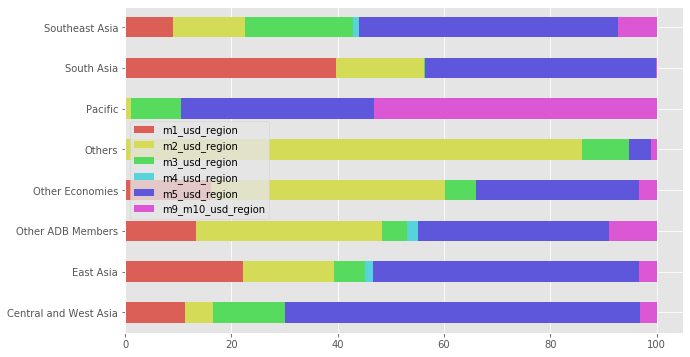

In [881]:
ax = regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]]\
.plot(kind='barh', stacked=True, figsize=(10, 6),
      colormap=ListedColormap(sns.color_palette("hls", 6)))
ax.set(ylabel='')
plt.show()

In [882]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]]

m1_usd_region  m2_usd_region  m3_usd_region  \
region                                                               
Central and West Asia      11.271598       5.352181      13.474246   
East Asia                  22.107197      17.119519       5.929234   
Other ADB Members          13.342240      35.019578       4.726902   
Other Economies            16.228173      43.928494       5.824634   
Others                      0.189748      85.715786       8.960488   
Pacific                     0.000000       1.098308       9.448001   
South Asia                 39.684268      16.594395       0.155655   
Southeast Asia              8.966473      13.660904      20.224349   

                       m4_usd_region  m5_usd_region  m9_m10_usd_region  
region                                                                  
Central and West Asia       0.000000      66.884475           3.017500  
East Asia                   1.511638      50.076240           3.256171  
Other ADB Members           2.001249      35.883045           9.026985  
Other Economies             0.131386      30.581692           3.305621  
Others                      0.010417       4.102340           1.021221  
Pacific                     0.000000      36.297422          53.156269  
South Asia                  0.000000      43.420231           0.145452  
Southeast Asia              1.091050      48.783809           7.273414

In [883]:
mask = regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]].index.isin(['Other Economies', 'Other ADB Members', 'Others'])

In [884]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]][~mask]

m1_usd_region  m2_usd_region  m3_usd_region  \
region                                                               
Central and West Asia      11.271598       5.352181      13.474246   
East Asia                  22.107197      17.119519       5.929234   
Pacific                     0.000000       1.098308       9.448001   
South Asia                 39.684268      16.594395       0.155655   
Southeast Asia              8.966473      13.660904      20.224349   

                       m4_usd_region  m5_usd_region  m9_m10_usd_region  
region                                                                  
Central and West Asia       0.000000      66.884475           3.017500  
East Asia                   1.511638      50.076240           3.256171  
Pacific                     0.000000      36.297422          53.156269  
South Asia                  0.000000      43.420231           0.145452  
Southeast Asia              1.091050      48.783809           7.273414

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


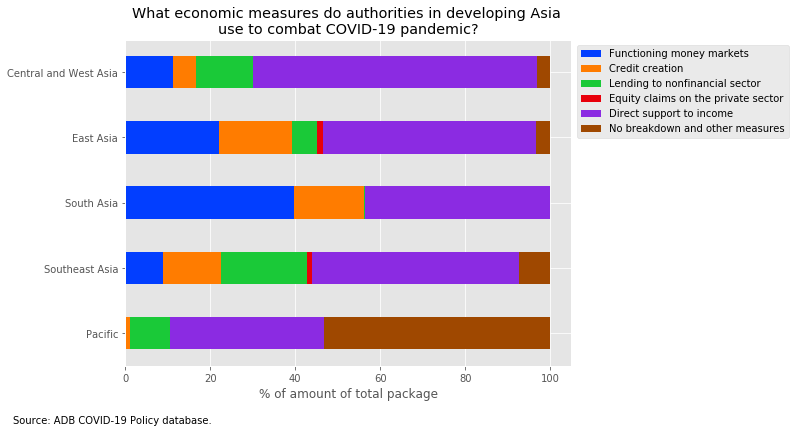

In [885]:
ax = regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]][~mask].iloc[[0, 1, 3, 4, 2], :].\
plot(kind='barh', stacked=True, figsize=(8, 6), 
     colormap=ListedColormap(sns.color_palette('bright', 6)))
ax.invert_yaxis()
ax.set(title='What economic measures do authorities in developing Asia \nuse to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of amount of total package')


ax.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(1.25, 1))
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.25, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')

# plt.tight_layout()
plt.show()

In [886]:
df3.reset_index(level=0).sort_values(by='m1', ascending=False).loc[:, ['m1_gdp', 'm1']]

m1_gdp            m1
country                                                
Japan                           17.991495  9.273680e+11
Germany                         13.085335  5.055310e+11
United States                    2.052926  4.401370e+11
People's Republic of China       3.023069  4.274680e+11
Canada                          10.815525  1.872070e+11
...                                   ...           ...
European Central Bank                 NaN  0.000000e+00
Cook Islands                     0.000000  0.000000e+00
Federated States of Micronesia   0.000000  0.000000e+00
Fiji                             0.000000  0.000000e+00
Viet Nam                         0.000000  0.000000e+00

[79 rows x 2 columns]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:36: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


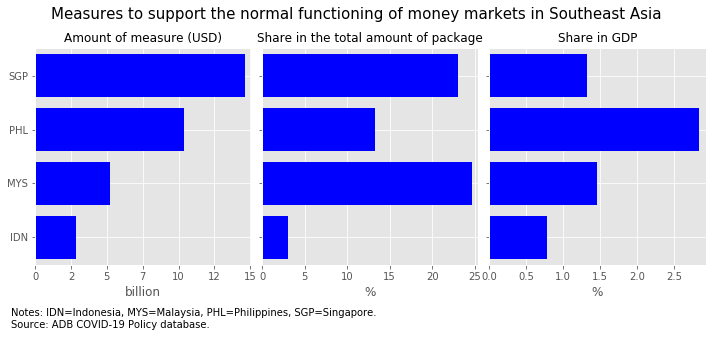

In [887]:
y0 = df3.loc['Southeast Asia'].sort_values(by='m1').loc[:, 'm1']
y1 = df3.loc['Southeast Asia'].sort_values(by='m1').loc[:, 'm1_pkg']
y2 = df3.loc['Southeast Asia'].sort_values(by='m1').loc[:, 'm1_gdp']

fig, axs = plt.subplots(ncols=3, figsize=(10, 4), sharey=True)

axs[0].barh(y0.loc['Singapore':].index, y0.loc['Singapore':], align='center', color='blue')
# axs[0].invert_yaxis()
axs[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[0].set_title('Amount of measure (USD)', fontsize=12)
axs[0].set_xlabel('billion')

axs[1].barh(y1.loc['Singapore':].index, y1.loc['Singapore':], align='center', color='blue')
# axs[1].invert_yaxis()
axs[1].set_title('Share in the total amount of package', fontsize=12)
axs[1].set_xlabel('%')

axs[2].barh(y2.loc['Singapore':].index, y2.loc['Singapore':], align='center', color='blue')
# axs[2].invert_yaxis()
axs[2].set_title('Share in GDP', fontsize=12)
axs[2].set_xlabel('%')

# axs[0].invert_xaxis()
axs[0].set(yticks=y0.loc['Singapore':].index, yticklabels=['IDN', 'MYS', 'PHL', 'SGP'])
# axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Measures to support the normal functioning of money markets in Southeast Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
plt.annotate('Notes: IDN=Indonesia, MYS=Malaysia, PHL=Philippines, SGP=Singapore. \nSource: ADB COVID-19 Policy database.', 
            xy=(-2.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [888]:
y0

country
Brunei Darussalam    0.000000e+00
Cambodia             0.000000e+00
Lao PDR              0.000000e+00
Myanmar              0.000000e+00
Thailand             0.000000e+00
Timor-Leste          0.000000e+00
Viet Nam             0.000000e+00
Singapore            2.823862e+09
Philippines          5.200693e+09
Malaysia             1.038223e+10
Indonesia            1.463829e+10
Name: m1, dtype: float64

In [889]:
df3.loc['Southeast Asia'].iloc[:, 7:12].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]

m1            m2            m3            m4  \
country                                                               
Indonesia    1.463829e+10  9.871945e+09  0.000000e+00  0.000000e+00   
Malaysia     1.038223e+10  1.163928e+10  2.519903e+10  2.793426e+08   
Philippines  5.200693e+09  2.357397e+09  3.637857e+08  0.000000e+00   
Singapore    2.823862e+09  0.000000e+00  2.096717e+10  3.741617e+09   
Thailand     0.000000e+00  2.647334e+10  1.401530e+10  0.000000e+00   
Viet Nam     0.000000e+00  0.000000e+00  1.360017e+10  0.000000e+00   

                       m5  
country                    
Indonesia    3.893056e+10  
Malaysia     2.209188e+10  
Philippines  1.027523e+10  
Singapore    5.158913e+10  
Thailand     4.360315e+10  
Viet Nam     1.290295e+10

In [890]:
df3.loc['Southeast Asia'].iloc[:, 14:19].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]

m1_pkg     m2_pkg     m3_pkg    m4_pkg     m5_pkg
country                                                          
Indonesia    23.073945  15.560879   0.000000  0.000000  61.365176
Malaysia     13.234421  14.836795  32.121662  0.356083  28.160920
Philippines  24.711518  11.201365   1.728557  0.000000  48.823577
Singapore     3.065357   0.000000  22.760278  4.061598  56.001012
Thailand      0.000000  31.481481  16.666667  0.000000  51.851852
Viet Nam      0.000000   0.000000  51.315362  0.000000  48.684638

In [891]:
df3.loc['Southeast Asia'].iloc[:, 21:26].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]

m1_gdp    m2_gdp    m3_gdp    m4_gdp     m5_gdp
country                                                       
Indonesia    1.316737  0.887996  0.000000  0.000000   3.501862
Malaysia     2.842088  3.186198  6.898118  0.076469   6.047550
Philippines  1.457536  0.660680  0.101954  0.000000   2.879715
Singapore    0.778314  0.000000  5.778978  1.031265  14.219010
Thailand     0.000000  5.002738  2.648509  0.000000   8.239804
Viet Nam     0.000000  0.000000  5.198107  0.000000   4.931622

In [892]:
y1 = df3.loc['Southeast Asia'].iloc[:, 7:12].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]
y2 = df3.loc['Southeast Asia'].iloc[:, 14:19].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]
y3 = df3.loc['Southeast Asia'].iloc[:, 21:26].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]

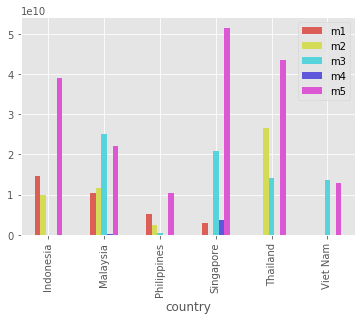

In [893]:
y1 = df3.loc['Southeast Asia'].iloc[:, 7:12].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]
y1.plot(kind='bar', colormap=ListedColormap(sns.color_palette('hls', 6)))

In [894]:
df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]

m1    1.46383e+10
m2    9.87195e+09
m3              0
m4              0
m5    3.89306e+10
Name: Indonesia, dtype: object

In [895]:
df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]

m1_pkg    23.0739
m2_pkg    15.5609
m3_pkg          0
m4_pkg          0
m5_pkg    61.3652
Name: Indonesia, dtype: object

In [896]:
df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

m1_gdp     1.31674
m2_gdp    0.887996
m3_gdp           0
m4_gdp           0
m5_gdp     3.50186
Name: Indonesia, dtype: object

In [897]:
measures

[1, 2, 3, 4, 5, 9, 10]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:128: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


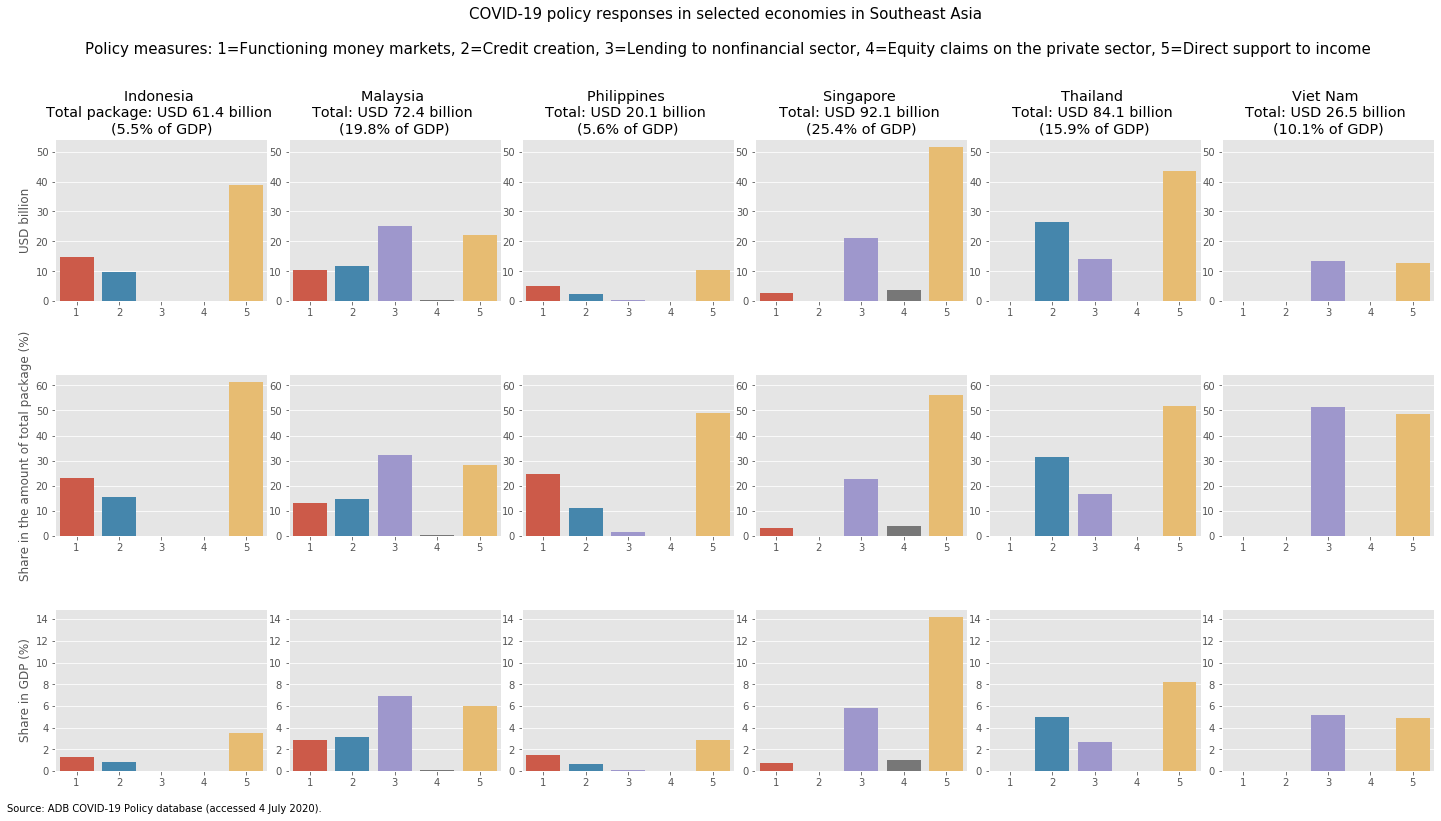

In [898]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(20, 10))

ino_1 = df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]
ino_2 = df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]
ino_3 = df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

mal_1 = df3.reset_index(level=0).loc['Malaysia'].iloc[8:13]
mal_2 = df3.reset_index(level=0).loc['Malaysia'].iloc[15:20]
mal_3 = df3.reset_index(level=0).loc['Malaysia'].iloc[22:27]

phi_1 = df3.reset_index(level=0).loc['Philippines'].iloc[8:13]
phi_2 = df3.reset_index(level=0).loc['Philippines'].iloc[15:20]
phi_3 = df3.reset_index(level=0).loc['Philippines'].iloc[22:27]

sin_1 = df3.reset_index(level=0).loc['Singapore'].iloc[8:13]
sin_2 = df3.reset_index(level=0).loc['Singapore'].iloc[15:20]
sin_3 = df3.reset_index(level=0).loc['Singapore'].iloc[22:27]

tha_1 = df3.reset_index(level=0).loc['Thailand'].iloc[8:13]
tha_2 = df3.reset_index(level=0).loc['Thailand'].iloc[15:20]
tha_3 = df3.reset_index(level=0).loc['Thailand'].iloc[22:27]

vie_1 = df3.reset_index(level=0).loc['Viet Nam'].iloc[8:13]
vie_2 = df3.reset_index(level=0).loc['Viet Nam'].iloc[15:20]
vie_3 = df3.reset_index(level=0).loc['Viet Nam'].iloc[22:27]

ax1 = plt.subplot(361)
sns.barplot(x=ino_1.index, y=ino_1, ax=ax1)
ax1.set(title='Indonesia \nTotal package: USD 61.4 billion \n(5.5% of GDP)', ylabel='USD billion', xticklabels=[1, 2, 3, 4, 5])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
# ax1.get_xaxis().set_visible(False)
# ax1.annotate('Total package: USD 61.4 billion',
#              xy=(1, 80), xycoords='axes points', textcoords='offset points')

ax2 = plt.subplot(362, sharey=ax1)
sns.barplot(x=mal_1.index, y=mal_1, ax=ax2)
ax2.set(title='Malaysia \nTotal: USD 72.4 billion \n(19.8% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(363, sharey=ax1)
sns.barplot(x=phi_1.index, y=phi_1, ax=ax3)
ax3.set(title='Philippines \nTotal: USD 20.1 billion \n(5.6% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(364, sharey=ax1)
sns.barplot(x=sin_1.index, y=sin_1, ax=ax4)
ax4.set(title='Singapore \nTotal: USD 92.1 billion \n(25.4% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(365, sharey=ax1)
sns.barplot(x=tha_1.index, y=tha_1, ax=ax5)
ax5.set(title='Thailand \nTotal: USD 84.1 billion \n(15.9% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax5.get_xaxis().set_visible(False)

ax6 = plt.subplot(366, sharey=ax1)
sns.barplot(x=vie_1.index, y=vie_1, ax=ax6)
ax6.set(title='Viet Nam \nTotal: USD 26.5 billion \n(10.1% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(367)
sns.barplot(x=ino_2.index, y=ino_2, ax=ax7)
ax7.set(title='', ylabel='Share in the amount of total package (%)', xticklabels=[1, 2, 3, 4, 5])
# ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(368, sharey=ax7)
sns.barplot(x=mal_2.index, y=mal_2, ax=ax8)
ax8.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(369, sharey=ax7)
sns.barplot(x=phi_2.index, y=phi_2, ax=ax9)
ax9.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax9.get_xaxis().set_visible(False)

ax10 = plt.subplot(3, 6, 10, sharey=ax7)
sns.barplot(x=sin_2.index, y=sin_2, ax=ax10)
ax10.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax10.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 6, 11, sharey=ax7)
sns.barplot(x=tha_2.index, y=tha_2, ax=ax11)
ax11.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax11.get_xaxis().set_visible(False)

ax12 = plt.subplot(3, 6, 12, sharey=ax7)
sns.barplot(x=vie_2.index, y=vie_2, ax=ax12)
ax12.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax12.get_xaxis().set_visible(False)

ax13 = plt.subplot(3, 6, 13)
sns.barplot(x=ino_3.index, y=ino_3, ax=ax13)
ax13.set(title='', ylabel='Share in GDP (%)', xticklabels=[1, 2, 3, 4, 5])
# ax13.get_xaxis().set_visible(False)
ax13.yaxis.set_major_locator(MaxNLocator(integer=True))

ax14 = plt.subplot(3, 6, 14, sharey=ax13)
sns.barplot(x=mal_3.index, y=mal_3, ax=ax14)
ax14.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax14.get_xaxis().set_visible(False)

ax15 = plt.subplot(3, 6, 15, sharey=ax13)
sns.barplot(x=phi_3.index, y=phi_3, ax=ax15)
ax15.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax15.get_xaxis().set_visible(False)

ax16 = plt.subplot(3, 6, 16, sharey=ax13)
sns.barplot(x=sin_3.index, y=sin_3, ax=ax16)
ax16.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax16.get_xaxis().set_visible(False)

ax17 = plt.subplot(3, 6, 17, sharey=ax13)
sns.barplot(x=tha_3.index, y=tha_3, ax=ax17)
ax17.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax17.get_xaxis().set_visible(False)

ax18 = plt.subplot(3, 6, 18, sharey=ax13)
sns.barplot(x=vie_3.index, y=vie_3, ax=ax18)
ax18.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax18.get_xaxis().set_visible(False)

fig.suptitle('COVID-19 policy responses in selected economies in Southeast Asia \n\nPolicy measures: 1=Functioning money markets, 2=Credit creation, \
3=Lending to nonfinancial sector, 4=Equity claims on the private sector, 5=Direct support to income',
             y=1.1, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Source: ADB COVID-19 Policy database (accessed 4 July 2020).', 
            xy=(-5.7, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [899]:
round(df3.reset_index(level=0).loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam'], 
                             'amount_usd']/1e9, ndigits=1)

country
Indonesia      63.4
Malaysia       78.4
Philippines    21.0
Singapore      92.1
Thailand       84.1
Viet Nam       26.5
Name: amount_usd, dtype: float64

In [900]:
round(df3.reset_index(level=0).loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam'], 
                             'pkg_gdp'], ndigits=1)

country
Indonesia       5.7
Malaysia       21.5
Philippines     5.9
Singapore      25.4
Thailand       15.9
Viet Nam       10.1
Name: pkg_gdp, dtype: float64

In [901]:
measures = pd.DataFrame(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:127: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


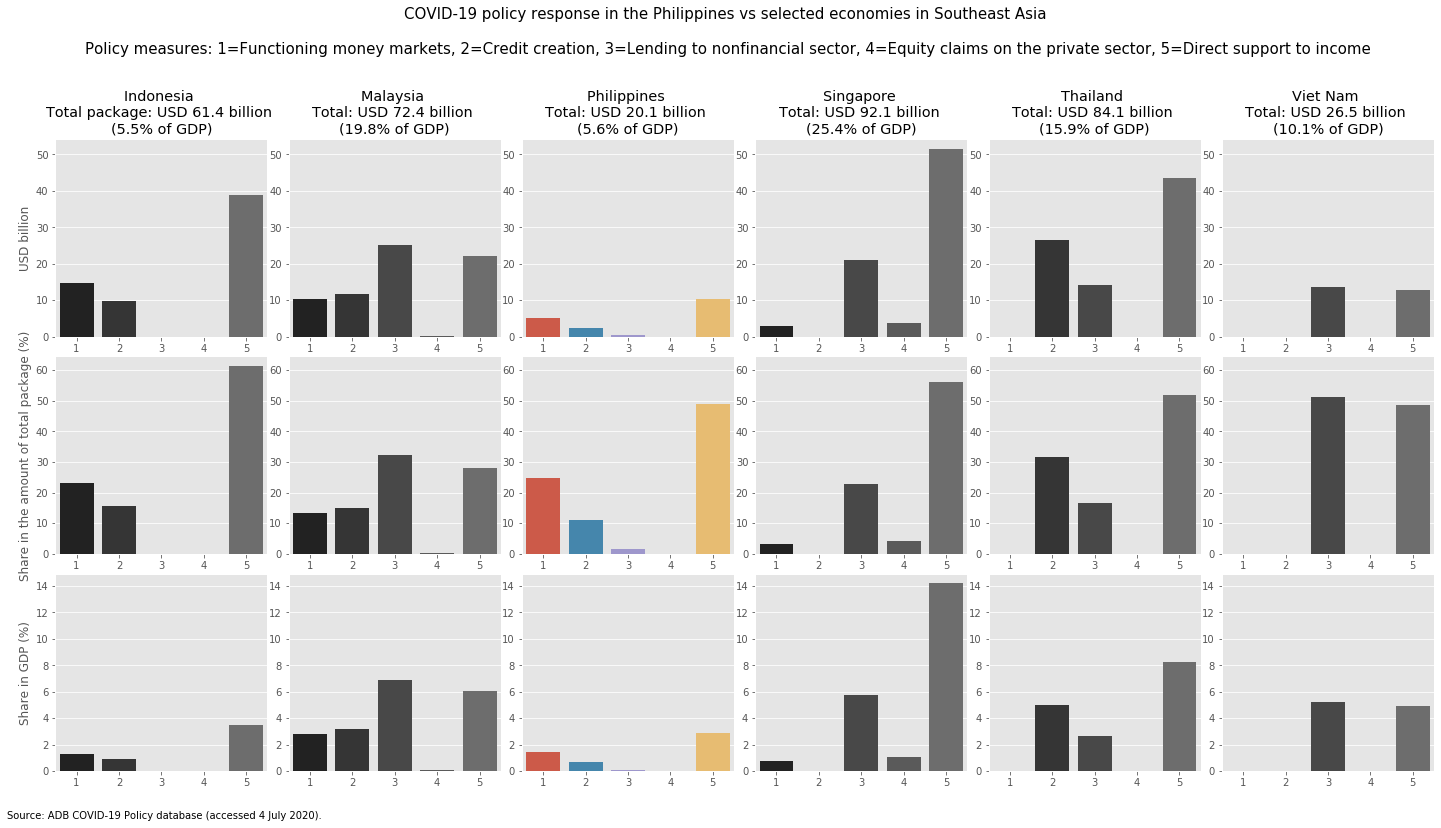

In [902]:
fig = plt.figure(figsize=(20, 10))

ino_1 = df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]
ino_2 = df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]
ino_3 = df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

mal_1 = df3.reset_index(level=0).loc['Malaysia'].iloc[8:13]
mal_2 = df3.reset_index(level=0).loc['Malaysia'].iloc[15:20]
mal_3 = df3.reset_index(level=0).loc['Malaysia'].iloc[22:27]

phi_1 = df3.reset_index(level=0).loc['Philippines'].iloc[8:13]
phi_2 = df3.reset_index(level=0).loc['Philippines'].iloc[15:20]
phi_3 = df3.reset_index(level=0).loc['Philippines'].iloc[22:27]

sin_1 = df3.reset_index(level=0).loc['Singapore'].iloc[8:13]
sin_2 = df3.reset_index(level=0).loc['Singapore'].iloc[15:20]
sin_3 = df3.reset_index(level=0).loc['Singapore'].iloc[22:27]

tha_1 = df3.reset_index(level=0).loc['Thailand'].iloc[8:13]
tha_2 = df3.reset_index(level=0).loc['Thailand'].iloc[15:20]
tha_3 = df3.reset_index(level=0).loc['Thailand'].iloc[22:27]

vie_1 = df3.reset_index(level=0).loc['Viet Nam'].iloc[8:13]
vie_2 = df3.reset_index(level=0).loc['Viet Nam'].iloc[15:20]
vie_3 = df3.reset_index(level=0).loc['Viet Nam'].iloc[22:27]

ax1 = plt.subplot(361)
sns.barplot(x=ino_1.index, y=ino_1, palette=sns.dark_palette('gray'), ax=ax1)
ax1.set(title='Indonesia \nTotal package: USD 61.4 billion \n(5.5% of GDP)', ylabel='USD billion', xticklabels=[1, 2, 3, 4, 5])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
# ax1.get_xaxis().set_visible(False)
# ax1.annotate('Total package: USD 61.4 billion',
#              xy=(1, 80), xycoords='axes points', textcoords='offset points')

ax2 = plt.subplot(362, sharey=ax1)
sns.barplot(x=mal_1.index, y=mal_1, palette=sns.dark_palette('gray'), ax=ax2)
ax2.set(title='Malaysia \nTotal: USD 72.4 billion \n(19.8% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(363, sharey=ax1)
sns.barplot(x=phi_1.index, y=phi_1, ax=ax3)
ax3.set(title='Philippines \nTotal: USD 20.1 billion \n(5.6% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(364, sharey=ax1)
sns.barplot(x=sin_1.index, y=sin_1, palette=sns.dark_palette('gray'), ax=ax4)
ax4.set(title='Singapore \nTotal: USD 92.1 billion \n(25.4% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(365, sharey=ax1)
sns.barplot(x=tha_1.index, y=tha_1, palette=sns.dark_palette('gray'), ax=ax5)
ax5.set(title='Thailand \nTotal: USD 84.1 billion \n(15.9% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax5.get_xaxis().set_visible(False)

ax6 = plt.subplot(366, sharey=ax1)
sns.barplot(x=vie_1.index, y=vie_1, palette=sns.dark_palette('gray'), ax=ax6)
ax6.set(title='Viet Nam \nTotal: USD 26.5 billion \n(10.1% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(367)
sns.barplot(x=ino_2.index, y=ino_2, palette=sns.dark_palette('gray'), ax=ax7)
ax7.set(title='', ylabel='Share in the amount of total package (%)', xticklabels=[1, 2, 3, 4, 5])
# ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(368, sharey=ax7)
sns.barplot(x=mal_2.index, y=mal_2, palette=sns.dark_palette('gray'), ax=ax8)
ax8.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(369, sharey=ax7)
sns.barplot(x=phi_2.index, y=phi_2, ax=ax9)
ax9.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax9.get_xaxis().set_visible(False)

ax10 = plt.subplot(3, 6, 10, sharey=ax7)
sns.barplot(x=sin_2.index, y=sin_2, palette=sns.dark_palette('gray'), ax=ax10)
ax10.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax10.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 6, 11, sharey=ax7)
sns.barplot(x=tha_2.index, y=tha_2, palette=sns.dark_palette('gray'), ax=ax11)
ax11.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax11.get_xaxis().set_visible(False)

ax12 = plt.subplot(3, 6, 12, sharey=ax7)
sns.barplot(x=vie_2.index, y=vie_2, palette=sns.dark_palette('gray'), ax=ax12)
ax12.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax12.get_xaxis().set_visible(False)

ax13 = plt.subplot(3, 6, 13)
sns.barplot(x=ino_3.index, y=ino_3, palette=sns.dark_palette('gray'), ax=ax13)
ax13.set(title='', ylabel='Share in GDP (%)', xticklabels=[1, 2, 3, 4, 5])
# ax13.get_xaxis().set_visible(False)
ax13.yaxis.set_major_locator(MaxNLocator(integer=True))

ax14 = plt.subplot(3, 6, 14, sharey=ax13)
sns.barplot(x=mal_3.index, y=mal_3, palette=sns.dark_palette('gray'), ax=ax14)
ax14.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax14.get_xaxis().set_visible(False)

ax15 = plt.subplot(3, 6, 15, sharey=ax13)
sns.barplot(x=phi_3.index, y=phi_3, ax=ax15)
ax15.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax15.get_xaxis().set_visible(False)

ax16 = plt.subplot(3, 6, 16, sharey=ax13)
sns.barplot(x=sin_3.index, y=sin_3, palette=sns.dark_palette('gray'), ax=ax16)
ax16.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax16.get_xaxis().set_visible(False)

ax17 = plt.subplot(3, 6, 17, sharey=ax13)
sns.barplot(x=tha_3.index, y=tha_3, palette=sns.dark_palette('gray'), ax=ax17)
ax17.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax17.get_xaxis().set_visible(False)

ax18 = plt.subplot(3, 6, 18, sharey=ax13)
sns.barplot(x=vie_3.index, y=vie_3, palette=sns.dark_palette('gray'), ax=ax18)
ax18.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax18.get_xaxis().set_visible(False)

fig.suptitle('COVID-19 policy response in the Philippines vs selected economies in Southeast Asia \n\nPolicy measures: 1=Functioning money markets, 2=Credit creation, \
3=Lending to nonfinancial sector, 4=Equity claims on the private sector, 5=Direct support to income',
             y=1.1, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.annotate('Source: ADB COVID-19 Policy database (accessed 4 July 2020).', 
            xy=(-5.7, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

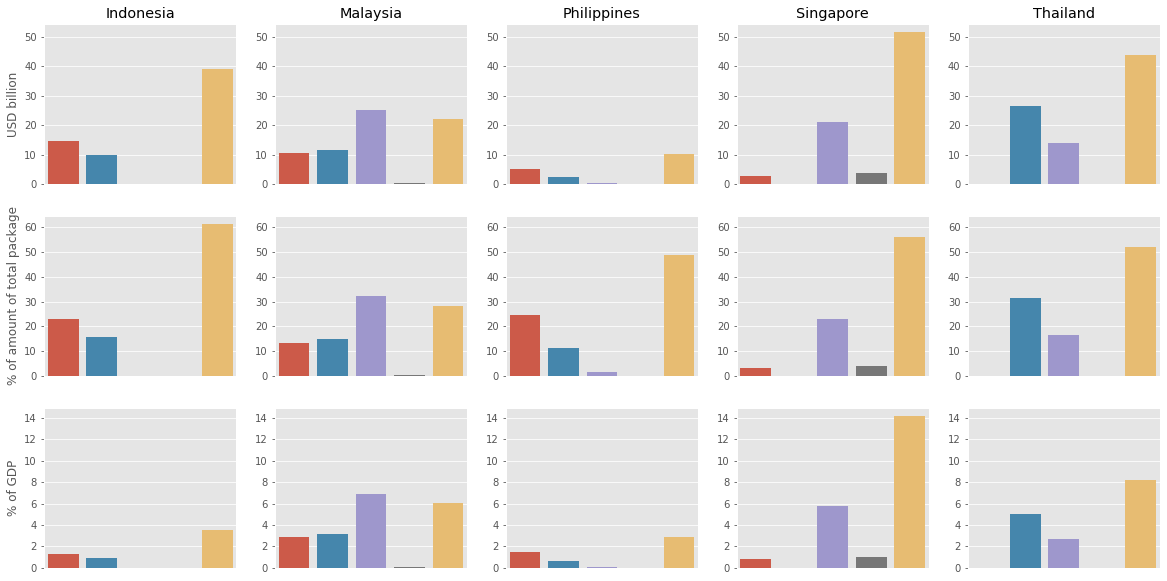

In [903]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(20, 10))

ino_1 = df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]
ino_2 = df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]
ino_3 = df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

mal_1 = df3.reset_index(level=0).loc['Malaysia'].iloc[8:13]
mal_2 = df3.reset_index(level=0).loc['Malaysia'].iloc[15:20]
mal_3 = df3.reset_index(level=0).loc['Malaysia'].iloc[22:27]

phi_1 = df3.reset_index(level=0).loc['Philippines'].iloc[8:13]
phi_2 = df3.reset_index(level=0).loc['Philippines'].iloc[15:20]
phi_3 = df3.reset_index(level=0).loc['Philippines'].iloc[22:27]

sin_1 = df3.reset_index(level=0).loc['Singapore'].iloc[8:13]
sin_2 = df3.reset_index(level=0).loc['Singapore'].iloc[15:20]
sin_3 = df3.reset_index(level=0).loc['Singapore'].iloc[22:27]

tha_1 = df3.reset_index(level=0).loc['Thailand'].iloc[8:13]
tha_2 = df3.reset_index(level=0).loc['Thailand'].iloc[15:20]
tha_3 = df3.reset_index(level=0).loc['Thailand'].iloc[22:27]

# vie_1 = df3.reset_index(level=0).loc['Viet Nam'].iloc[8:13]
# vie_2 = df3.reset_index(level=0).loc['Viet Nam'].iloc[15:20]
# vie_3 = df3.reset_index(level=0).loc['Viet Nam'].iloc[22:27]

ax1 = plt.subplot(351)
sns.barplot(x=ino_1.index, y=ino_1, ax=ax1)
ax1.set(title='Indonesia', ylabel='USD billion')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
ax1.get_xaxis().set_visible(False)

ax2 = plt.subplot(352, sharey=ax1)
sns.barplot(x=mal_1.index, y=mal_1, ax=ax2)
ax2.set(title='Malaysia', ylabel='')
ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(353, sharey=ax1)
sns.barplot(x=phi_1.index, y=phi_1, ax=ax3)
ax3.set(title='Philippines', ylabel='')
ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(354, sharey=ax1)
sns.barplot(x=sin_1.index, y=sin_1, ax=ax4)
ax4.set(title='Singapore', ylabel='')
ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(355, sharey=ax1)
sns.barplot(x=tha_1.index, y=tha_1, ax=ax5)
ax5.set(title='Thailand', ylabel='')
ax5.get_xaxis().set_visible(False)

# ax6 = plt.subplot(356, sharey=ax1)
# sns.barplot(x=vie_1.index, y=vie_1, ax=ax6)
# ax6.set(title='Viet Nam', ylabel='')
# ax6.get_xaxis().set_visible(False)

ax6 = plt.subplot(356)
sns.barplot(x=ino_2.index, y=ino_2, ax=ax6)
ax6.set(title='', ylabel='% of amount of total package')
ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(357, sharey=ax6)
sns.barplot(x=mal_2.index, y=mal_2, ax=ax7)
ax7.set(title='', ylabel='')
ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(358, sharey=ax6)
sns.barplot(x=phi_2.index, y=phi_2, ax=ax8)
ax8.set(title='', ylabel='')
ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(359, sharey=ax6)
sns.barplot(x=sin_2.index, y=sin_2, ax=ax9)
ax9.set(title='', ylabel='')
ax9.get_xaxis().set_visible(False)

ax10 = plt.subplot(3, 5, 10, sharey=ax6)
sns.barplot(x=tha_2.index, y=tha_2, ax=ax10)
ax10.set(title='', ylabel='')
ax10.get_xaxis().set_visible(False)

# ax12 = plt.subplot(3, 5, 12, sharey=ax7)
# sns.barplot(x=vie_2.index, y=vie_2, ax=ax12)
# ax12.set(title='', ylabel='')
# ax12.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 5, 11)
sns.barplot(x=ino_3.index, y=ino_3, ax=ax11)
ax11.set(title='', ylabel='% of GDP')
ax11.get_xaxis().set_visible(False)
ax11.yaxis.set_major_locator(MaxNLocator(integer=True))

ax12 = plt.subplot(3, 5, 12, sharey=ax11)
sns.barplot(x=mal_3.index, y=mal_3, ax=ax12)
ax12.set(title='', ylabel='')
ax12.get_xaxis().set_visible(False)

ax13 = plt.subplot(3, 5, 13, sharey=ax11)
sns.barplot(x=phi_3.index, y=phi_3, ax=ax13)
ax13.set(title='', ylabel='')
ax13.get_xaxis().set_visible(False)

ax14 = plt.subplot(3, 5, 14, sharey=ax11)
sns.barplot(x=sin_3.index, y=sin_3, ax=ax14)
ax14.set(title='', ylabel='')
ax14.get_xaxis().set_visible(False)

ax15 = plt.subplot(3, 5, 15, sharey=ax11)
sns.barplot(x=tha_3.index, y=tha_3, ax=ax15)
ax15.set(title='', ylabel='')
ax15.get_xaxis().set_visible(False)

# ax18 = plt.subplot(3, 6, 18, sharey=ax13)
# # labels = ['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
# #            'Equity claims on the private sector', 'Direct support to income']
# sns.barplot(x=vie_3.index, y=vie_3, ax=ax18)
# ax18.set(title='', ylabel='')
# ax18.get_xaxis().set_visible(False)
# ax18.legend(,
#            loc='upper center', bbox_to_anchor=(1.25, 1))

plt.show()

In [904]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)['amount_usd']

country
Kazakhstan         2.379624e+10
Pakistan           1.356053e+10
Georgia            1.823888e+09
Azerbaijan         1.525588e+09
Armenia            6.134861e+08
Kyrgyz Republic    2.580000e+08
Afghanistan        1.016625e+08
Uzbekistan         3.213240e+07
Tajikistan         1.253464e+06
Turkmenistan       0.000000e+00
Name: amount_usd, dtype: float64

In [905]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm1', 'm2', 'm3', 'm4', 'm5']]

amount_usd            m1            m2            m3   m4  \
country                                                                        
Kazakhstan       2.379624e+10  4.244997e+09  0.000000e+00  8.732565e+08  0.0   
Pakistan         1.356053e+10  0.000000e+00  1.581454e+09  4.747226e+09  0.0   
Georgia          1.823888e+09  2.297000e+08  3.058474e+08  0.000000e+00  0.0   
Azerbaijan       1.525588e+09  0.000000e+00  2.941176e+08  0.000000e+00  0.0   
Armenia          6.134861e+08  0.000000e+00  5.112384e+07  0.000000e+00  0.0   
Kyrgyz Republic  2.580000e+08  2.270000e+08  0.000000e+00  0.000000e+00  0.0   
Afghanistan      1.016625e+08  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
Uzbekistan       3.213240e+07  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
Tajikistan       1.253464e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
Turkmenistan     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.0   

                           m5  
country                        
Kazakhstan       1.867799e+10  
Pakistan         7.231848e+09  
Georgia          1.123907e+09  
Azerbaijan       6.382353e+08  
Armenia          6.134861e+07  
Kyrgyz Republic  3.100000e+07  
Afghanistan      1.016625e+08  
Uzbekistan       3.213240e+07  
Tajikistan       1.253464e+06  
Turkmenistan     0.000000e+00

In [906]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']]

amount_usd            m5
country                                    
Kazakhstan       2.379624e+10  1.867799e+10
Pakistan         1.356053e+10  7.231848e+09
Georgia          1.823888e+09  1.123907e+09
Azerbaijan       1.525588e+09  6.382353e+08
Armenia          6.134861e+08  6.134861e+07
Kyrgyz Republic  2.580000e+08  3.100000e+07
Afghanistan      1.016625e+08  1.016625e+08
Uzbekistan       3.213240e+07  3.213240e+07
Tajikistan       1.253464e+06  1.253464e+06
Turkmenistan     0.000000e+00  0.000000e+00

In [907]:
mask = df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm1', 'm2', 'm3', 'm4', 'm5']].index.isin(['Turkmenistan'])

In [908]:
data = df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']][~mask]

In [909]:
data

amount_usd            m5
country                                    
Kazakhstan       2.379624e+10  1.867799e+10
Pakistan         1.356053e+10  7.231848e+09
Georgia          1.823888e+09  1.123907e+09
Azerbaijan       1.525588e+09  6.382353e+08
Armenia          6.134861e+08  6.134861e+07
Kyrgyz Republic  2.580000e+08  3.100000e+07
Afghanistan      1.016625e+08  1.016625e+08
Uzbekistan       3.213240e+07  3.213240e+07
Tajikistan       1.253464e+06  1.253464e+06

[Text(0, 0.5, ''), Text(0.5, 0, 'Amounf of total package (USD billion)')]

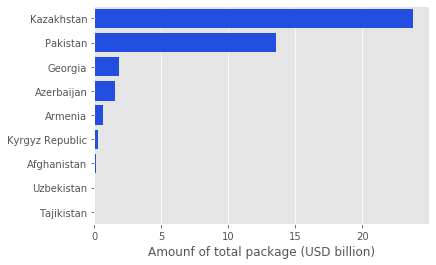

In [910]:
ax = sns.barplot(x=data['amount_usd'], y=data.index, palette=sns.color_palette('bright', 1))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
ax.set(ylabel='', xlabel='Amounf of total package (USD billion)')

In [911]:
data

amount_usd            m5
country                                    
Kazakhstan       2.379624e+10  1.867799e+10
Pakistan         1.356053e+10  7.231848e+09
Georgia          1.823888e+09  1.123907e+09
Azerbaijan       1.525588e+09  6.382353e+08
Armenia          6.134861e+08  6.134861e+07
Kyrgyz Republic  2.580000e+08  3.100000e+07
Afghanistan      1.016625e+08  1.016625e+08
Uzbekistan       3.213240e+07  3.213240e+07
Tajikistan       1.253464e+06  1.253464e+06

In [912]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']].iloc[:2, :]

amount_usd            m5
country                               
Kazakhstan  2.379624e+10  1.867799e+10
Pakistan    1.356053e+10  7.231848e+09

In [913]:
other = pd.Series(df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']].iloc[2:, :].sum(), name='Others')

In [914]:
other

amount_usd    4.356011e+09
m5            1.989539e+09
Name: Others, dtype: float64

In [915]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']].iloc[:2, :].append(other)

amount_usd            m5
country                               
Kazakhstan  2.379624e+10  1.867799e+10
Pakistan    1.356053e+10  7.231848e+09
Others      4.356011e+09  1.989539e+09

In [916]:
data = df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']].iloc[:2, :].append(other)

In [917]:
data

amount_usd            m5
country                               
Kazakhstan  2.379624e+10  1.867799e+10
Pakistan    1.356053e+10  7.231848e+09
Others      4.356011e+09  1.989539e+09

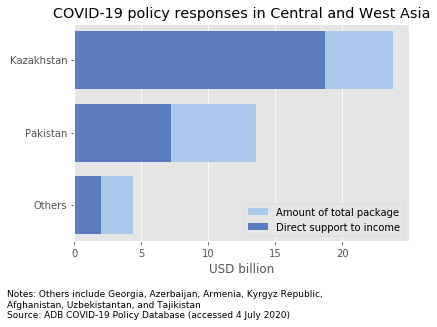

In [918]:
fig, ax = plt.subplots()
sns.set_color_codes('pastel')
sns.barplot(x=data.amount_usd, y=data.index, label='Amount of total package', color='b')
sns.set_color_codes('muted')
sns.barplot(x=data.m5, y=data.index, label='Direct support to income', color='b')
ax.legend(frameon=True)
ax.set(title='COVID-19 policy responses in Central and West Asia', ylabel='', xlabel='USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
ax.annotate('Notes: Others include Georgia, Azerbaijan, Armenia, Kyrgyz Republic, \nAfghanistan, \
Uzbekistantan, and Tajikistan \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020)', 
            xy=(-0.20, -0.35), xytext=(-0.20, -0.35), xycoords='axes fraction', textcoords='offset points',
            fontsize=9)
plt.show()

In [919]:
df3.loc['East Asia'].sort_values(by='amount_usd', ascending=False)

amount_lcy    amount_usd       gdp_lcy  \
country                                                                
People's Republic of China  1.516643e+13  2.161057e+12  9.549700e+13   
Republic of Korea           2.871916e+14  2.353862e+11  1.913640e+15   
Hong Kong, China            1.486270e+12  1.914040e+11  2.921250e+12   
Taipei,China                1.250000e+12  4.148620e+10  1.824140e+13   
Mongolia                    6.010294e+12  2.180394e+09  3.712890e+13   

                                 gdp_usd          popn    pkg_gdp  \
country                                                             
People's Republic of China  1.414020e+13  1.392730e+09  15.283073   
Republic of Korea           1.629530e+12  5.163526e+07  14.445038   
Hong Kong, China            3.729890e+11  7.451000e+06  51.316261   
Taipei,China                5.861040e+11  2.358900e+07   7.078300   
Mongolia                    1.363700e+10  3.170208e+06  15.988811   

                              pkg_pc_usd            m1            m2  \
country                                                                
People's Republic of China   1551.669810  4.274680e+11  4.436400e+11   
Republic of Korea            4558.633791  1.774465e+10  2.458842e+08   
Hong Kong, China            25688.365157  1.297860e+11  6.490580e+09   
Taipei,China                 1758.709640  6.637792e+09  0.000000e+00   
Mongolia                      687.776353  1.175396e+08  1.260663e+08   

                                      m3  ...    m10_pkg     m1_gdp    m2_gdp  \
country                                   ...                                   
People's Republic of China  4.987124e+10  ...   0.000000   3.023069  3.137438   
Republic of Korea           1.059760e+11  ...  14.074232   1.088943  0.015089   
Hong Kong, China            0.000000e+00  ...   7.670201  34.796200  1.740153   
Taipei,China                0.000000e+00  ...  67.200000   1.132528  0.000000   
Mongolia                    1.813882e+08  ...   0.000000   0.861917  0.924443   

                              m3_gdp    m4_gdp     m5_gdp    m9_gdp   m10_gdp  \
country                                                                         
People's Republic of China  0.352691  0.201538   8.553981  0.014356  0.000000   
Republic of Korea           6.503470  0.538184   3.777348  0.488975  2.033028   
Hong Kong, China            0.000000  0.673274  10.170573  0.000000  3.936061   
Taipei,China                0.000000  0.000000   1.189154  0.000000  4.756618   
Mongolia                    1.330118  0.000000  12.872333  0.000000  0.000000   

                            m_others_gdp  m_others_pkg  
country                                                 
People's Republic of China      0.014356      0.093936  
Republic of Korea               2.522003     17.459307  
Hong Kong, China                3.936061      7.670201  
Taipei,China                    4.756618     67.200000  
Mongolia                        0.000000      0.000000  

[5 rows x 30 columns]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:127: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


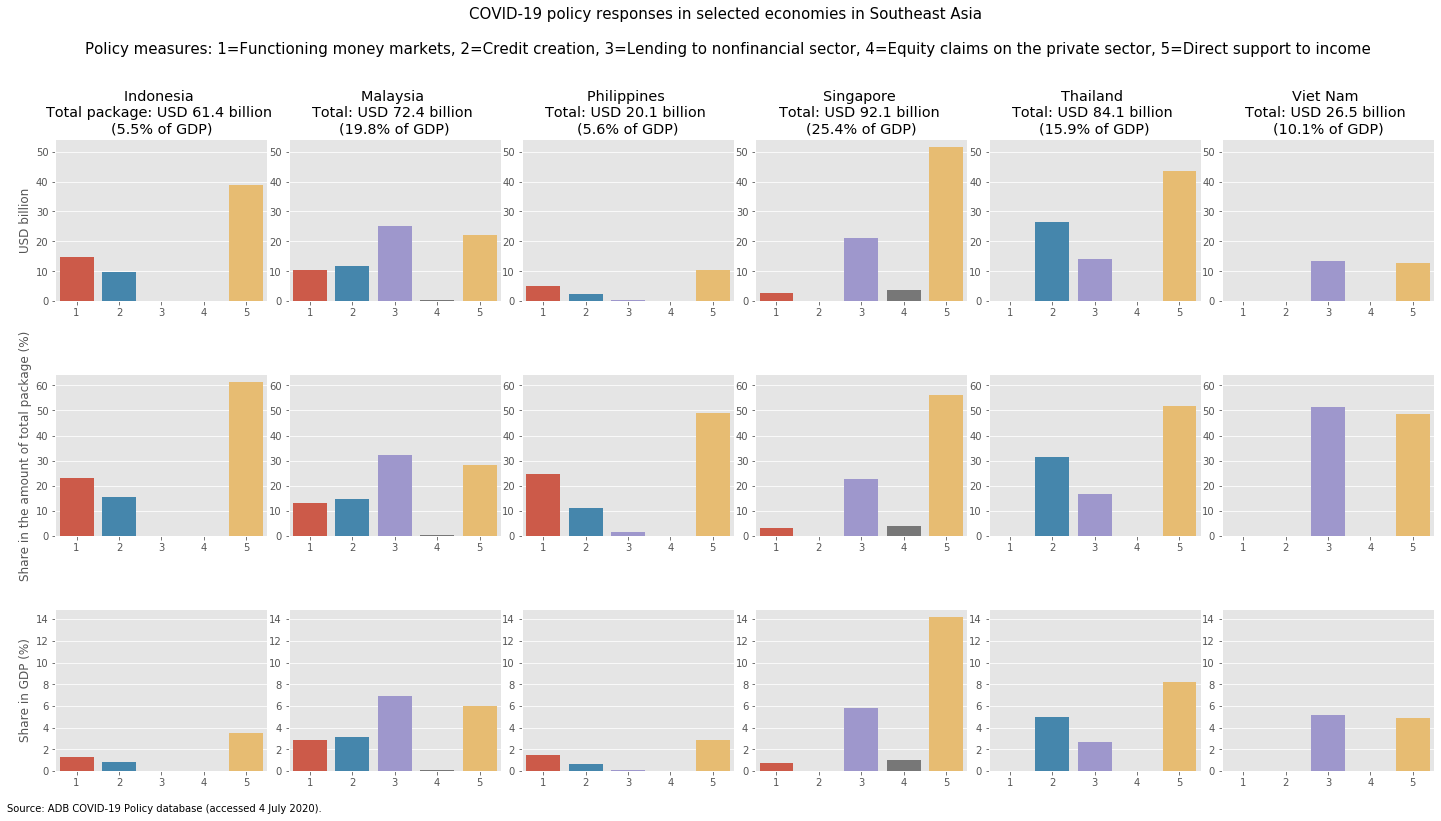

In [920]:
fig = plt.figure(figsize=(20, 10))

ino_1 = df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]
ino_2 = df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]
ino_3 = df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

mal_1 = df3.reset_index(level=0).loc['Malaysia'].iloc[8:13]
mal_2 = df3.reset_index(level=0).loc['Malaysia'].iloc[15:20]
mal_3 = df3.reset_index(level=0).loc['Malaysia'].iloc[22:27]

phi_1 = df3.reset_index(level=0).loc['Philippines'].iloc[8:13]
phi_2 = df3.reset_index(level=0).loc['Philippines'].iloc[15:20]
phi_3 = df3.reset_index(level=0).loc['Philippines'].iloc[22:27]

sin_1 = df3.reset_index(level=0).loc['Singapore'].iloc[8:13]
sin_2 = df3.reset_index(level=0).loc['Singapore'].iloc[15:20]
sin_3 = df3.reset_index(level=0).loc['Singapore'].iloc[22:27]

tha_1 = df3.reset_index(level=0).loc['Thailand'].iloc[8:13]
tha_2 = df3.reset_index(level=0).loc['Thailand'].iloc[15:20]
tha_3 = df3.reset_index(level=0).loc['Thailand'].iloc[22:27]

vie_1 = df3.reset_index(level=0).loc['Viet Nam'].iloc[8:13]
vie_2 = df3.reset_index(level=0).loc['Viet Nam'].iloc[15:20]
vie_3 = df3.reset_index(level=0).loc['Viet Nam'].iloc[22:27]

ax1 = plt.subplot(361)
sns.barplot(x=ino_1.index, y=ino_1, ax=ax1)
ax1.set(title='Indonesia \nTotal package: USD 61.4 billion \n(5.5% of GDP)', ylabel='USD billion', xticklabels=[1, 2, 3, 4, 5])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
# ax1.get_xaxis().set_visible(False)
# ax1.annotate('Total package: USD 61.4 billion',
#              xy=(1, 80), xycoords='axes points', textcoords='offset points')

ax2 = plt.subplot(362, sharey=ax1)
sns.barplot(x=mal_1.index, y=mal_1, ax=ax2)
ax2.set(title='Malaysia \nTotal: USD 72.4 billion \n(19.8% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(363, sharey=ax1)
sns.barplot(x=phi_1.index, y=phi_1, ax=ax3)
ax3.set(title='Philippines \nTotal: USD 20.1 billion \n(5.6% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(364, sharey=ax1)
sns.barplot(x=sin_1.index, y=sin_1, ax=ax4)
ax4.set(title='Singapore \nTotal: USD 92.1 billion \n(25.4% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(365, sharey=ax1)
sns.barplot(x=tha_1.index, y=tha_1, ax=ax5)
ax5.set(title='Thailand \nTotal: USD 84.1 billion \n(15.9% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax5.get_xaxis().set_visible(False)

ax6 = plt.subplot(366, sharey=ax1)
sns.barplot(x=vie_1.index, y=vie_1, ax=ax6)
ax6.set(title='Viet Nam \nTotal: USD 26.5 billion \n(10.1% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(367)
sns.barplot(x=ino_2.index, y=ino_2, ax=ax7)
ax7.set(title='', ylabel='Share in the amount of total package (%)', xticklabels=[1, 2, 3, 4, 5])
# ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(368, sharey=ax7)
sns.barplot(x=mal_2.index, y=mal_2, ax=ax8)
ax8.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(369, sharey=ax7)
sns.barplot(x=phi_2.index, y=phi_2, ax=ax9)
ax9.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax9.get_xaxis().set_visible(False)

ax10 = plt.subplot(3, 6, 10, sharey=ax7)
sns.barplot(x=sin_2.index, y=sin_2, ax=ax10)
ax10.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax10.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 6, 11, sharey=ax7)
sns.barplot(x=tha_2.index, y=tha_2, ax=ax11)
ax11.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax11.get_xaxis().set_visible(False)

ax12 = plt.subplot(3, 6, 12, sharey=ax7)
sns.barplot(x=vie_2.index, y=vie_2, ax=ax12)
ax12.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax12.get_xaxis().set_visible(False)

ax13 = plt.subplot(3, 6, 13)
sns.barplot(x=ino_3.index, y=ino_3, ax=ax13)
ax13.set(title='', ylabel='Share in GDP (%)', xticklabels=[1, 2, 3, 4, 5])
# ax13.get_xaxis().set_visible(False)
ax13.yaxis.set_major_locator(MaxNLocator(integer=True))

ax14 = plt.subplot(3, 6, 14, sharey=ax13)
sns.barplot(x=mal_3.index, y=mal_3, ax=ax14)
ax14.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax14.get_xaxis().set_visible(False)

ax15 = plt.subplot(3, 6, 15, sharey=ax13)
sns.barplot(x=phi_3.index, y=phi_3, ax=ax15)
ax15.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax15.get_xaxis().set_visible(False)

ax16 = plt.subplot(3, 6, 16, sharey=ax13)
sns.barplot(x=sin_3.index, y=sin_3, ax=ax16)
ax16.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax16.get_xaxis().set_visible(False)

ax17 = plt.subplot(3, 6, 17, sharey=ax13)
sns.barplot(x=tha_3.index, y=tha_3, ax=ax17)
ax17.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax17.get_xaxis().set_visible(False)

ax18 = plt.subplot(3, 6, 18, sharey=ax13)
sns.barplot(x=vie_3.index, y=vie_3, ax=ax18)
ax18.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax18.get_xaxis().set_visible(False)

fig.suptitle('COVID-19 policy responses in selected economies in Southeast Asia \n\nPolicy measures: 1=Functioning money markets, 2=Credit creation, \
3=Lending to nonfinancial sector, 4=Equity claims on the private sector, 5=Direct support to income',
             y=1.1, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Source: ADB COVID-19 Policy database (accessed 4 July 2020).', 
            xy=(-5.7, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:127: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


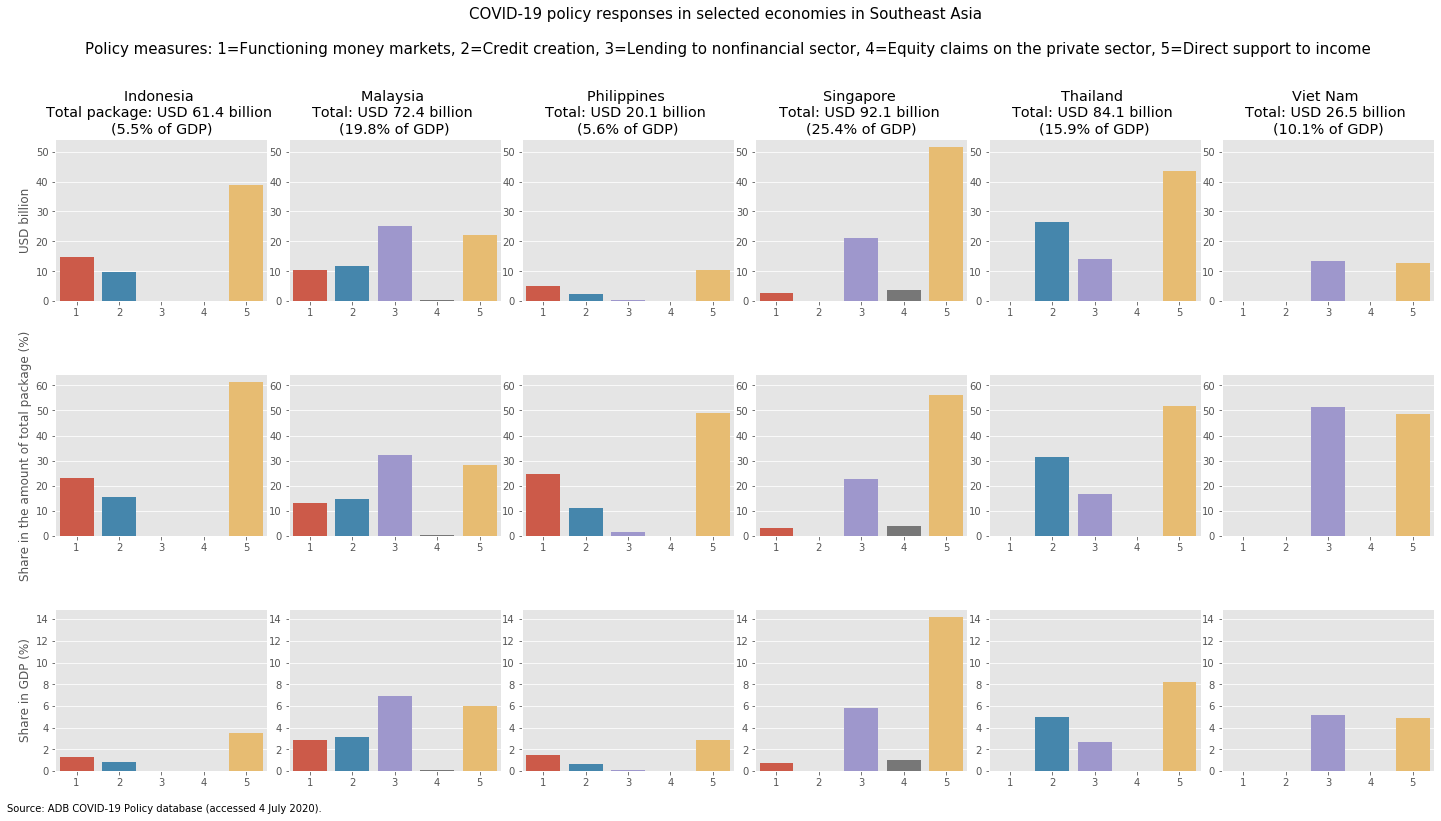

In [921]:
fig = plt.figure(figsize=(20, 10))

ino_1 = df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]
ino_2 = df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]
ino_3 = df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

mal_1 = df3.reset_index(level=0).loc['Malaysia'].iloc[8:13]
mal_2 = df3.reset_index(level=0).loc['Malaysia'].iloc[15:20]
mal_3 = df3.reset_index(level=0).loc['Malaysia'].iloc[22:27]

phi_1 = df3.reset_index(level=0).loc['Philippines'].iloc[8:13]
phi_2 = df3.reset_index(level=0).loc['Philippines'].iloc[15:20]
phi_3 = df3.reset_index(level=0).loc['Philippines'].iloc[22:27]

sin_1 = df3.reset_index(level=0).loc['Singapore'].iloc[8:13]
sin_2 = df3.reset_index(level=0).loc['Singapore'].iloc[15:20]
sin_3 = df3.reset_index(level=0).loc['Singapore'].iloc[22:27]

tha_1 = df3.reset_index(level=0).loc['Thailand'].iloc[8:13]
tha_2 = df3.reset_index(level=0).loc['Thailand'].iloc[15:20]
tha_3 = df3.reset_index(level=0).loc['Thailand'].iloc[22:27]

vie_1 = df3.reset_index(level=0).loc['Viet Nam'].iloc[8:13]
vie_2 = df3.reset_index(level=0).loc['Viet Nam'].iloc[15:20]
vie_3 = df3.reset_index(level=0).loc['Viet Nam'].iloc[22:27]

ax1 = plt.subplot(361)
sns.barplot(x=ino_1.index, y=ino_1, ax=ax1)
ax1.set(title='Indonesia \nTotal package: USD 61.4 billion \n(5.5% of GDP)', ylabel='USD billion', xticklabels=[1, 2, 3, 4, 5])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
# ax1.get_xaxis().set_visible(False)
# ax1.annotate('Total package: USD 61.4 billion',
#              xy=(1, 80), xycoords='axes points', textcoords='offset points')

ax2 = plt.subplot(362, sharey=ax1)
sns.barplot(x=mal_1.index, y=mal_1, ax=ax2)
ax2.set(title='Malaysia \nTotal: USD 72.4 billion \n(19.8% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(363, sharey=ax1)
sns.barplot(x=phi_1.index, y=phi_1, ax=ax3)
ax3.set(title='Philippines \nTotal: USD 20.1 billion \n(5.6% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(364, sharey=ax1)
sns.barplot(x=sin_1.index, y=sin_1, ax=ax4)
ax4.set(title='Singapore \nTotal: USD 92.1 billion \n(25.4% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(365, sharey=ax1)
sns.barplot(x=tha_1.index, y=tha_1, ax=ax5)
ax5.set(title='Thailand \nTotal: USD 84.1 billion \n(15.9% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax5.get_xaxis().set_visible(False)

ax6 = plt.subplot(366, sharey=ax1)
sns.barplot(x=vie_1.index, y=vie_1, ax=ax6)
ax6.set(title='Viet Nam \nTotal: USD 26.5 billion \n(10.1% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(367)
sns.barplot(x=ino_2.index, y=ino_2, ax=ax7)
ax7.set(title='', ylabel='Share in the amount of total package (%)', xticklabels=[1, 2, 3, 4, 5])
# ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(368, sharey=ax7)
sns.barplot(x=mal_2.index, y=mal_2, ax=ax8)
ax8.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(369, sharey=ax7)
sns.barplot(x=phi_2.index, y=phi_2, ax=ax9)
ax9.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax9.get_xaxis().set_visible(False)

ax10 = plt.subplot(3, 6, 10, sharey=ax7)
sns.barplot(x=sin_2.index, y=sin_2, ax=ax10)
ax10.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax10.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 6, 11, sharey=ax7)
sns.barplot(x=tha_2.index, y=tha_2, ax=ax11)
ax11.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax11.get_xaxis().set_visible(False)

ax12 = plt.subplot(3, 6, 12, sharey=ax7)
sns.barplot(x=vie_2.index, y=vie_2, ax=ax12)
ax12.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax12.get_xaxis().set_visible(False)

ax13 = plt.subplot(3, 6, 13)
sns.barplot(x=ino_3.index, y=ino_3, ax=ax13)
ax13.set(title='', ylabel='Share in GDP (%)', xticklabels=[1, 2, 3, 4, 5])
# ax13.get_xaxis().set_visible(False)
ax13.yaxis.set_major_locator(MaxNLocator(integer=True))

ax14 = plt.subplot(3, 6, 14, sharey=ax13)
sns.barplot(x=mal_3.index, y=mal_3, ax=ax14)
ax14.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax14.get_xaxis().set_visible(False)

ax15 = plt.subplot(3, 6, 15, sharey=ax13)
sns.barplot(x=phi_3.index, y=phi_3, ax=ax15)
ax15.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax15.get_xaxis().set_visible(False)

ax16 = plt.subplot(3, 6, 16, sharey=ax13)
sns.barplot(x=sin_3.index, y=sin_3, ax=ax16)
ax16.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax16.get_xaxis().set_visible(False)

ax17 = plt.subplot(3, 6, 17, sharey=ax13)
sns.barplot(x=tha_3.index, y=tha_3, ax=ax17)
ax17.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax17.get_xaxis().set_visible(False)

ax18 = plt.subplot(3, 6, 18, sharey=ax13)
sns.barplot(x=vie_3.index, y=vie_3, ax=ax18)
ax18.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax18.get_xaxis().set_visible(False)

fig.suptitle('COVID-19 policy responses in selected economies in Southeast Asia \n\nPolicy measures: 1=Functioning money markets, 2=Credit creation, \
3=Lending to nonfinancial sector, 4=Equity claims on the private sector, 5=Direct support to income',
             y=1.1, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Source: ADB COVID-19 Policy database (accessed 4 July 2020).', 
            xy=(-5.7, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


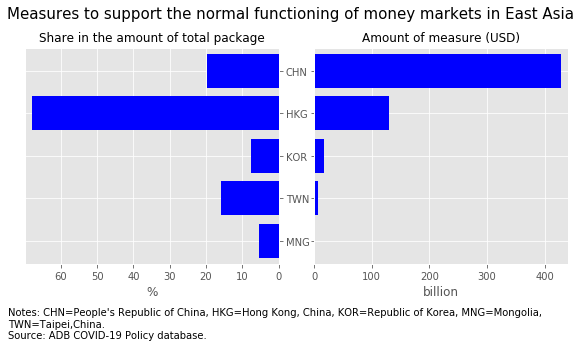

In [922]:
y0 = df3.loc['East Asia'].sort_values(by='m1').loc[:, 'm1_pkg']
y1 = df3.loc['East Asia'].sort_values(by='m1').loc[:, 'm1']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.index, y0, align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in the amount of total package', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure (USD)', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.index, yticklabels=['CHN', 'HKG', 'KOR', 'TWN', 'MNG'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Measures to support the normal functioning of money markets in East Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: CHN=People\'s Republic of China, HKG=Hong Kong, China, KOR=Republic of Korea, \
MNG=Mongolia, \nTWN=Taipei,China. \nSource: ADB COVID-19 Policy database.', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [923]:
y0

country
Mongolia                       5.390748
Taipei,China                  16.000000
Republic of Korea              7.538523
Hong Kong, China              67.807357
People's Republic of China    19.780505
Name: m1_pkg, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


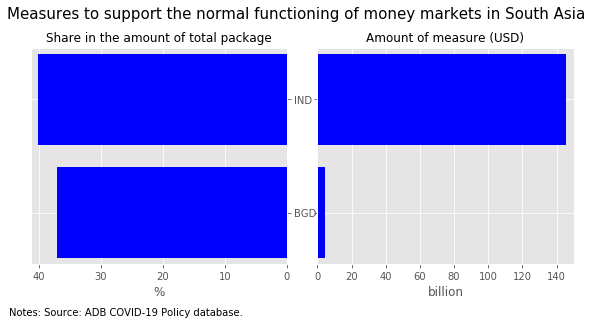

In [924]:
y0 = df3.loc['South Asia'].sort_values(by='m1').loc[:, 'm1_pkg']
y1 = df3.loc['South Asia'].sort_values(by='m1').loc[:, 'm1']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.loc['Bangladesh':, ].index, y0.loc['Bangladesh':, ], align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in the amount of total package', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Bangladesh':, ].index, y1.loc['Bangladesh':, ], align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure (USD)', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.loc['Bangladesh':, ].index, yticklabels=['IND', 'BGD'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Measures to support the normal functioning of money markets in South Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: Source: ADB COVID-19 Policy database.', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [925]:
df3.assign(m5_pct = lambda x: x.m5 / x.popn).loc['Southeast Asia'].sort_values(by='m5').loc[:, 'm5_pct']

country
Brunei Darussalam       0.000000
Lao PDR                 1.114369
Myanmar                 0.508638
Timor-Leste           118.299142
Cambodia               12.923238
Philippines            96.343563
Viet Nam              135.052280
Malaysia              700.693686
Indonesia             145.445924
Thailand              628.029325
Singapore            9149.156315
Name: m5_pct, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


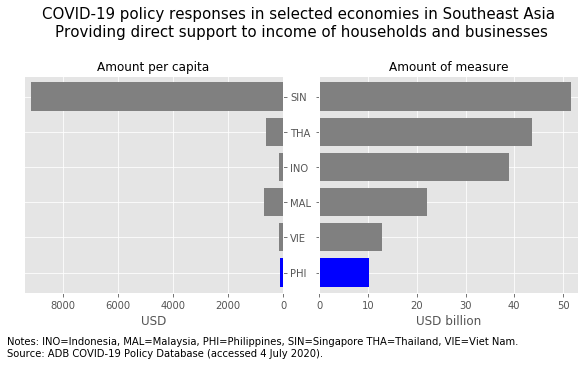

In [926]:
y0 = df3.assign(m5_pct = lambda x: x.m5 / x.popn).loc['Southeast Asia'].sort_values(by='m5').loc[:, 'm5_pct']
y1 = df3.assign(m5_pct = lambda x: x.m5 / x.popn).loc['Southeast Asia'].sort_values(by='m5').loc[:, 'm5']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.loc['Philippines':].index, y0.loc['Philippines':], align='center', 
            color=['blue', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(y1.loc['Philippines':].index, y1.loc['Philippines':], align='center', 
            color=['blue', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.loc['Philippines':].index, yticklabels=['SIN', 'THA', 'INO', 
                                                             'MAL', 'VIE', 'PHI'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy responses in selected economies in Southeast Asia \
\nProviding direct support to income of households and businesses',
             y=1.15, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: INO=Indonesia, MAL=Malaysia, PHI=Philippines, SIN=Singapore \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [927]:
y1

country
Brunei Darussalam    0.000000e+00
Lao PDR              7.869126e+06
Myanmar              2.731812e+07
Timor-Leste          1.500000e+08
Cambodia             2.100000e+08
Philippines          1.027523e+10
Viet Nam             1.290295e+10
Malaysia             2.209188e+10
Indonesia            3.893056e+10
Thailand             4.360315e+10
Singapore            5.158913e+10
Name: m5, dtype: float64

TypeError: ('Pacific', 'Kiribati') is not a string

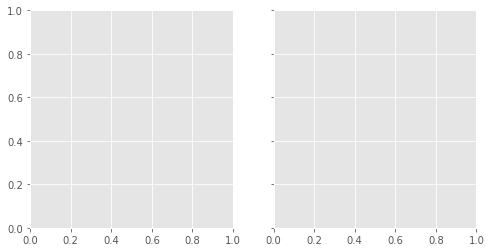

In [928]:
y0 = df3.assign(m5_pct = lambda x: x.m5 / x.popn).loc[
    ['Central and West Asia', 'East Asia', 'South Asia', 'Southeast Asia', 'Pacific'], :].sort_values(by='m5').loc[:, 'm5_pct']
y1 = df3.assign(m5_pct = lambda x: x.m5 / x.popn).loc[
    ['Central and West Asia', 'East Asia', 'South Asia', 'Southeast Asia', 'Pacific'], :].sort_values(by='m5').loc[:, 'm5']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.index, y0, align='center')
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(y1.index, y1, align='center')
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.index, yticklabels=y0.index)
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy responses in selected economies in developing Asia \
\nProviding direct support to income of households and businesses',
             y=1.15, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: INO=Indonesia, MAL=Malaysia, PHI=Philippines, SIN=Singapore \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]

In [ ]:
data = data[data['m5'] > 0]

In [ ]:
data.dropna(inplace=False)

In [ ]:
data.index

In [ ]:
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]

In [ ]:
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [ ]:
data

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 10), sharey=True)

axs[0].barh(data.loc[:'Singapore', 'm5_pct'].index, data.loc[:'Singapore', 'm5_pct'], align='center')
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(data.loc[:'Singapore', 'm5'].index, data.loc[:'Singapore', 'm5'], align='center')
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=data.loc[:'Singapore', 'm5_pct'].index, 
           yticklabels=data.loc[:'Singapore', 'm5_pct'].index)
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy responses in selected economies in developing Asia \
\nProviding direct support to income of households and businesses',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: INO=Indonesia, MAL=Malaysia, PHI=Philippines, SIN=Singapore \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

axs[0].barh(data.loc['Bangladesh':'India', 'm5_pct'].index, data.loc['Bangladesh':'India', 'm5_pct'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(data.loc['Bangladesh':'India', 'm5'].index, data.loc['Bangladesh':'India', 'm5'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of package', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=data.loc['Bangladesh':'India', 'm5_pct'].index, 
           yticklabels=['IND', 'SIN', 'THA', 'HKG', 'INO', 'KOR', 'MAL', 'KAZ', 'VIE', 'PHI',
                        'PAK', 'TAP', 'BAN'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Providing direct support to income of households and businesses \
\nto combat the adverse economic impact of the COVID-19 pandemic',
             y=1.1, fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: BAN=Bangladesh, HKG=Hong Kong, China, IND=India, INO=Indonesia, KAZ=Kazakhstan, \
KOR=Republic of Korea, \nMAL=Malaysia, PAK=Pakistan, PHI=Philippines, SIN=Singapore, TAP=Taipei,China, \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).',
             xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

axs[0].barh(data.loc['Bangladesh':'India', 'm5_gdp'].index, data.loc['Bangladesh':'India', 'm5_gdp'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(data.loc['Bangladesh':'India', 'm5'].index, data.loc['Bangladesh':'India', 'm5'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of package', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=data.loc['Bangladesh':'India', 'm5_gdp'].index, 
           yticklabels=['IND', 'SIN', 'THA', 'HKG', 'INO', 'KOR', 'MAL', 'KAZ', 'VIE', 'PHI',
                        'PAK', 'TAP', 'BAN'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Providing direct support to income of households and businesses \
\nto combat the adverse economic impact of the COVID-19 pandemic',
             y=1.1, fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: BAN=Bangladesh, HKG=Hong Kong, China, IND=India, INO=Indonesia, KAZ=Kazakhstan, \
KOR=Republic of Korea, \nMAL=Malaysia, PAK=Pakistan, PHI=Philippines, SIN=Singapore, TAP=Taipei,China, \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).',
             xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)
plt.show()

In [ ]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5_pct').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]
data = data[data['m5'] > 0]
data.dropna(inplace=False)
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [ ]:
data

In [ ]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5_gdp').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]
data = data[data['m5'] > 0]
data.dropna(inplace=False)
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [ ]:
data

In [ ]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]
data = data[data['m5'] > 0]
data.dropna(inplace=False)
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [ ]:
data.loc['Bangladesh':'India'].sort_values(by='m5_pct')

In [ ]:
dd = data.loc['Bangladesh':'India'].sort_values(by='m5_pct')

In [ ]:
dd

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

axs[0].barh(dd['m5_pct'].index, dd['m5_pct'], 
            align='center',
            color=['gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(dd['m5'].index, dd['m5'], 
            align='center',
            color=['gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of package', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=dd['m5_pct'].index, 
           yticklabels=['SIN', 'HKG', 'KAZ', 'MAL', 'KOR', 'THA', 'TAP', 
                        'INO', 'VIE', 'IND', 'PHI', 'PAK', 'BAN'][::-1])

axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Providing direct support to income of households and businesses \
\nto combat the adverse economic impact of the COVID-19 pandemic',
             y=1.1, fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: BAN=Bangladesh, HKG=Hong Kong, China, IND=India, INO=Indonesia, KAZ=Kazakhstan, \
KOR=Republic of Korea, \nMAL=Malaysia, PAK=Pakistan, PHI=Philippines, SIN=Singapore, TAP=Taipei,China, \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).',
             xy=(-1.1, -0.20), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)
plt.show()

In [ ]:
dd2 = data.loc['Bangladesh':'India'].sort_values(by='m5_gdp')

In [ ]:
dd2

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

axs[0].barh(dd2['m5_gdp'].index, dd2['m5_gdp'], 
            align='center',
            color=['gray', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(dd2['m5'].index, dd2['m5'], 
            align='center',
            color=['gray', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of package', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=dd2['m5_gdp'].index, 
           yticklabels=['SIN', 'KAZ', 'HKG', 'THA', 'MAL', 'IND', 'VIE', 'INO',
                        'PHI', 'PAK', 'KOR', 'BAN', 'TAP'][::-1])

axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Providing direct support to income of households and businesses \
\nto combat the adverse economic impact of the COVID-19 pandemic',
             y=1.1, fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: BAN=Bangladesh, HKG=Hong Kong, China, IND=India, INO=Indonesia, KAZ=Kazakhstan, \
KOR=Republic of Korea, \nMAL=Malaysia, PAK=Pakistan, PHI=Philippines, SIN=Singapore, TAP=Taipei,China, \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).',
             xy=(-1.1, -0.20), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)
plt.show()

In [ ]:
df3

In [ ]:
y0

In [ ]:
url4 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ados_forecast.csv'

In [ ]:
df4 = pd.read_csv(url4)

In [ ]:
df4.set_index('country', inplace=True)

In [ ]:
df4.columns

In [ ]:
df4.columns = ['gdp2020_ado', 'gdp2020_ados', 'gdp2021_ado', 'gdp2021_ados',
               'inf2020_ado', 'inf2020_ados', 'inf2021_ado', 'inf2021_ados']

In [ ]:
df4

In [ ]:
df4 = df4.assign(gdpf2020_change = lambda x: x.gdp2020_ados - x.gdp2020_ado)
df4 = df4.assign(gdpf2021_change = lambda x: x.gdp2021_ados - x.gdp2021_ado)
df4 = df4.assign(inff2020_change = lambda x: x.inf2020_ados - x.inf2020_ado)
df4 = df4.assign(inff2021_change = lambda x: x.inf2021_ados - x.inf2021_ado)

In [ ]:
df4

In [ ]:
df3

In [ ]:
df5 = df3.reset_index(level=0).join(df4)

In [ ]:
df5

In [ ]:
df5.loc[~df5.region.isin(['Other Economies', 'Other ADB Members', 'Others']),
        ['pkg_gdp', 'gdpf2020_change', 'inff2020_change']]

In [ ]:
data1 = df5.loc[~df5.region.isin(['Other Economies', 'Other ADB Members', 'Others']),
        ['pkg_gdp', 'gdpf2020_change', 'inff2020_change']]

In [ ]:
sns.regplot(x=data1['pkg_gdp'][data1.pkg_gdp > 0], y=data1['gdpf2020_change'][data1.pkg_gdp > 0], data=data1, logx=True)

In [ ]:
data1.sort_values(by='pkg_gdp', ascending=False)[data1.pkg_gdp > 0].dropna()

In [ ]:
data2 = data1.sort_values(by='pkg_gdp', ascending=False)[data1.pkg_gdp > 0].dropna().loc['Malaysia':,]

In [ ]:
data2

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=data2['pkg_gdp'], y=data2['gdpf2020_change'], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'], y=data2['inff2020_change'], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.1,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x=data2['pkg_gdp'], y=data2['gdpf2020_change'], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'], y=data2['inff2020_change'], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.2,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
data2

In [ ]:
data3 = data2.sort_values(by='pkg_gdp', ascending=False)[data2.pkg_gdp > 0].dropna()

In [ ]:
data3.plot(kind='box')

In [ ]:
data3.index.isin(['Kyrgyz Republic', 'Afghanistan', 'Vanuatu', 'Armenia', 'Malaysia'])

In [ ]:
data3.sort_values(by='inff2020_change', ascending=False)

In [ ]:
mask = data3.index.isin(['Kyrgyz Republic', 'Afghanistan', 'Vanuatu', 'Armenia', 'Malaysia'])

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x=data2['pkg_gdp'][~mask], y=data2['gdpf2020_change'][~mask], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'][~mask], y=data2['inff2020_change'][~mask], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.2,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()